In [1]:
import pandas as pd 
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Loading the set after the cleaning process.
data = pd.read_csv('./csv_files/analysis_dataset3.csv.gz',
                   sep='\t',
                   compression='gzip',
                   dtype={'code': 'object'})
data.shape

(724939, 42)

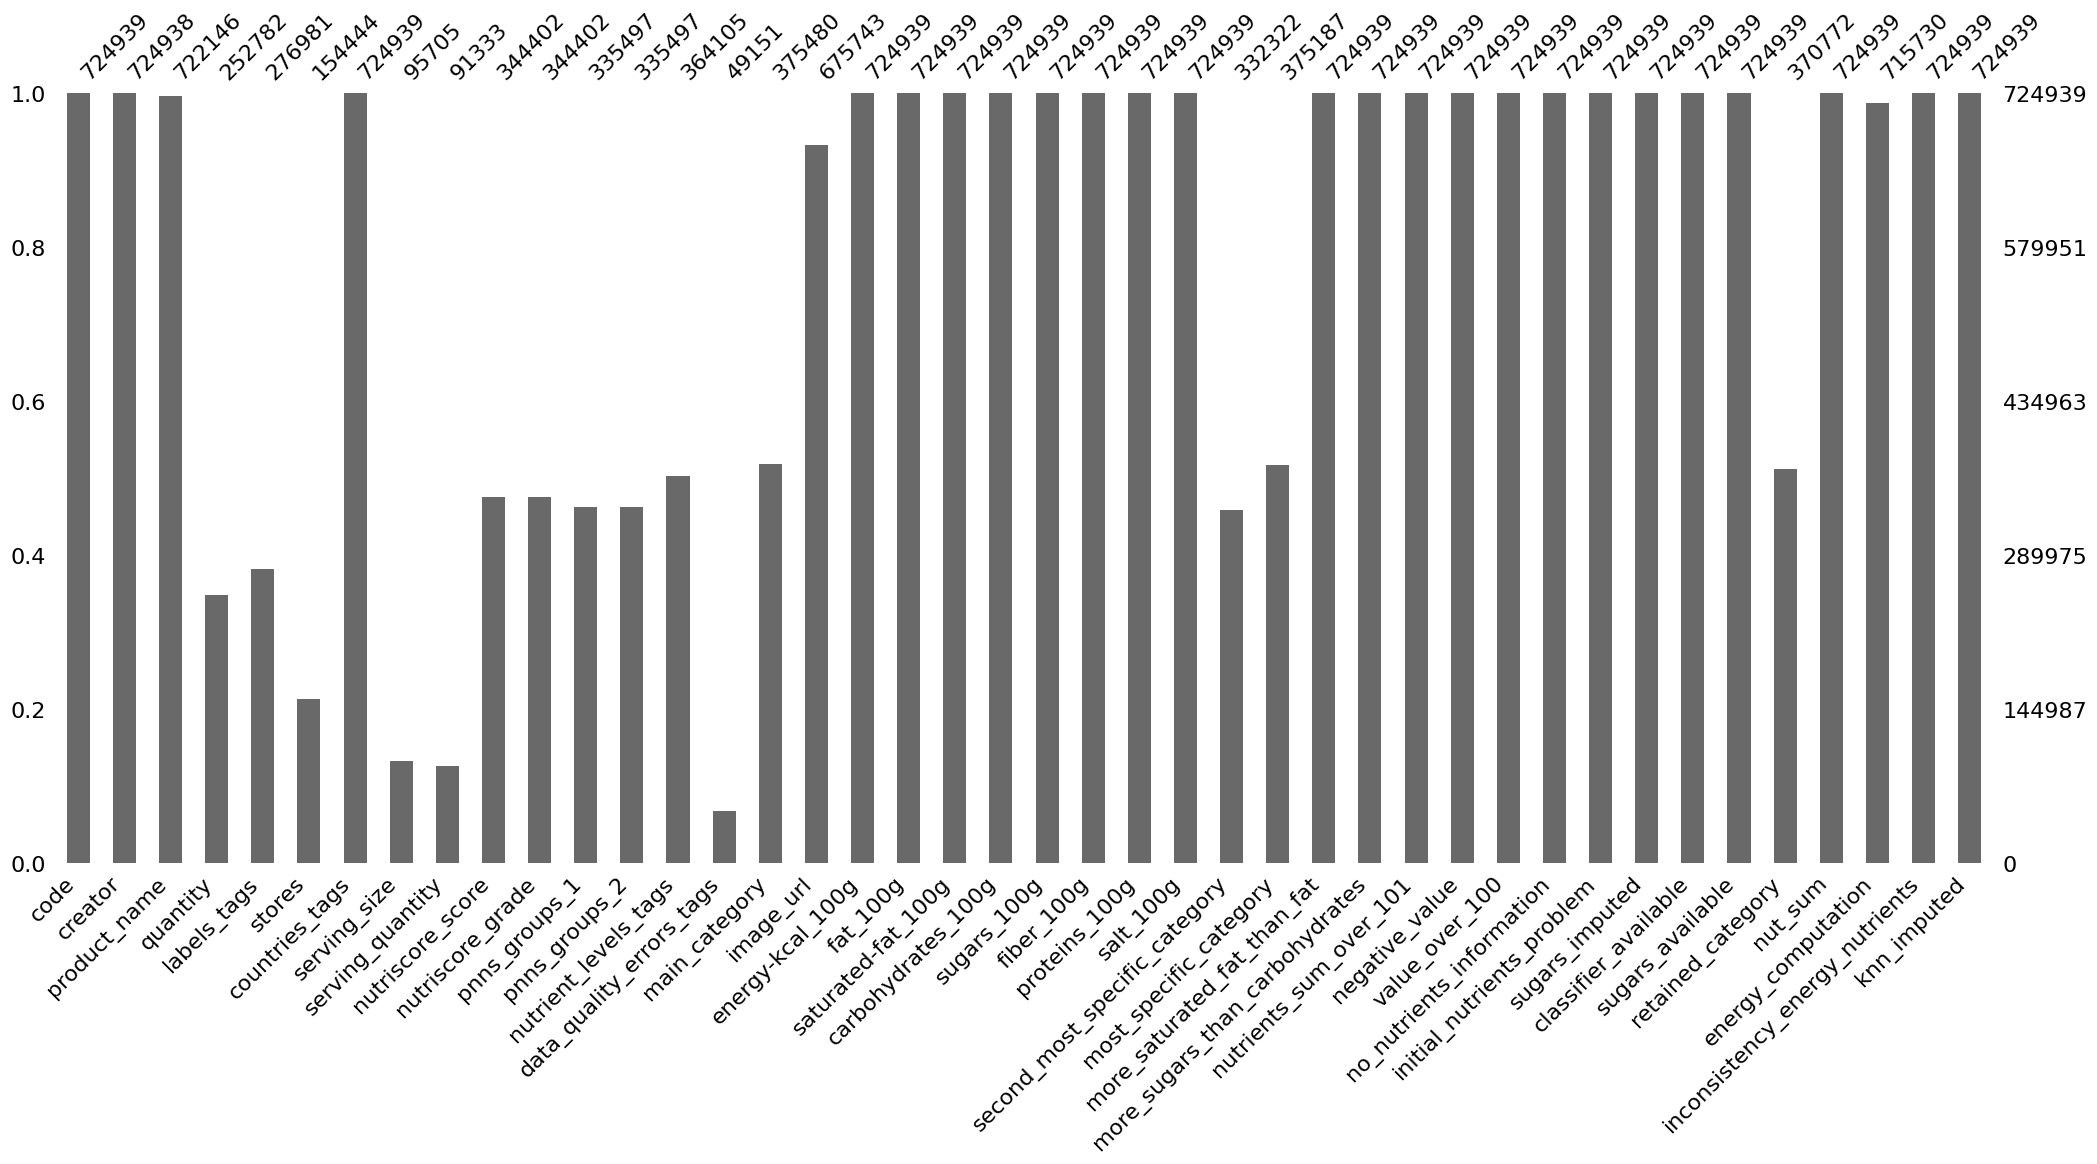

In [3]:
msno.bar(data)
plt.show()

**Table of contents**<a id='toc0_'></a>    
- 1. [Some stats](#toc1_)    
- 2. [ Univariate analysis](#toc2_)    
  - 2.1. [Nutrients](#toc2_1_)    
  - 2.2. [Energy](#toc2_2_)    
  - 2.3. [Nutriscore](#toc2_3_)    
  - 2.4. [Pnns groups 1](#toc2_4_)    
  - 2.5. [Pnns groups 2](#toc2_5_)    
  - 2.6. [Stores](#toc2_6_)    
  - 2.7. [Serving quantity](#toc2_7_)    
  - 2.8. [Serving size](#toc2_8_)    
  - 2.9. [Quantity](#toc2_9_)    
- 3. [Bi-variate analysis](#toc3_)    
  - 3.1. [Linear correlations](#toc3_1_)    
    - 3.1.1. [ Correlation matrix of quantitatives variables.](#toc3_1_1_)    
    - 3.1.2. [Pairplots](#toc3_1_2_)    
    - 3.1.3. [Trying to represent 2D distributions with the log value of the effectives to better perceive variations.](#toc3_1_3_)    
  - 3.2. [Categorical vs quantitative features analysis](#toc3_2_)    
    - 3.2.1. [Sugars and Nutriscore](#toc3_2_1_)    
    - 3.2.2. [Others nutrients and nutriscore](#toc3_2_2_)    
    - 3.2.3. [PNNS groups 1 and nutrients](#toc3_2_3_)    
    - 3.2.4. [PNNS groups 2 and sugars](#toc3_2_4_)    
- 4. [Multivariate Analysis](#toc4_)    
  - 4.1. [PCA and visualisations in the 2 first factorial planes](#toc4_1_)    
  - 4.2. [Same thing, without nutriscore_score among the features provided to the pca decomposer](#toc4_2_)    
  - 4.3. [Visualisation in the first 3D space](#toc4_3_)    
  - 4.4. [In the second 3d space](#toc4_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1.  [&#9650;](#toc0_) <a id='toc1_'></a>Some stats

We give percentages of :
- products with a specific category
- products with a pnns groups 1
- products corrected but which had an initial problems.
- the number of products which had some values imputed with the knn_imputer
- products with an inconsistency between energy and nutrients

In [4]:
# Percentage of products with a specific category
round(data.retained_category.notnull().mean()*100,
      2)

51.15

In [5]:
# Percentage of products with a pnns groups 1
round(data.pnns_groups_1.notnull().mean()*100,
      2)

46.28

In [6]:
#products corrected but which had an initial problems.

# Creating tags for nutrients problems.
sat_fat = 'more_saturated_fat_than_fat'
sug_carbo = 'more_sugars_than_carbohydrates'
nutsum_101 = 'nutrients_sum_over_101'
neg = 'negative_value'
over100 = 'value_over_100'
nutprob = 'initial_nutrients_problem' # At least one of the above problems.
no_nut ='no_nutrients_information'

pbs = [nutprob,
       sat_fat,
       sug_carbo,
       over100,
       neg,
       no_nut,
       nutsum_101]


print(f"                 pbs             number     pct")
print('-'*50)
for pb in pbs:
       col = data.loc[:, pb]
       print(f"{pb:>30} {col.sum():>8}{(col.mean()*100).round(3):>8}")

                 pbs             number     pct
--------------------------------------------------
     initial_nutrients_problem     3772    0.52
   more_saturated_fat_than_fat      295   0.041
more_sugars_than_carbohydrates      815   0.112
                value_over_100       61   0.008
                negative_value        5   0.001
      no_nutrients_information        0     0.0
        nutrients_sum_over_101     2664   0.367


In [7]:
# number of products which had some values 
# imputed with the knn_imputer.
data.knn_imputed.sum()

17974

In [8]:
data.inconsistency_energy_nutrients.sum()

16125

# 2.  [&#9650;](#toc0_) <a id='toc2_'></a> Univariate analysis


## 2.1.  [&#9650;](#toc0_) <a id='toc2_1_'></a>Nutrients

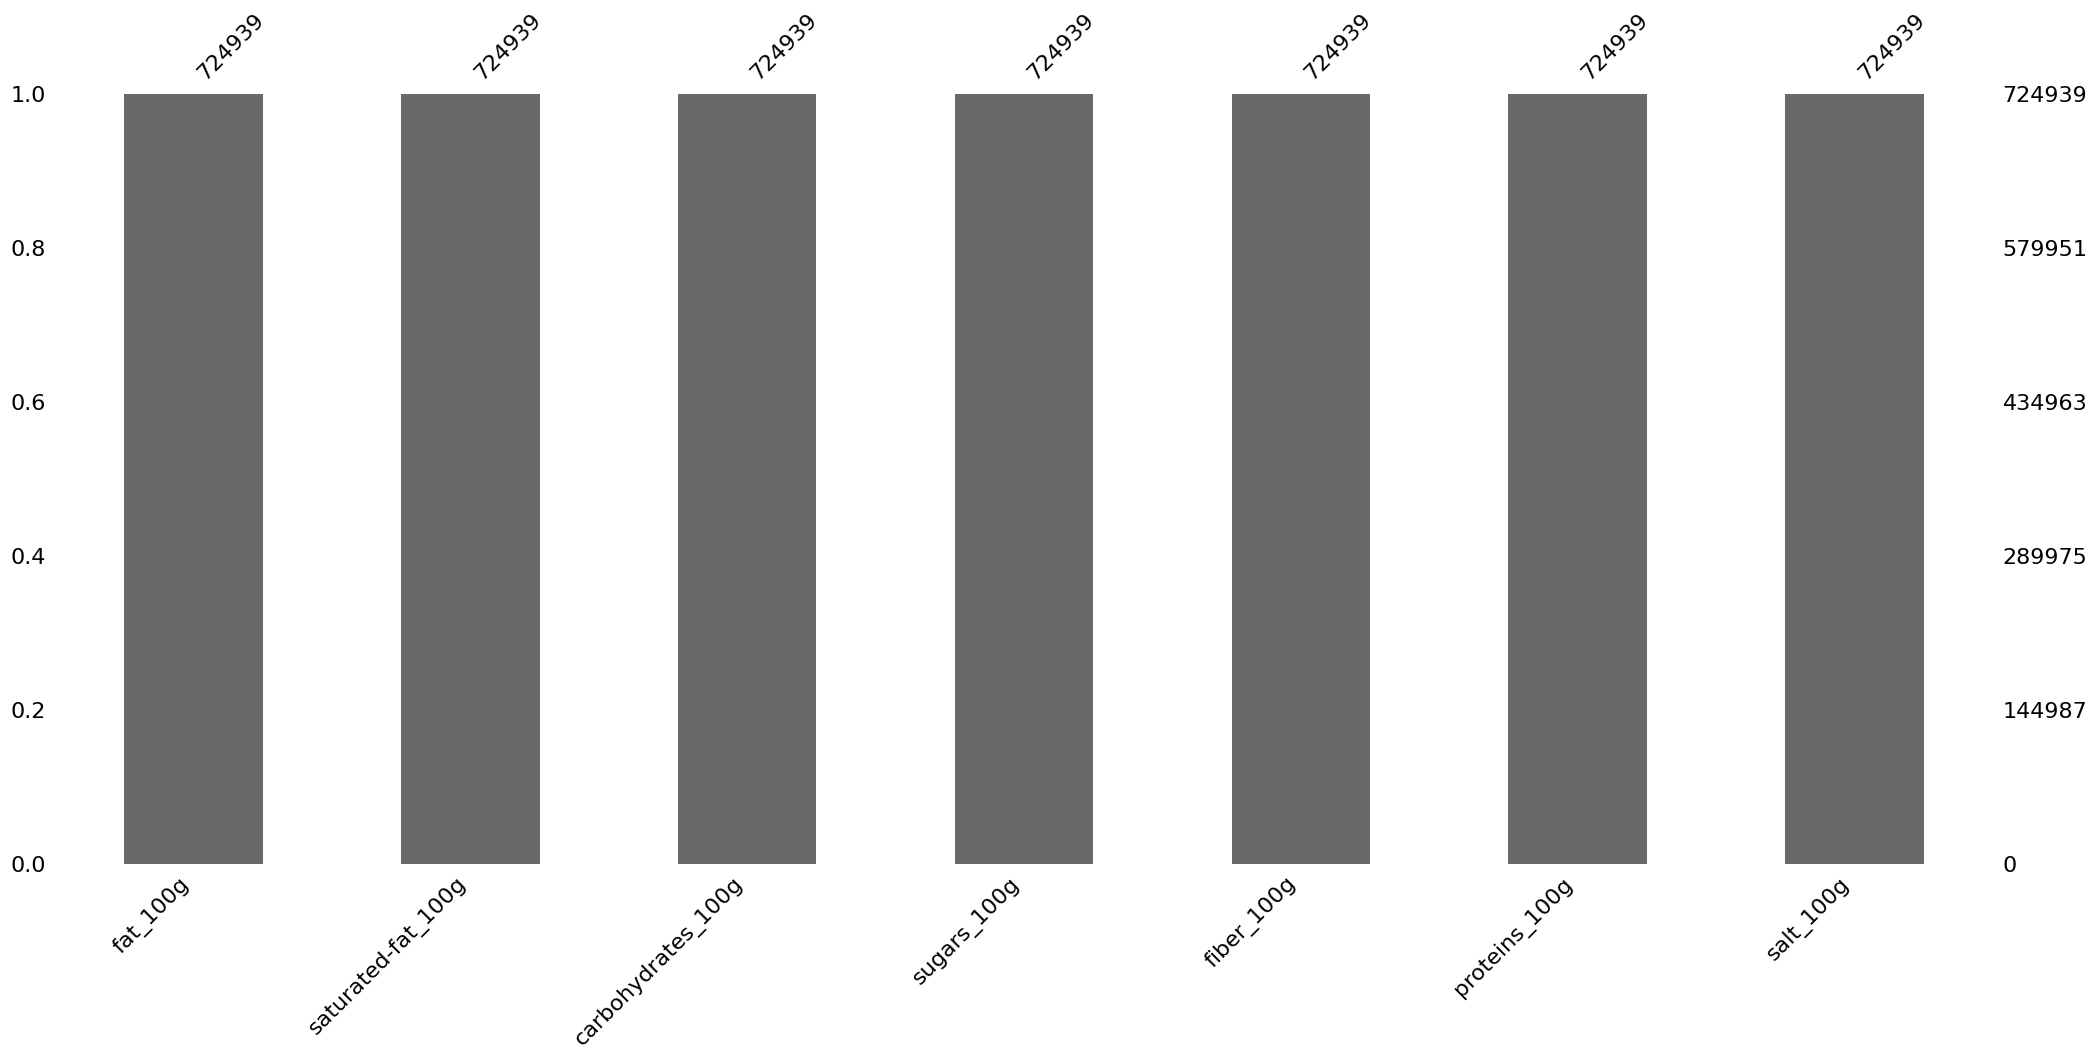

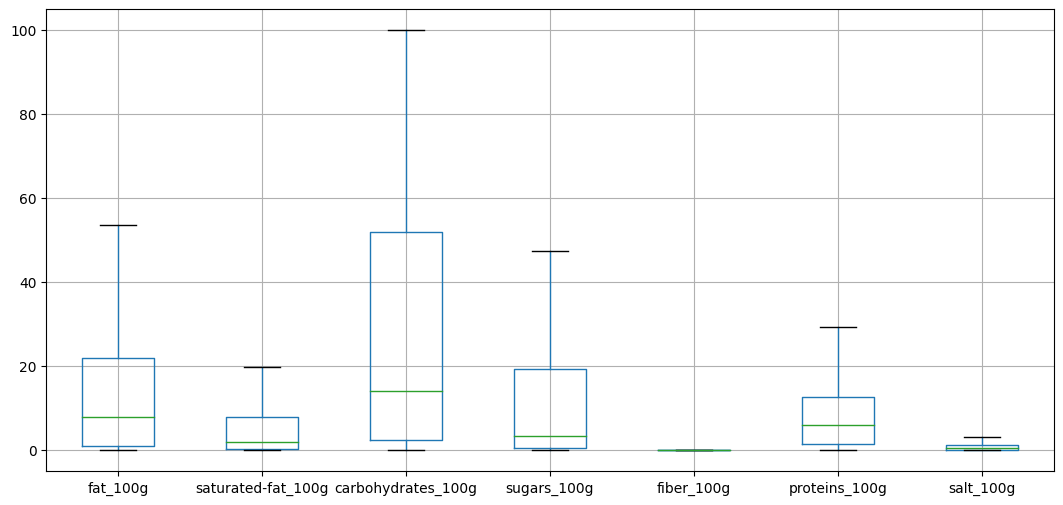

In [9]:
# Preparing the df
nutrients_f = ['fat_100g',
               'saturated-fat_100g',
               'carbohydrates_100g',
               'sugars_100g',
               'fiber_100g',
               'proteins_100g',
               'salt_100g']

num = data.loc[:, nutrients_f]
msno.bar(num)
plt.show()

num.boxplot(nutrients_f,
            figsize=(13,6),
            showfliers=False)
plt.show()

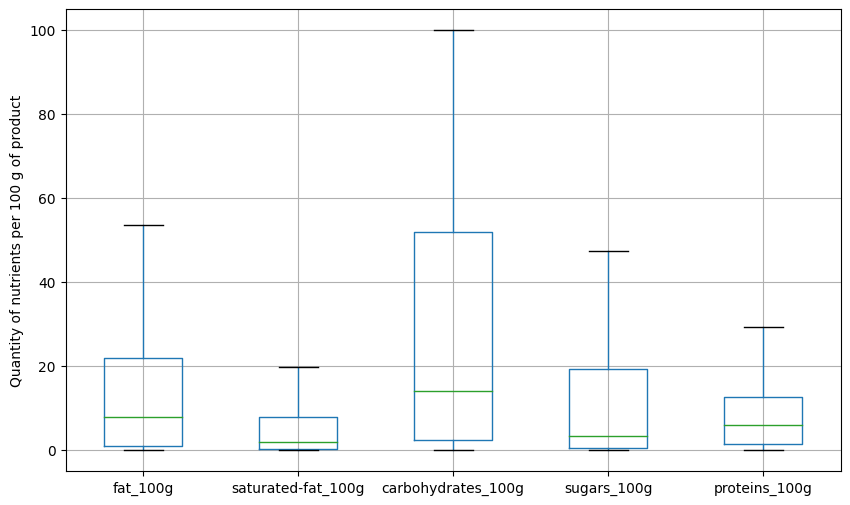

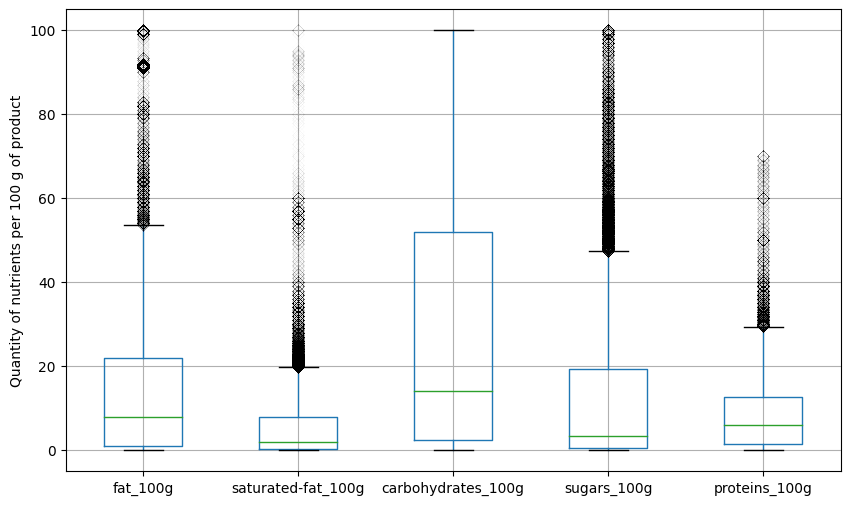

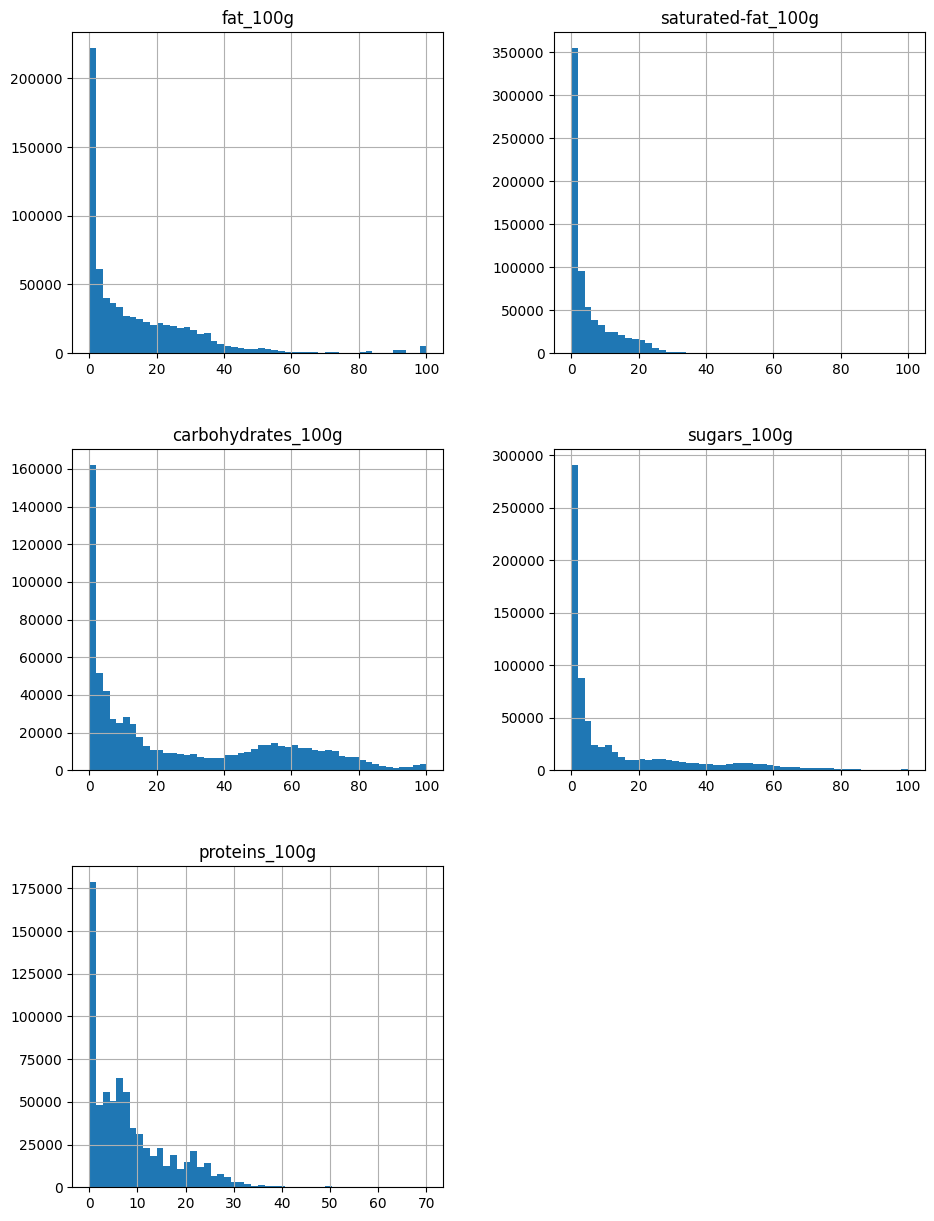

fat_100g  saturated-fat_100g  carbohydrates_100g    sugars_100g  \
count  724939.000000       724939.000000       724939.000000  724939.000000   
mean       14.169076            5.406276           26.979486      13.602764   
std        17.444190            7.901744           27.627867      19.916639   
min         0.000000            0.000000            0.000000       0.000000   
25%         1.000000            0.200000            2.500000       0.600000   
50%         8.000000            2.000000           14.000000       3.400000   
75%        22.000000            8.000000           52.000000      19.300000   
max       100.000000          100.000000          100.000000     100.000000   

       proteins_100g  
count  724939.000000  
mean        8.533999  
std         8.750068  
min         0.000000  
25%         1.400000  
50%         6.100000  
75%        12.600000  
max        70.000000

In [10]:
# Sharing the y-axis is not optimal for visualization
# Separating in 2 nutrients groups. 
nut1 = ['fat_100g',
        'saturated-fat_100g',
        'carbohydrates_100g',
        'sugars_100g',
        'proteins_100g']

nut2 = ['fiber_100g',
        'salt_100g']

num.boxplot(nut1,
            figsize=(10,6),
            showfliers=False)
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()

num.boxplot(nut1,
            figsize=(10,6),
            showfliers=True,
            flierprops={'marker': 'D',
                        'alpha': 0.005,
                        'color': 'blue'})
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()

num.hist(nut1, figsize=(11,15),bins=50)
plt.show()

num[nut1].describe()

We observe that saturated fat and sugars are constrained by respectively fat and carbohydrates. 

They have similar shapes but are more squeezed to low values.

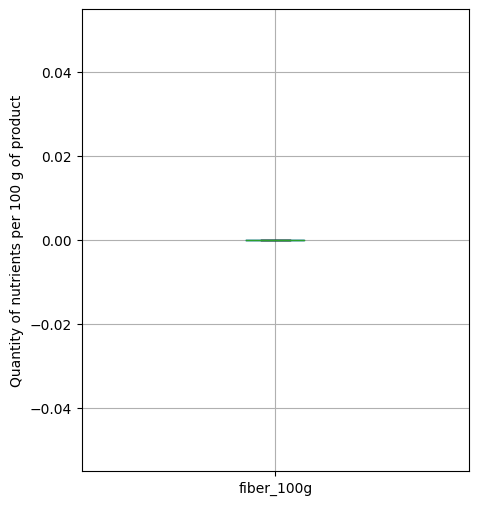

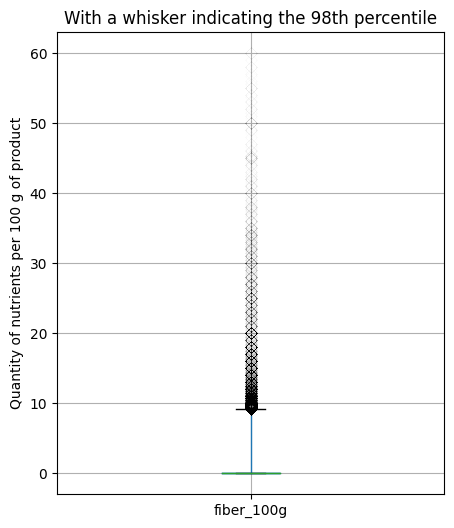

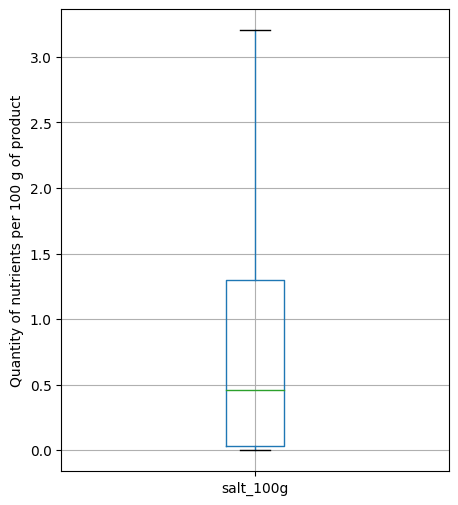

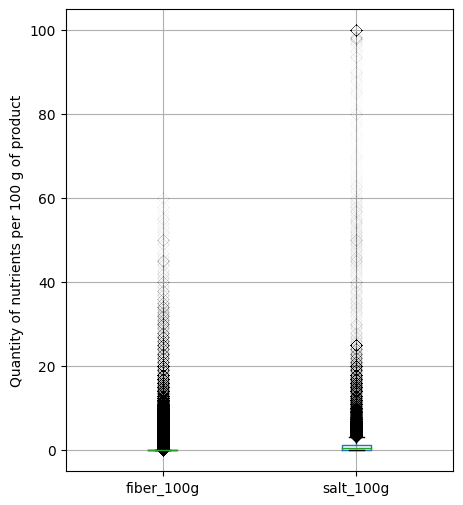

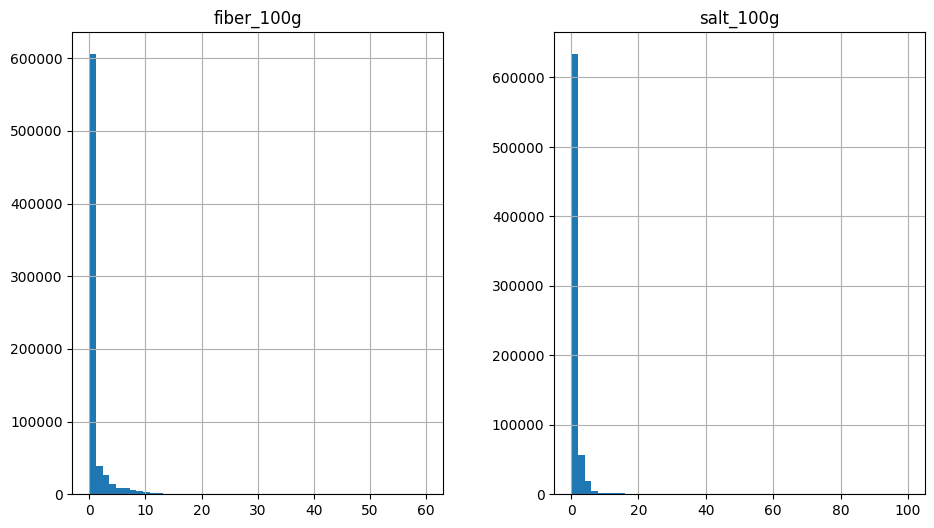

fiber_100g      salt_100g
count  724939.000000  724939.000000
mean        0.867011       1.154665
std         2.905994       3.751567
min         0.000000       0.000000
25%         0.000000       0.030000
50%         0.000000       0.460000
75%         0.000000       1.300000
max        60.000000     100.000000

In [11]:
num.boxplot('fiber_100g',
            figsize=(5,6),
            showfliers=False)
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()

num.boxplot('fiber_100g',
            figsize=(5,6),
            showfliers=True,
            flierprops={'marker': 'D',
                        'alpha': 0.005,
                        'color': 'blue'},
            whis=(0,98))
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.title('With a whisker indicating the 98th percentile')
plt.show()

num.boxplot('salt_100g',
            figsize=(5,6),
            showfliers=False)
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()


num.boxplot(nut2,
            figsize=(5,6),
            showfliers=True,
            flierprops={'marker': 'D',
                        'alpha': 0.005,
                        'color': 'blue'})
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()

num.hist(nut2, figsize=(11,6),bins=50)
plt.show()

num[nut2].describe()

Globally we can order nutrients as such :

It is easier to find a plethora of products with a high rate of :
1. carbohydrates/sugars
2. fat/saturated-fat
3. proteins
4. salt
5. fiber

However, this has to be tempered by the fact we did a large imputation of fiber to 0. Then fiber may not be the last in reality.


## 2.2.  [&#9650;](#toc0_) <a id='toc2_2_'></a>Energy

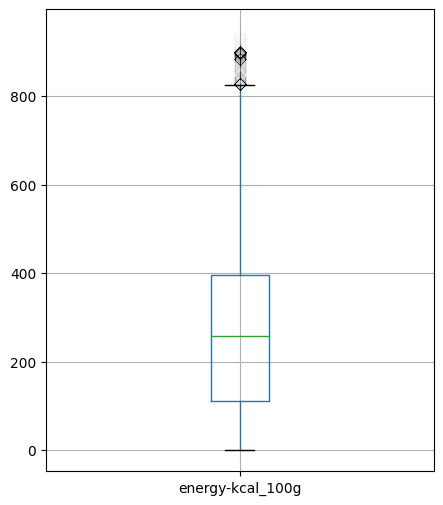

count    724939.000000
mean        270.178633
std         187.141942
min           0.000000
25%         110.000000
50%         256.983200
75%         396.000000
max         949.000000
Name: energy-kcal_100g, dtype: float64

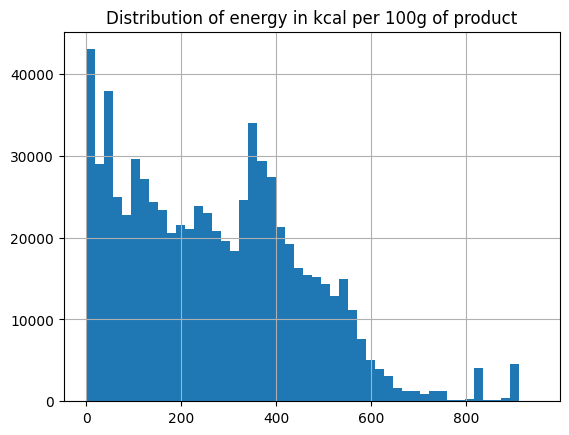

In [12]:
data.boxplot('energy-kcal_100g',
             figsize=(5,6),
             showfliers=True,
             flierprops={'marker': 'D',
                         'alpha': 0.005,
                         'color': 'blue'})
plt.show()

display(data['energy-kcal_100g'].describe())

data['energy-kcal_100g'].hist(bins=50)
plt.title('Distribution of energy in kcal per 100g of product')
plt.show()


In [13]:
high_energy = data.loc[data['energy-kcal_100g'] > 800,
                       ['pnns_groups_2', 'retained_category']]

high_energy.shape

(9683, 2)

In [14]:
display(high_energy.pnns_groups_2.value_counts().head(15))
display(high_energy.retained_category.value_counts().head(30))

fats                        6430
cereals                      275
dressings and sauces          43
processed meat                13
salty and fatty products      13
meat                          12
biscuits and cakes             8
nuts                           8
sweets                         5
fruits                         5
cheese                         4
one-dish meals                 4
chocolate products             3
dried fruits                   3
potatoes                       3
Name: pnns_groups_2, dtype: int64

huiles d'olive vierges extra     2432
huiles d'olive                    481
matières grasses                  477
huiles de coco                    373
huiles de tournesol               291
huiles de colza                   234
huiles de noix                    205
huiles de sésame                  153
huiles                            148
en:huile d’olive vierge extra     126
huiles de noisette                102
olio extra vergine di oliva        95
mélanges d'huiles                  89
huiles de pépins de raisins        72
huiles vierges de coco             70
extra-virgin olive oils            68
graisse de canard                  55
huiles de lin                      52
huiles de chanvre                  48
huile d'olive de nyons             44
huiles d'argan                     42
huiles d'arachide                  38
huiles de pépins de courge         37
huiles d'avocat                    36
en:extra-virgin-olive-oils         35
ghees                              32
aceites de o

Oils are the most caloric products!

Some outliers can be found here, we shall investigate those high energy products which are in groups where fat is not the main nutrients (cereals, sweets, meat, fruits...) 

They probably are not in the right group, or there is a pb in nutrients/energy...

## 2.3.  [&#9650;](#toc0_) <a id='toc2_3_'></a>Nutriscore

In [15]:
print(data.nutriscore_score.notnull().mean().round(2))
print(data.nutriscore_score.notnull().sum())

0.48
344402


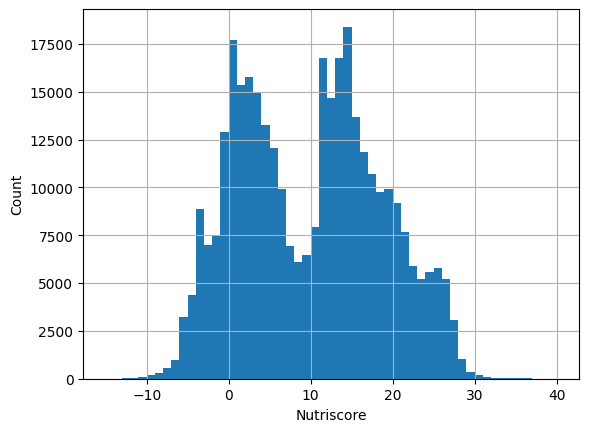

In [16]:
data.nutriscore_score.hist(bins=55)
plt.xlabel('Nutriscore')
plt.ylabel('Count')
plt.show()

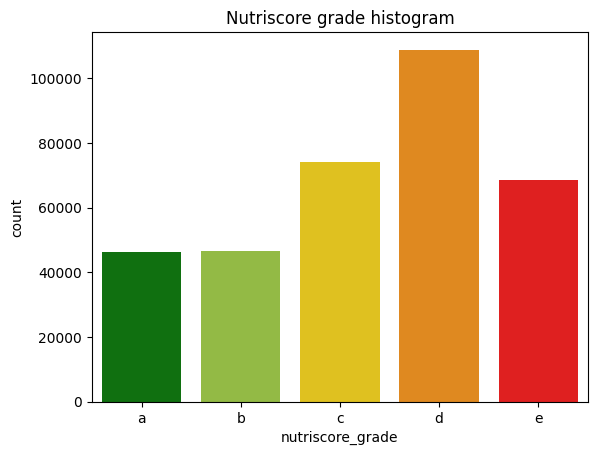

In [17]:
sns.countplot(x=data.nutriscore_grade,
              order=['a', 'b', 'c', 'd', 'e'],
              palette = ['green', 'yellowgreen', 'gold', 'darkorange', 'red'])
plt.title('Nutriscore grade histogram')
plt.show()

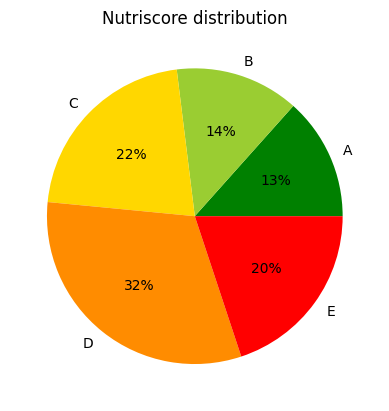

In [18]:
#define data
a = data.nutriscore_grade.value_counts()
a.sort_index(inplace=True)
values = a.values
labels = ['A', 'B', 'C', 'D', 'E']
#define Seaborn color palette to use
colors = ['green', 'yellowgreen', 'gold', 'darkorange', 'red']

#create pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Nutriscore distribution')
plt.show()

## 2.4.  [&#9650;](#toc0_) <a id='toc2_4_'></a>Pnns groups 1

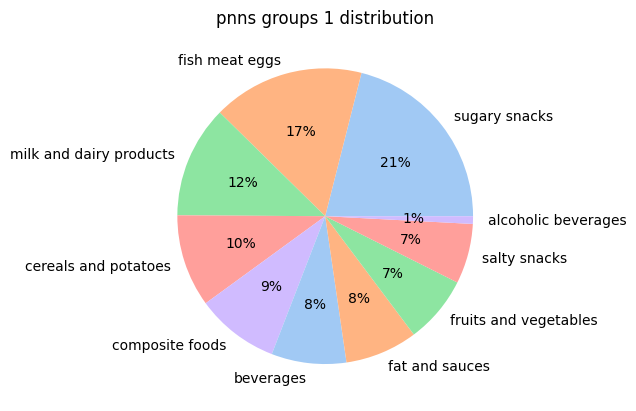

In [19]:
a = data.pnns_groups_1.value_counts()
values = a.values
labels = a.index
colors = sns.color_palette('pastel')[0:5]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('pnns groups 1 distribution')
plt.show()

## 2.5.  [&#9650;](#toc0_) <a id='toc2_5_'></a>Pnns groups 2

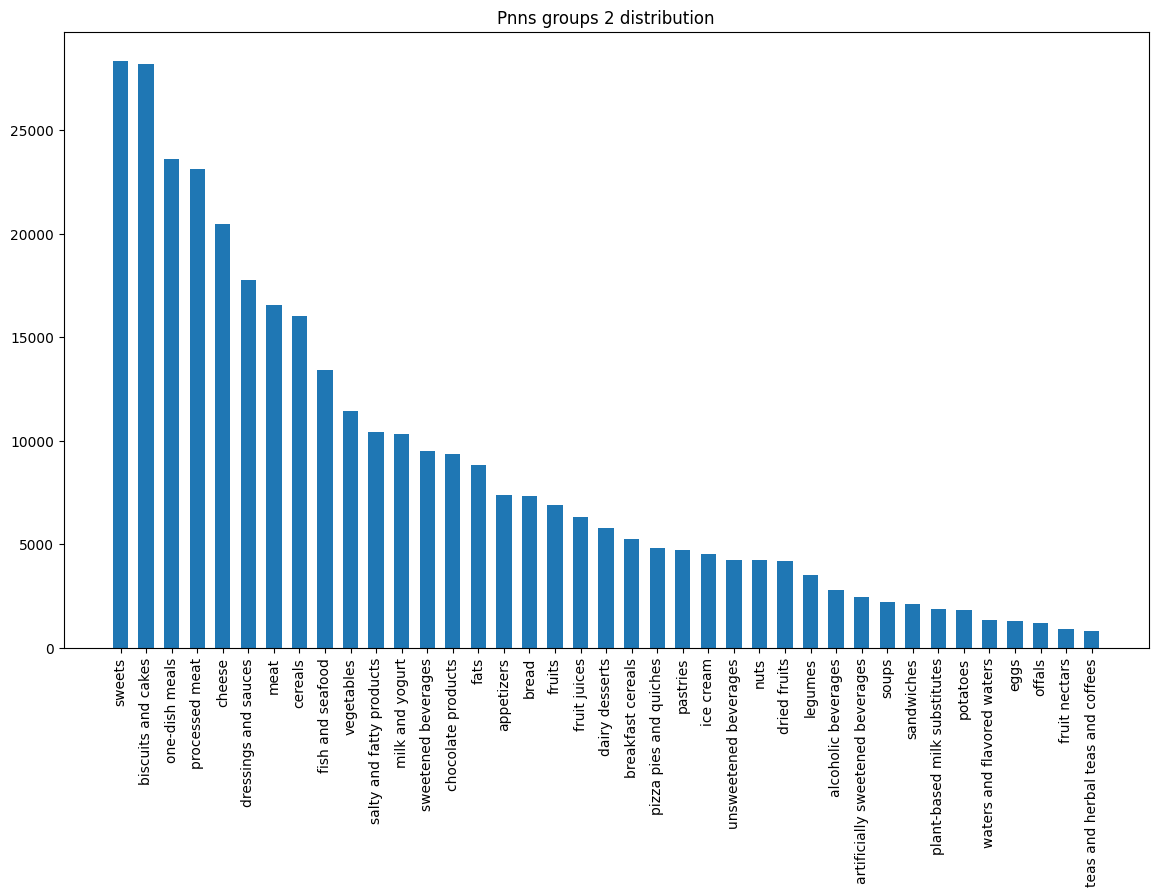

In [20]:
a = data.pnns_groups_2.value_counts()
vals = a.values
labels = a.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=0.6)
plt.xticks(rotation='vertical')
plt.title('Pnns groups 2 distribution')
plt.show()

## 2.6.  [&#9650;](#toc0_) <a id='toc2_6_'></a>Stores

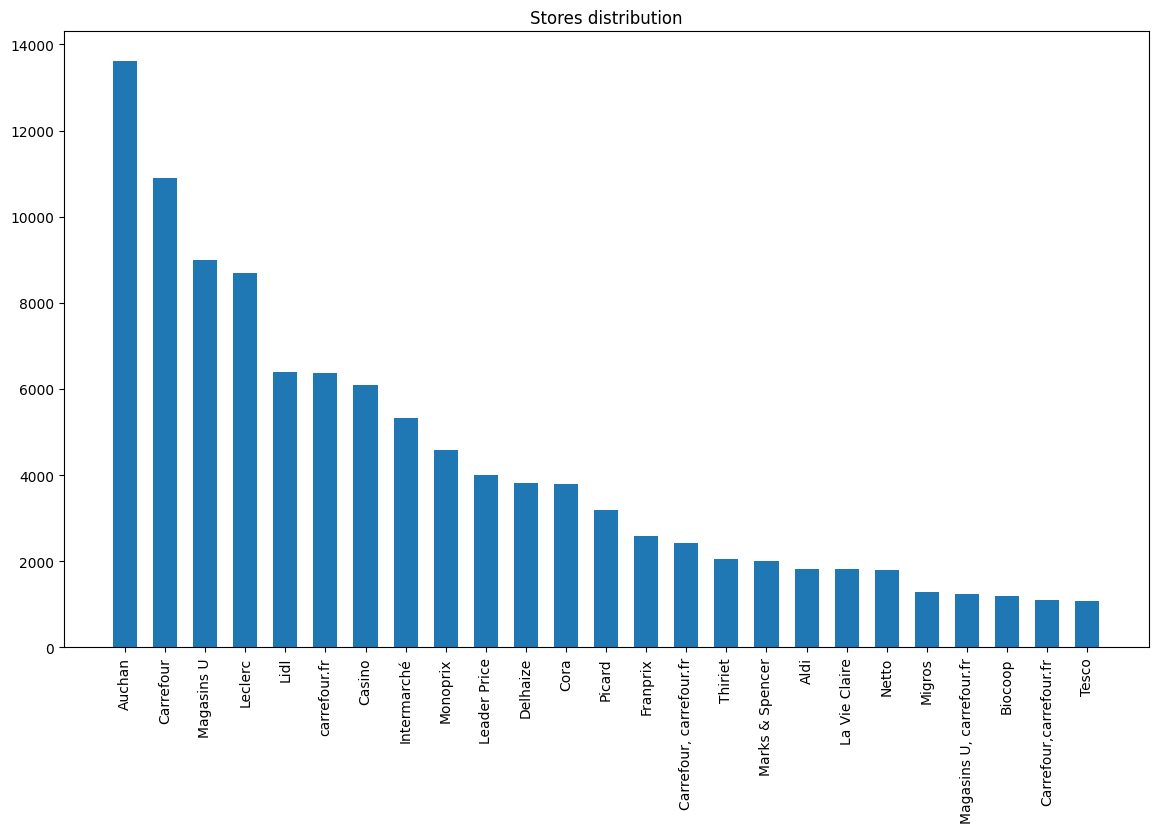

In [21]:
stores = data.stores.value_counts().head(25)
vals = stores.values
labels = stores.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=0.6)
plt.xticks(rotation='vertical')
plt.title('Stores distribution')
plt.show()

I will need to write functions in order to join products sold, for example, in 'magasins U' and 'Super U'. Or careffour, with carrefour.fr

Managing string formatting somehow.

## 2.7.  [&#9650;](#toc0_) <a id='toc2_7_'></a>Serving quantity

In [22]:
serving_q = data.serving_quantity.value_counts().head(20)
serving_q

100.0    15960
30.0      6091
0.0       5244
200.0     4291
250.0     3485
25.0      3327
125.0     3169
50.0      2248
40.0      2196
20.0      2146
150.0     2090
300.0     1932
15.0      1668
10.0      1604
60.0      1306
45.0      1157
80.0      1123
90.0      1092
35.0       894
120.0      848
Name: serving_quantity, dtype: int64

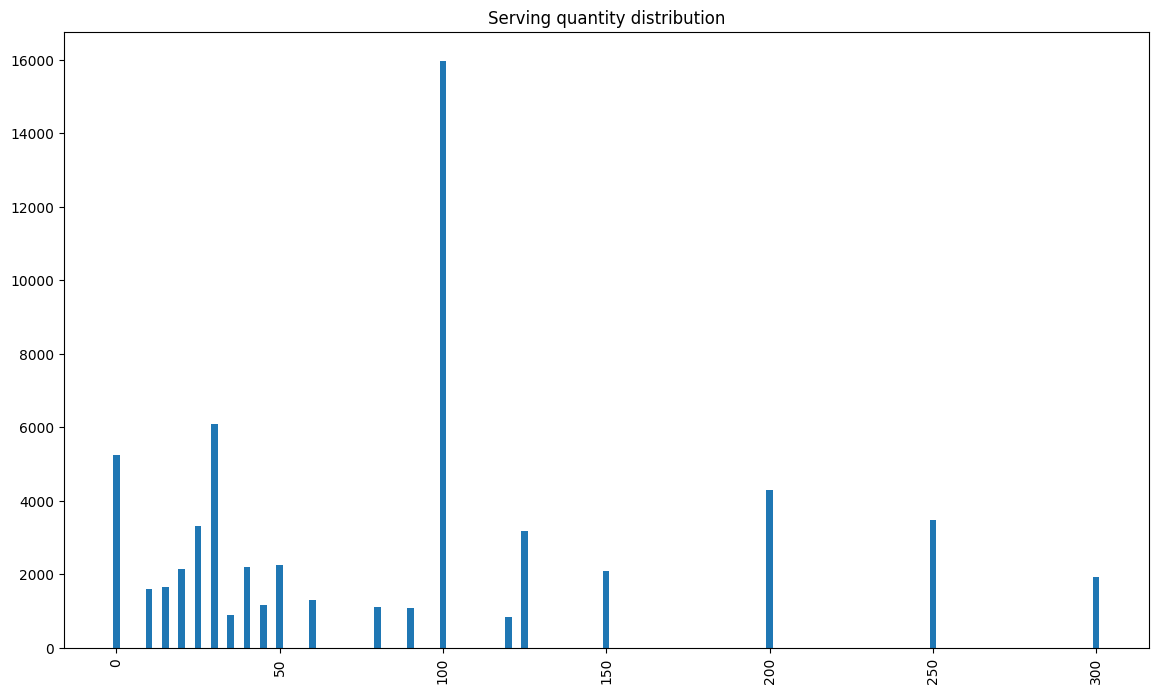

In [23]:
vals = serving_q.values
labels = serving_q.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=2)
plt.xticks(rotation='vertical')
plt.title('Serving quantity distribution')
plt.show()

## 2.8.  [&#9650;](#toc0_) <a id='toc2_8_'></a>Serving size

serving    9242
100g       7932
100 g      4072
30 g       3337
100.0g     1888
25 g       1741
30g        1653
125 g      1482
250 ml     1172
200 g      1128
50 g       1072
40 g       1049
200 ml     1023
300 g      1022
20 g       1021
125g        979
25g         969
150 g       788
100ml       742
10 g        710
Name: serving_size, dtype: int64

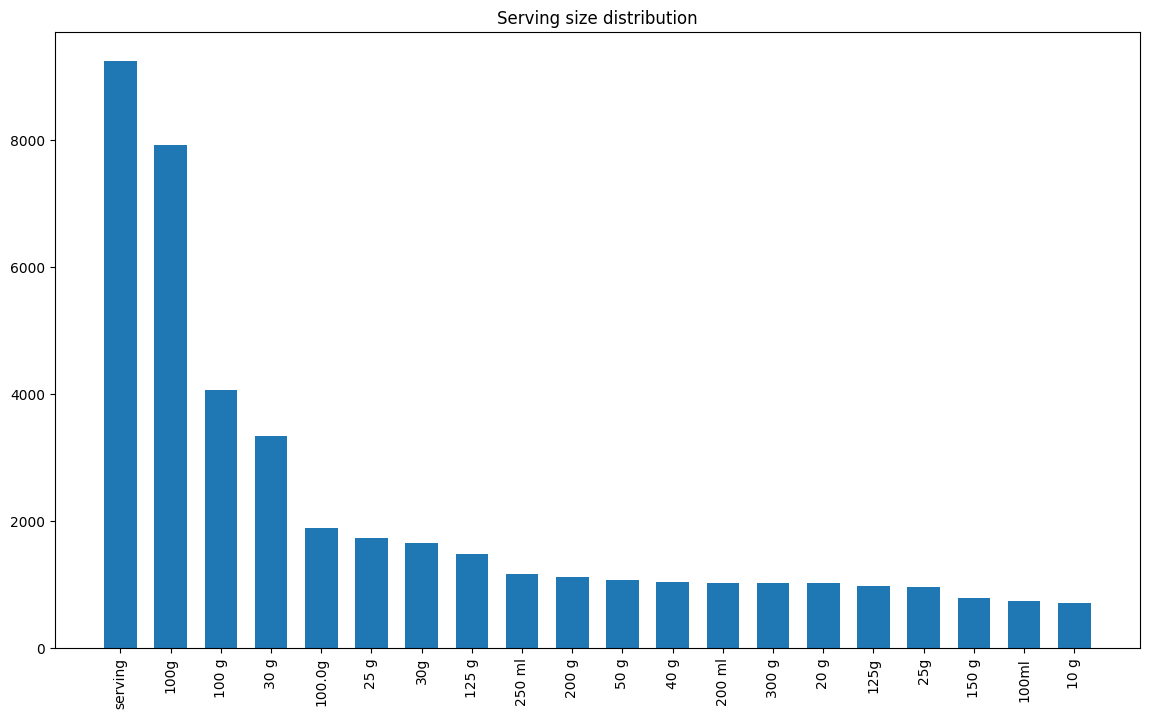

In [24]:
serving_s = data.serving_size.value_counts().head(20)
display(serving_s)
vals = serving_s.values
labels = serving_s.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=0.65)
plt.xticks(rotation='vertical')
plt.title('Serving size distribution')
plt.show()

Serving quantity seems better to process the quantity of sugars in one element of the products.

I would use that to assess the % of the maximum daily intake in sugars advise bu the ANSES.

## 2.9.  [&#9650;](#toc0_) <a id='toc2_9_'></a>Quantity

500 g    11748
250 g    10748
200 g    10732
100 g     8020
300 g     7679
400 g     7477
150 g     6172
1 kg      5373
180 g     4014
125 g     3480
350 g     3472
1 l       2901
120 g     2685
1 L       2313
500g      2157
90 g      2063
450 g     2034
600 g     1955
80 g      1951
200g      1835
Name: quantity, dtype: int64

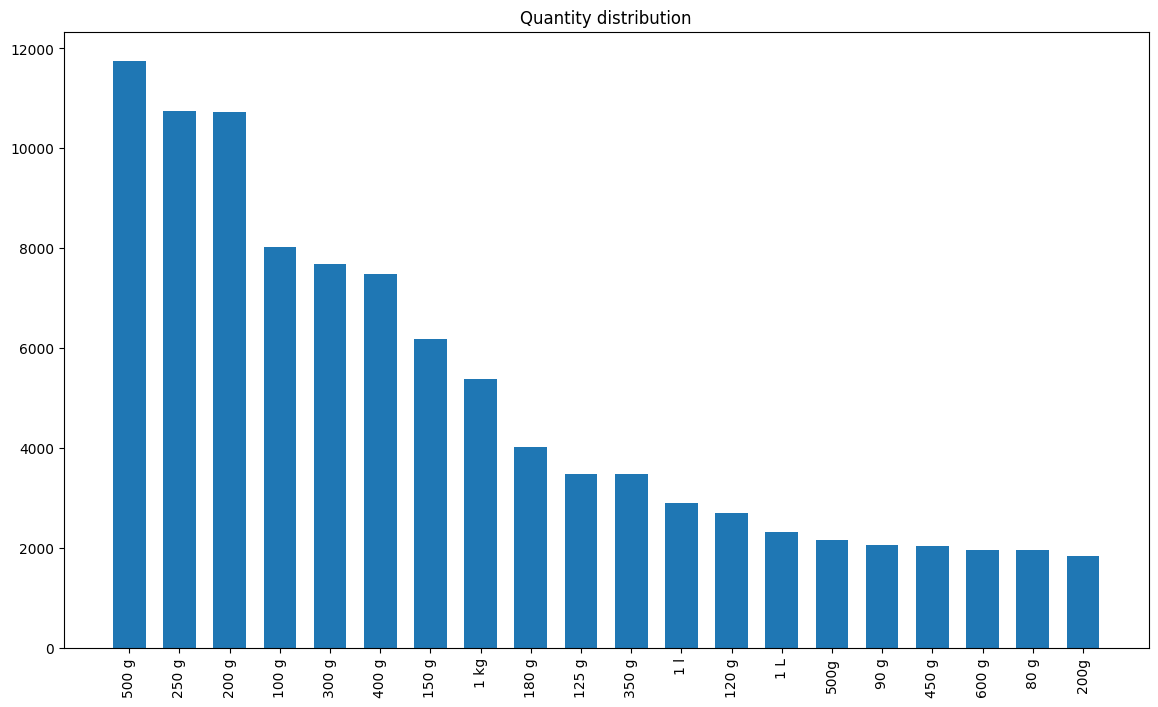

In [25]:
quantity = data.quantity.value_counts().head(20)
display(quantity)
vals = quantity.values
labels = quantity.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=0.65)
plt.xticks(rotation='vertical')
plt.title('Quantity distribution')
plt.show()

Not very useful compared to serving quantity regarding the app features. 

# 3.  [&#9650;](#toc0_) <a id='toc3_'></a>Bi-variate analysis

## 3.1.  [&#9650;](#toc0_) <a id='toc3_1_'></a>Linear correlations

### 3.1.1.  [&#9650;](#toc0_) <a id='toc3_1_1_'></a> Correlation matrix of quantitatives variables.

In [26]:
num_var = data.select_dtypes(include=['float64', 'int64']).columns
print(num_var)
num_var = num_var[:-2]
print(num_var)

Index(['serving_quantity', 'nutriscore_score', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nut_sum', 'energy_computation'],
      dtype='object')
Index(['serving_quantity', 'nutriscore_score', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g'],
      dtype='object')


In [27]:
num_data = data.loc[:, num_var]
num_data.corr()

serving_quantity  nutriscore_score  energy-kcal_100g  \
serving_quantity            1.000000          0.002734         -0.001207   
nutriscore_score            0.002734          1.000000          0.554613   
energy-kcal_100g           -0.001207          0.554613          1.000000   
fat_100g                    0.000385          0.472066          0.773044   
saturated-fat_100g         -0.000286          0.572839          0.581808   
carbohydrates_100g         -0.002860          0.215797          0.433315   
sugars_100g                -0.002280          0.391916          0.304319   
fiber_100g                 -0.001811         -0.185716          0.108743   
proteins_100g               0.001568          0.064924          0.189871   
salt_100g                   0.001325          0.182521         -0.038897   

                    fat_100g  saturated-fat_100g  carbohydrates_100g  \
serving_quantity    0.000385           -0.000286           -0.002860   
nutriscore_score    0.472066            0.572839            0.215797   
energy-kcal_100g    0.773044            0.581808            0.433315   
fat_100g            1.000000            0.711036           -0.122834   
saturated-fat_100g  0.711036            1.000000           -0.055712   
carbohydrates_100g -0.122834           -0.055712            1.000000   
sugars_100g        -0.061856            0.038387            0.705136   
fiber_100g          0.010471           -0.029628            0.123616   
proteins_100g       0.168269            0.172409           -0.219309   
salt_100g           0.002375           -0.003526           -0.099351   

                    sugars_100g  fiber_100g  proteins_100g  salt_100g  
serving_quantity      -0.002280   -0.001811       0.001568   0.001325  
nutriscore_score       0.391916   -0.185716       0.064924   0.182521  
energy-kcal_100g       0.304319    0.108743       0.189871  -0.038897  
fat_100g              -0.061856    0.010471       0.168269   0.002375  
saturated-fat_100g     0.038387   -0.029628       0.172409  -0.003526  
carbohydrates_100g     0.705136    0.123616      -0.219309  -0.099351  
sugars_100g            1.000000    0.002826      -0.290020  -0.110781  
fiber_100g             0.002826    1.000000       0.077261  -0.015699  
proteins_100g         -0.290020    0.077261       1.000000   0.098806  
salt_100g             -0.110781   -0.015699       0.098806   1.000000

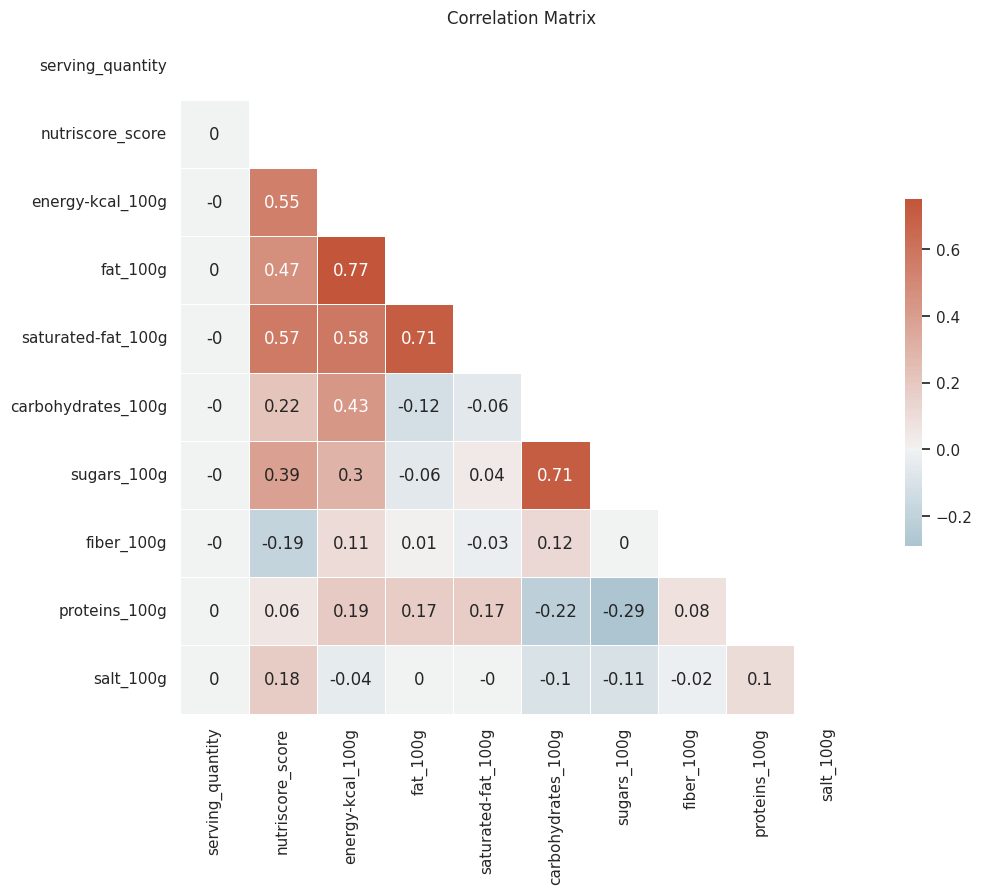

In [28]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = num_data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.round(2), mask=mask, annot=True,
            cmap=cmap, vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

This is a first way to summarize the nutriscore.

Let's remind that the nutriscore is close to -15 when perfect and close to 40 when very bad.

The nutriscore correlation column can be interpreted as such. 

Globally, in order of importance:
- the higher the saturated-fat (and fat), the worse the nutriscore. 
- the higher the sugars, the worse the nutriscore. 
- the higher carbohydrates, the worse the nutriscore (but it is less correlated and mainly due to the fact that high sugars forces high carbohydrates as a subclass).
- high salt means worse nutriscore.

On the contrary, high proteins and overall high fiber improve the nutriscore.

**This justifies the main idea of the application : to indicate people when sugars is too high, and pinpoint to better products of the same category**
***

We also see that :
- fat and saturated-fat are very correlated.
- carbohydrates and sugars are very correlated.
- serving size is not correlated with any feature (normal, because the other features are measures per 100g).
- energy is highly correlated with fat (underling factor 9) and less, but still, with carbohydrates, and then proteins (underlying factor 4).



### 3.1.2.  [&#9650;](#toc0_) <a id='toc3_1_2_'></a>Pairplots

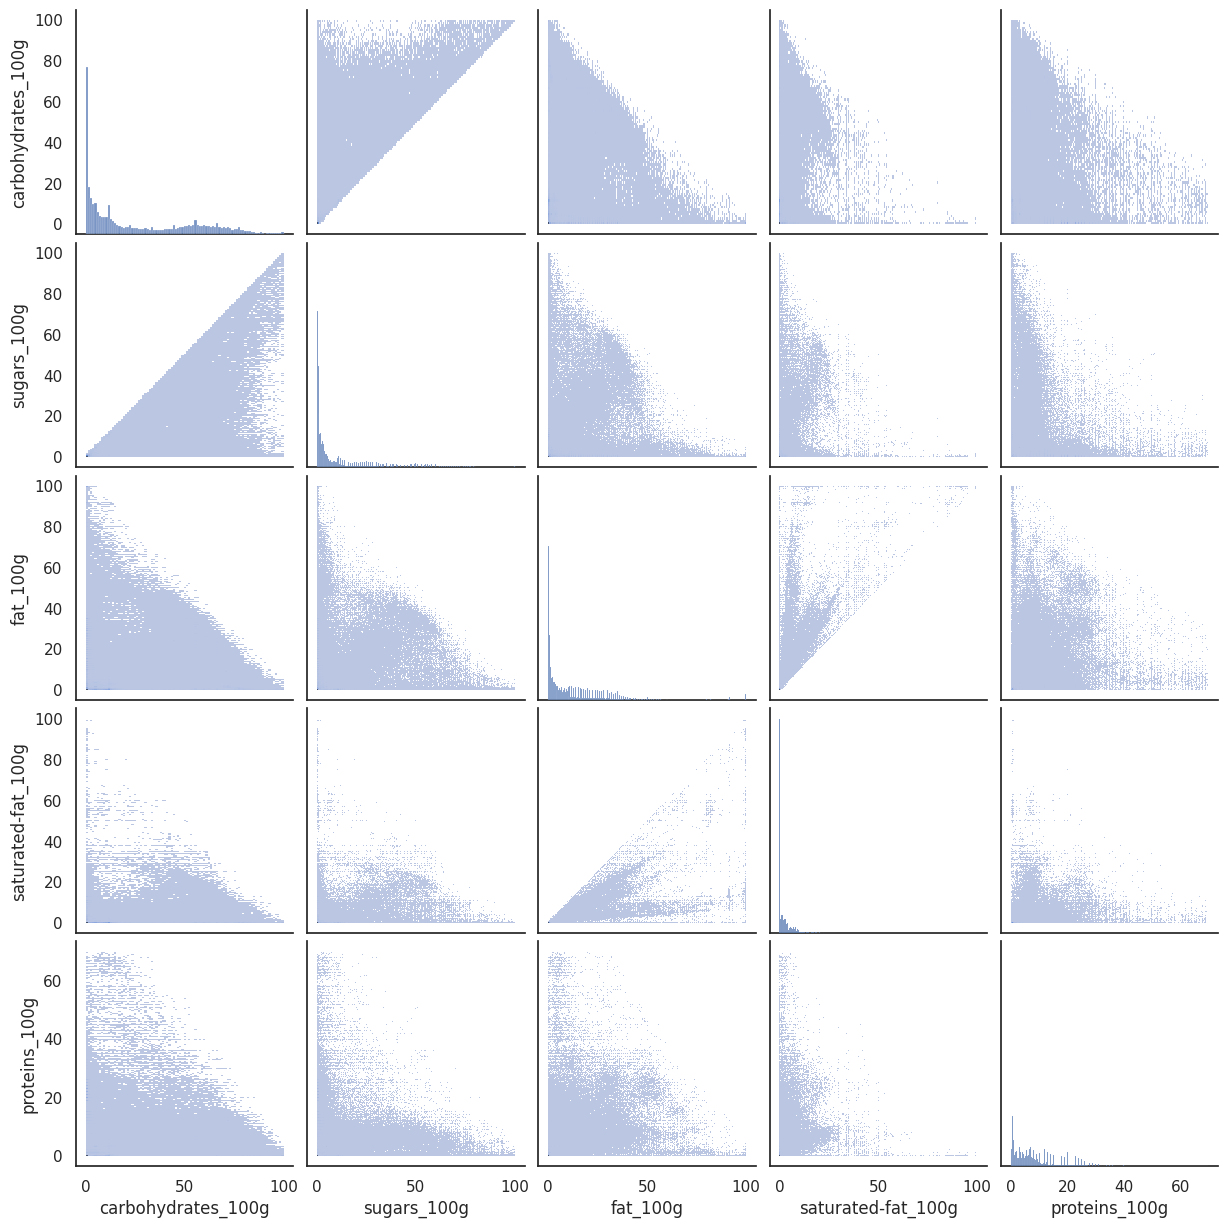

In [29]:
sns.pairplot(data=data[['carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','proteins_100g']],
             kind='hist')

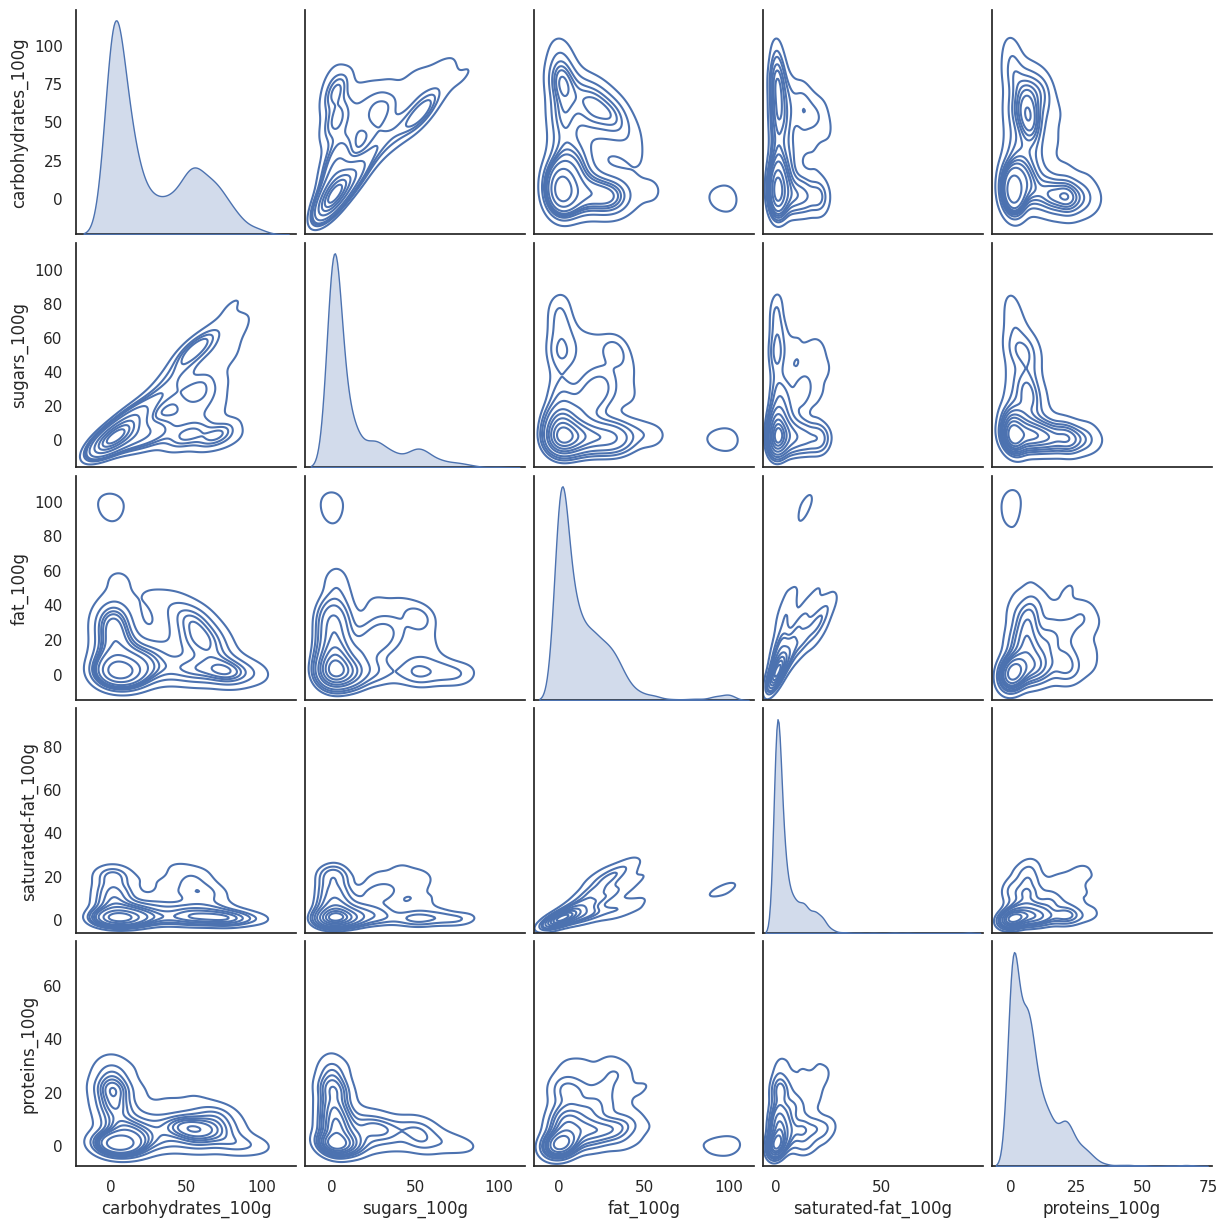

In [30]:
sns.pairplot(data=data[['carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','proteins_100g']].sample(2000),
             kind='kde')

Unfortunately, I was forced to sample the data to get any density plot estimate because the computation time was too high.

To view a similar information on the entire set information, I did what is in the next section.

### 3.1.3.  [&#9650;](#toc0_) <a id='toc3_1_3_'></a>Trying to represent 2D distributions with the log value of the effectives to better perceive variations.

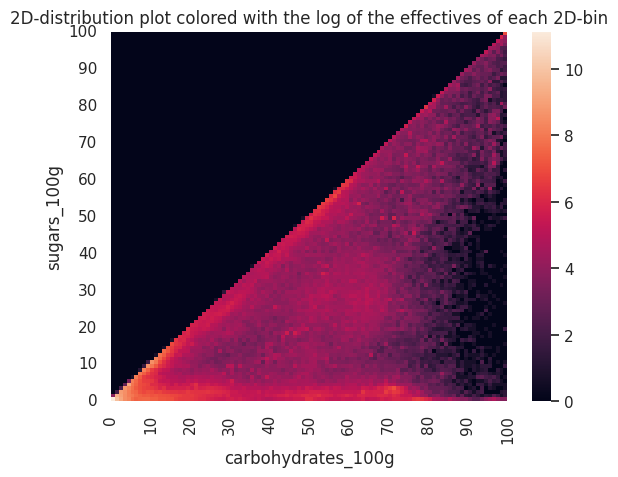

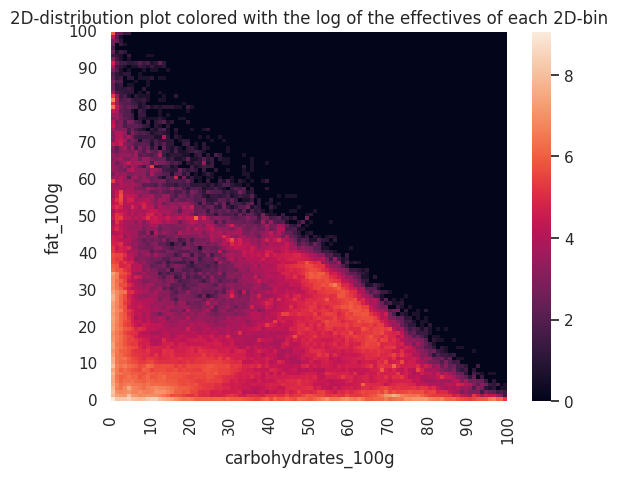

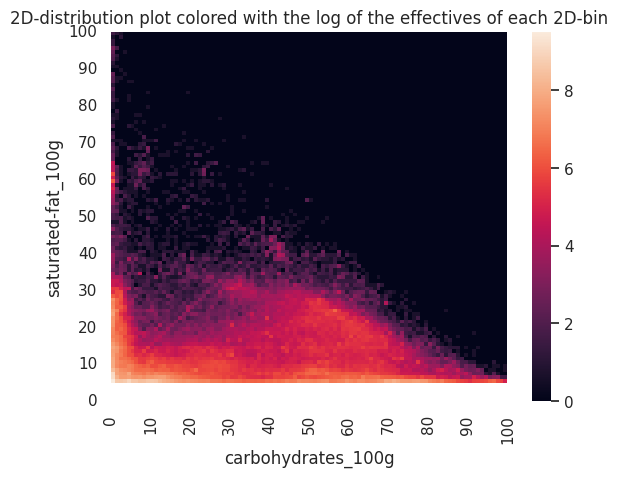

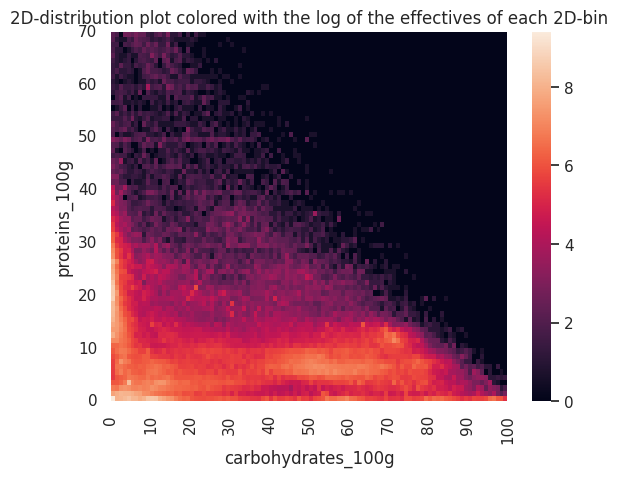

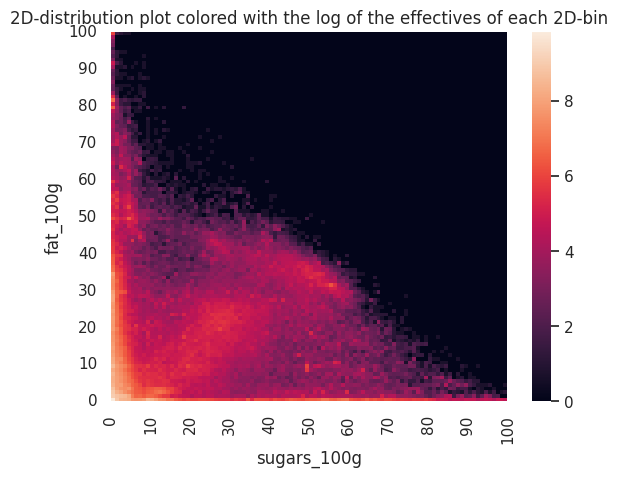

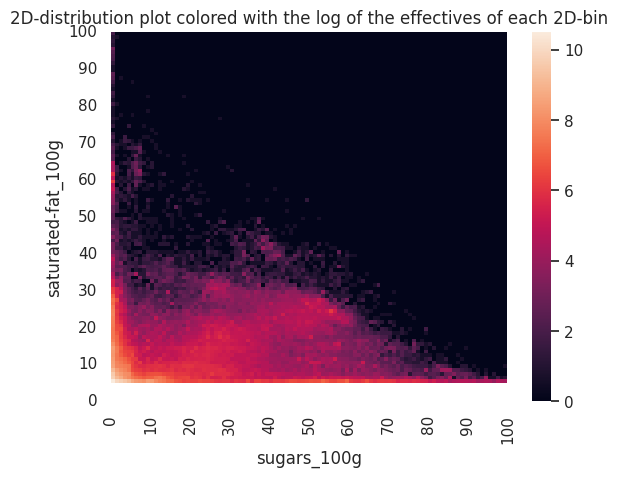

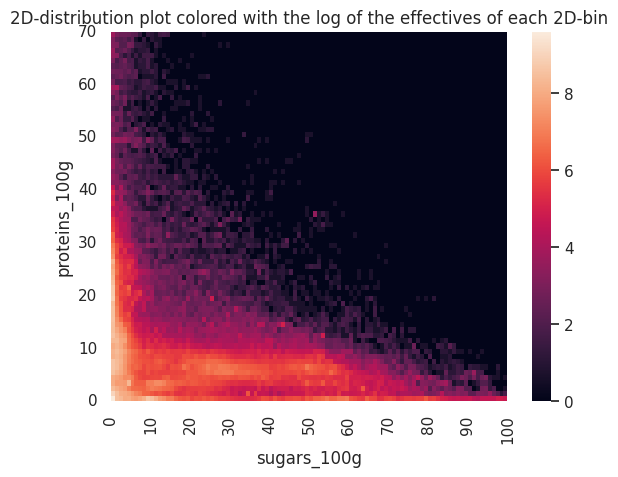

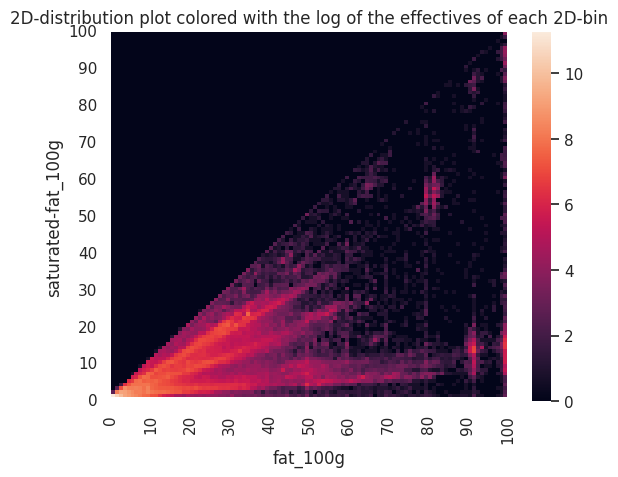

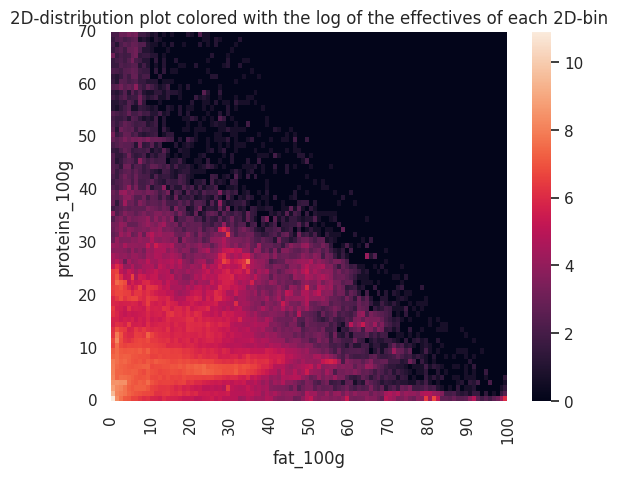

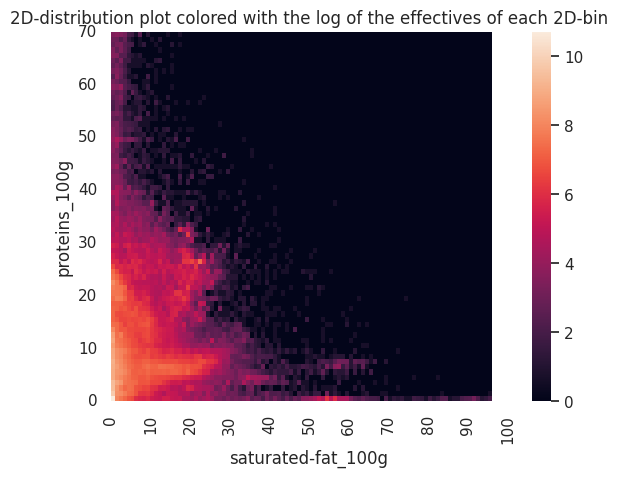

In [31]:
from itertools import combinations 

principal_nutrients = ['carbohydrates_100g',
                       'sugars_100g',
                       'fat_100g',
                       'saturated-fat_100g',
                       'proteins_100g']

nut_extrema = {'fat_100g': (0, 100),
               'saturated-fat_100g': (0, 100),
               'carbohydrates_100g': (0, 100),
               'sugars_100g': (0, 100),
               'fiber_100g': (0, 60),
               'proteins_100g': (0, 70),
               'salt_100g': (0, 100)}


cmap = sns.color_palette("rocket", as_cmap=True)
combs = combinations(principal_nutrients, 2)
for comb in combs:
    x, y = comb
    xmin, xmax = nut_extrema[x]
    ymin, ymax = nut_extrema[y]
    bins = pd.interval_range(start=0, end=100)
    X = pd.cut(data[x],bins=bins)
    Y = pd.cut(data[y],bins=bins)
    mat = pd.crosstab(Y, X)
    mat = mat + 1
    log_mat = np.log(mat)
    log_mat_rev = log_mat.iloc[::-1]
    sns.heatmap(log_mat_rev, cmap=cmap)
    plt.xticks(np.arange(xmin,xmax+1,10), labels=np.arange(xmin,xmax+1,10))
    plt.yticks(np.arange(ymin,ymax+1,10), labels=np.arange(ymin,ymax+1,10)[::-1])
    plt.ylabel(f"{y}")
    plt.xlabel(f"{x}")
    plt.title('2D-distribution plot colored with the log of the effectives of each 2D-bin')
    plt.show()

## 3.2.  [&#9650;](#toc0_) <a id='toc3_2_'></a>Categorical vs quantitative features analysis

### 3.2.1.  [&#9650;](#toc0_) <a id='toc3_2_1_'></a>Sugars and Nutriscore

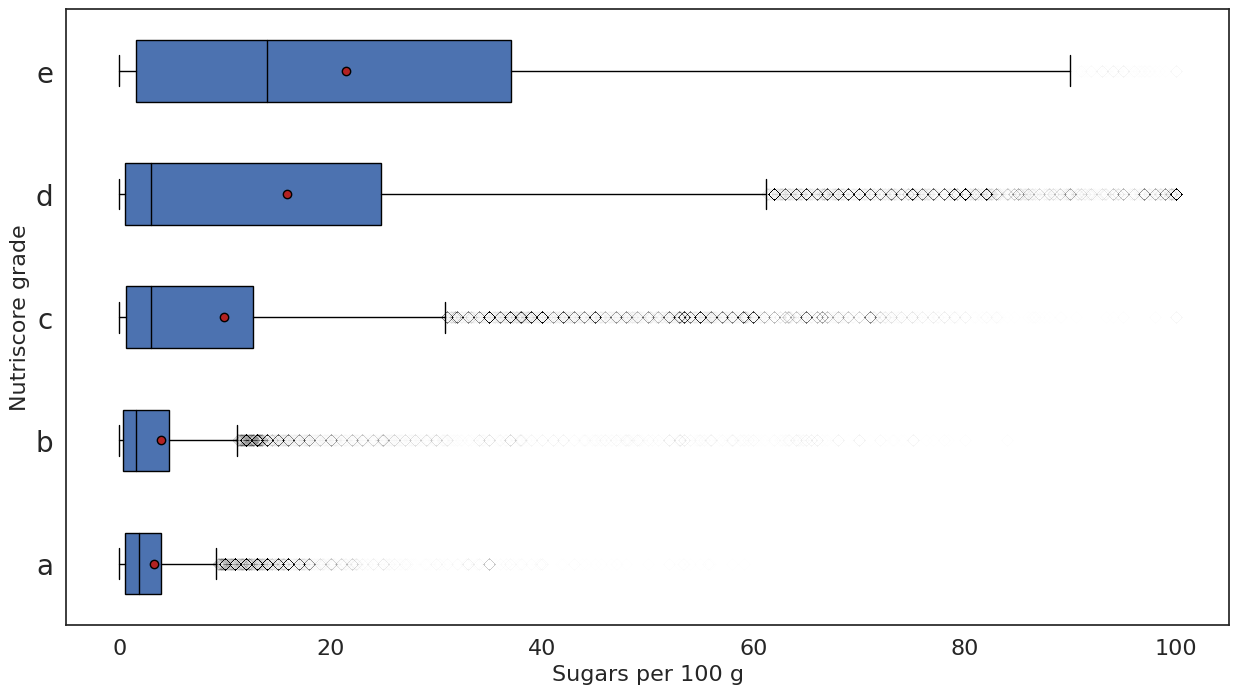

In [76]:
### Plotting a boxplot per nutriscore grade
cat_name = 'nutriscore_grade'
num_name = 'sugars_100g'
fts = [cat_name, num_name]

modalities = list(data[cat_name].unique())
modalities.pop(modalities.index(np.nan))
modalities.sort()
groups = [] # generate a df per modality
for m in modalities:
    groups.append(data.loc[data[cat_name] == m, num_name])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(15,8))
plt.boxplot(groups, labels=modalities, showfliers=True,
            medianprops=medianprops, vert=False,
            patch_artist=True, showmeans=True, meanprops=meanprops,
            flierprops={'marker': 'D',
                        'alpha': 0.005,
                        'color': 'blue'})
plt.xticks(size=16)
plt.yticks(size=20)
plt.xlabel(num_name, size=16)
plt.ylabel('Nutriscore grade', size=16)
plt.show()

In [73]:
def eta_squared(cat_var, num_var):
    """ Parameters : 2 ndarrays without nulls. 
     
    Compute and return the squared non-linear correlation coefficient
    equals to SSBetween/SSTotal (ANOVA)"""
    classes_names = cat_var.unique()
    grand_mean = num_var.mean()
    classes = []
    for c in classes_names:
        yi = num_var[cat_var == c]
        classes.append({'ni': len(yi),
                        'class_mean': yi.mean()})
    SSTotal = sum([(y - grand_mean)**2 for y in num_var])
    SSBetween = sum([c['ni'] * (c['class_mean']-grand_mean)**2 for c in classes])
    return SSBetween/SSTotal


In [74]:
data_nutri = data.loc[data.nutriscore_grade.notnull(), fts]
cat_var = data_nutri[cat_name]
num_var = data_nutri[num_name]
eta_squared(cat_var, num_var)

0.11998606885444361

Interpret $\eta^2$; a rule of thumb (Cohen):

    .01 ~ small
    .06 ~ medium
    >.14 ~ large

As $\eta^2$ is close to 0.14, We can consider that there is a quite significant correlation between the nutriscore grade and sugars level in 100 g of the product.

That was quite obvious looking at the boxplots

In [92]:
def cat_num_analysis(cat_name, num_name, data, figsize=(15,8)):
    fts = [cat_name, num_name]
    mask = data[cat_name].notnull() & data[num_name].notnull()
    df = data.loc[mask, fts]
    
    modalities = df[cat_name].unique()
    modalities.sort()
    groups = [] # generate a df per modality
    for m in modalities:
        groups.append(df.loc[data[cat_name] == m, num_name])
        
    medianprops = {'color':"black"}
    meanprops = {'marker':'o',
                 'markeredgecolor':'black',
                 'markerfacecolor':'firebrick'}
    flierprops={'marker': 'D',
                'alpha': 0.005,
                'color': 'blue'}

    plt.figure(figsize=figsize)
    plt.boxplot(groups, labels=modalities, showfliers=True,
                medianprops=medianprops, vert=False,
                patch_artist=True, showmeans=True,
                meanprops=meanprops, flierprops=flierprops)
    plt.xticks(size=16)
    plt.yticks(size=20)
    plt.xlabel(num_name, size=16)
    plt.ylabel(cat_name, size=16)
    plt.show()   
    
    cat_var = df[cat_name]
    num_var = df[num_name]
    print(f"eta squared : {round(eta_squared(cat_var, num_var), 2)}")
    return None    

### 3.2.2.  [&#9650;](#toc0_) <a id='toc3_2_2_'></a>Others nutrients and nutriscore

--------------------
FAT_100G


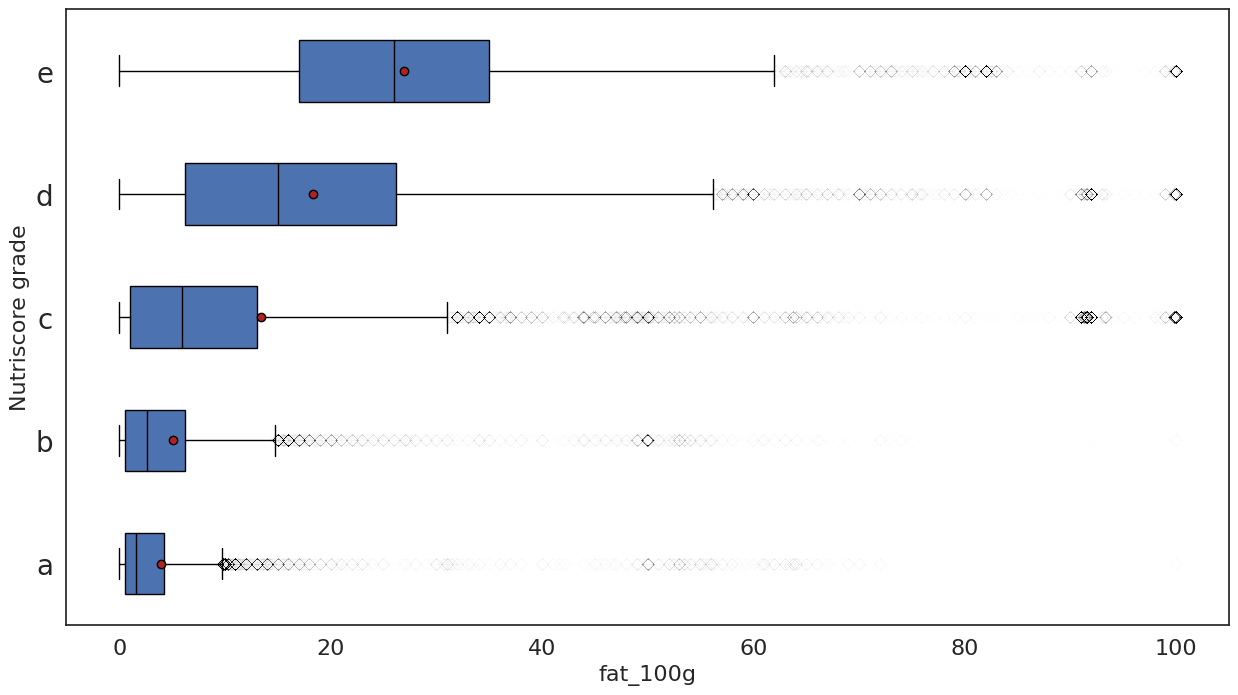

eta squared : 0.18


--------------------
SATURATED-FAT_100G


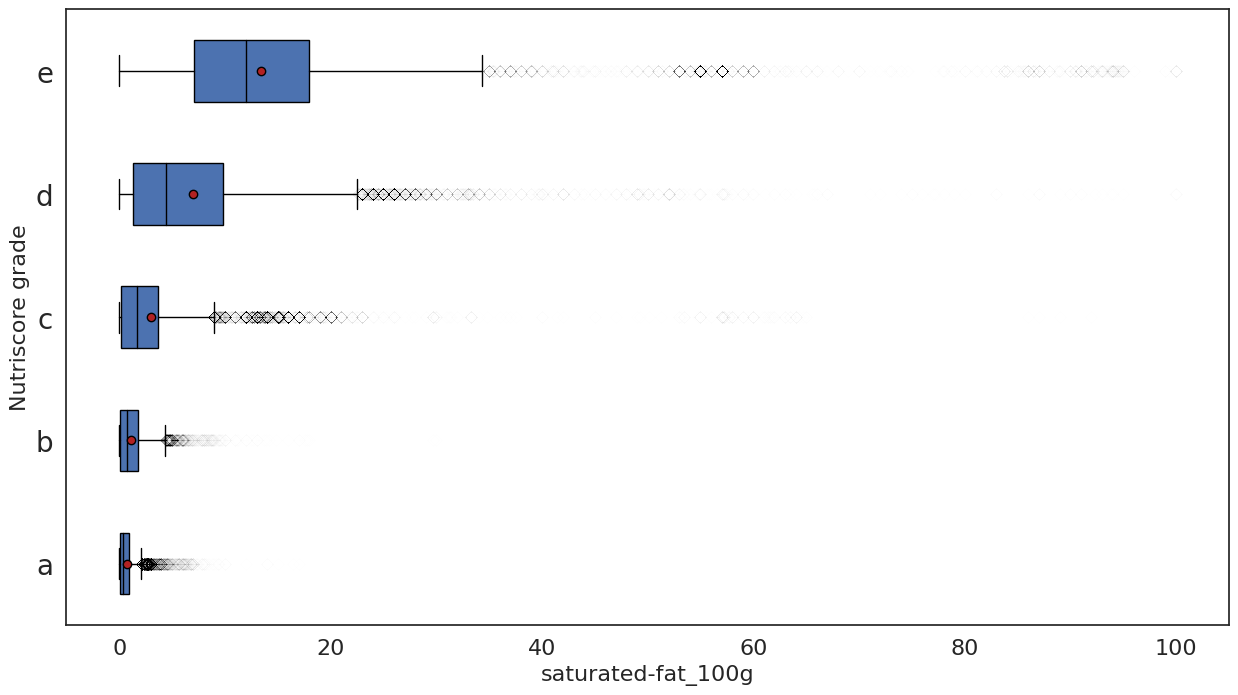

eta squared : 0.28


--------------------
CARBOHYDRATES_100G


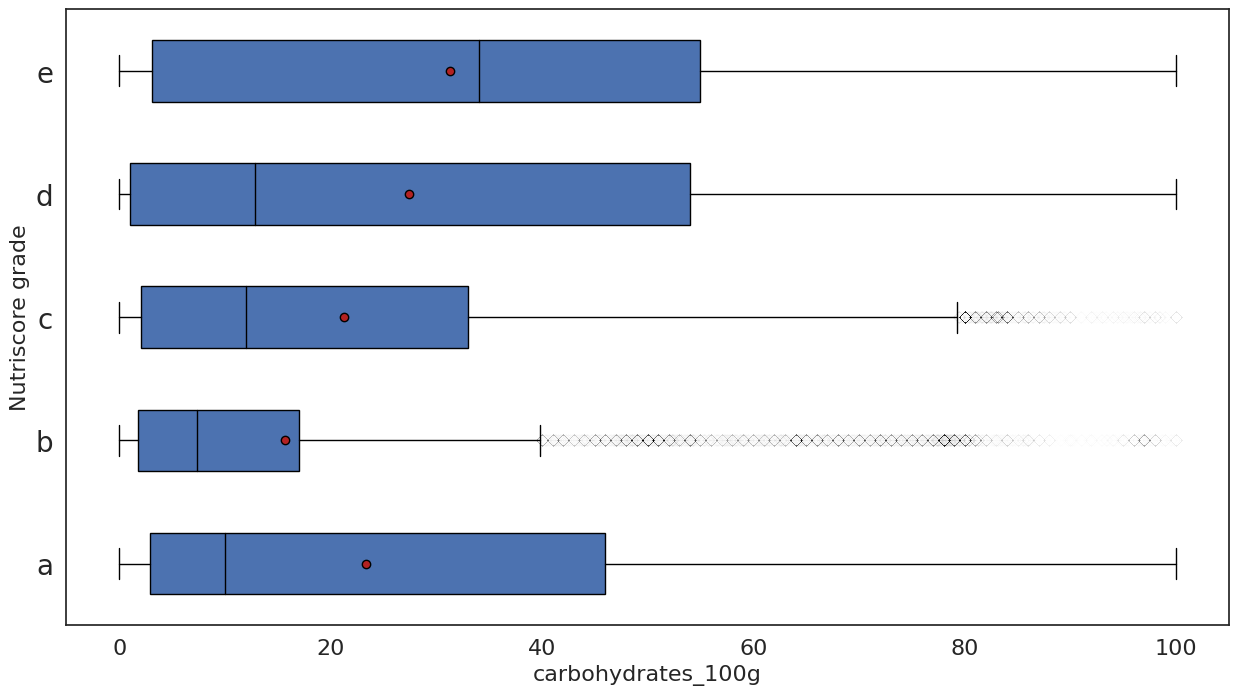

eta squared : 0.03


--------------------
FIBER_100G


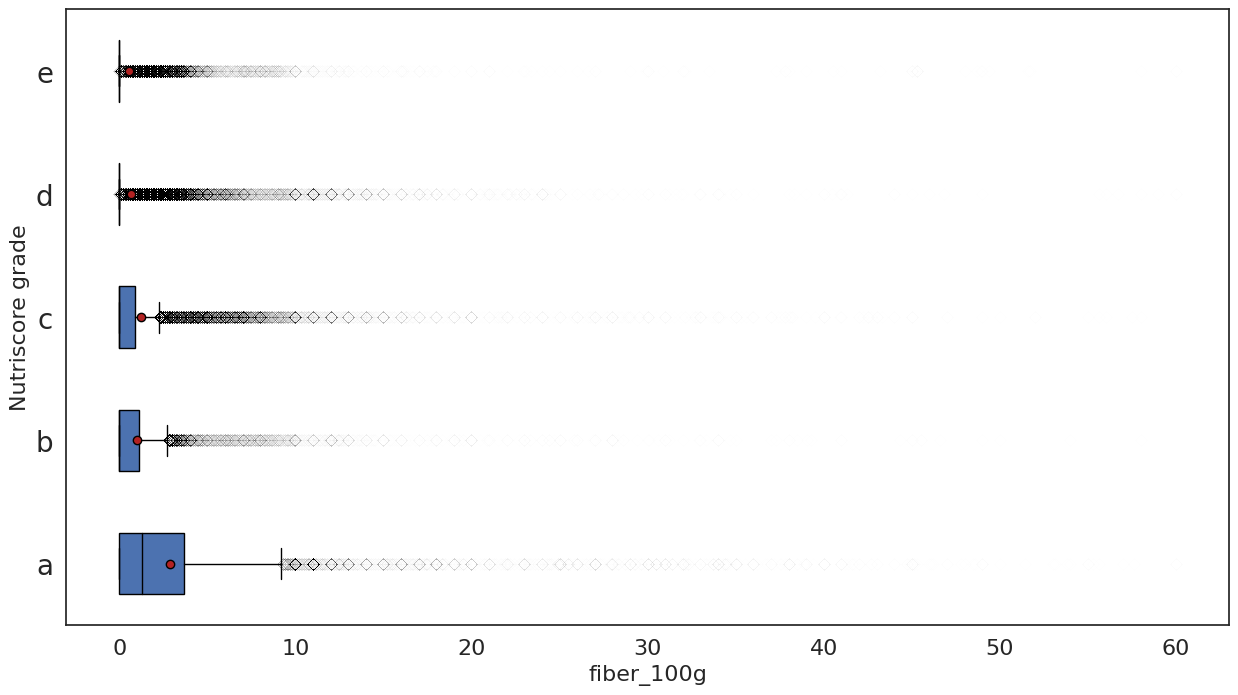

eta squared : 0.06


--------------------
PROTEINS_100G


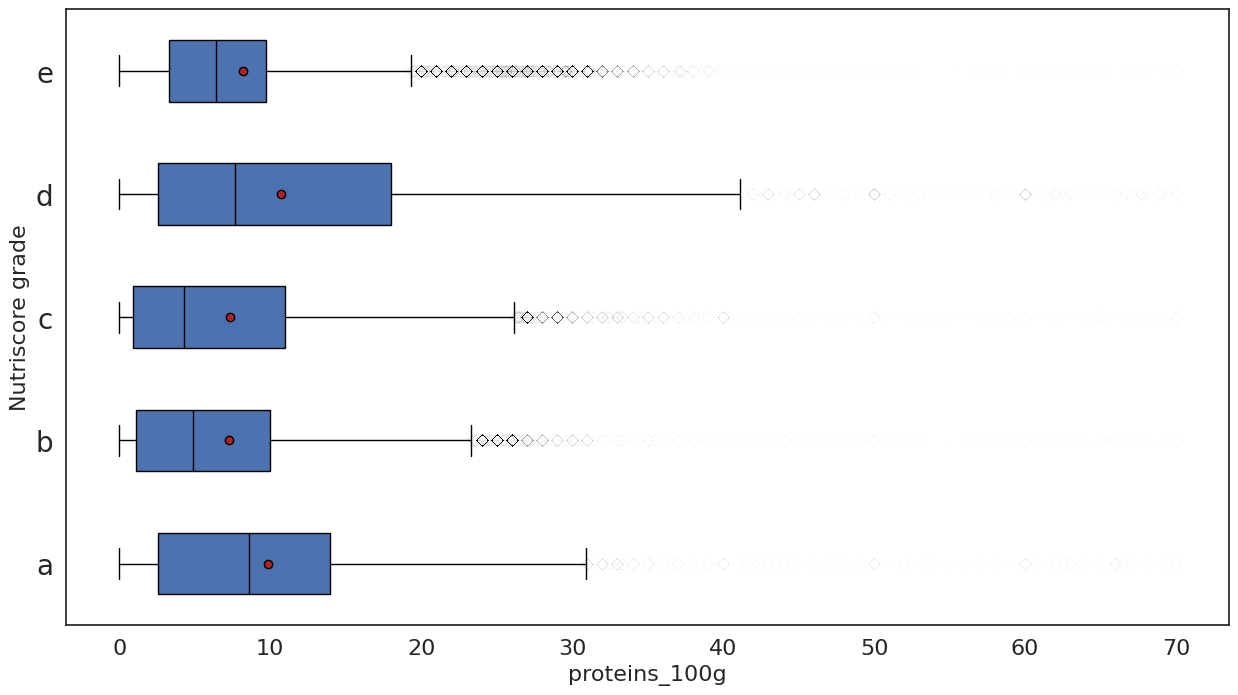

eta squared : 0.03


--------------------
SALT_100G


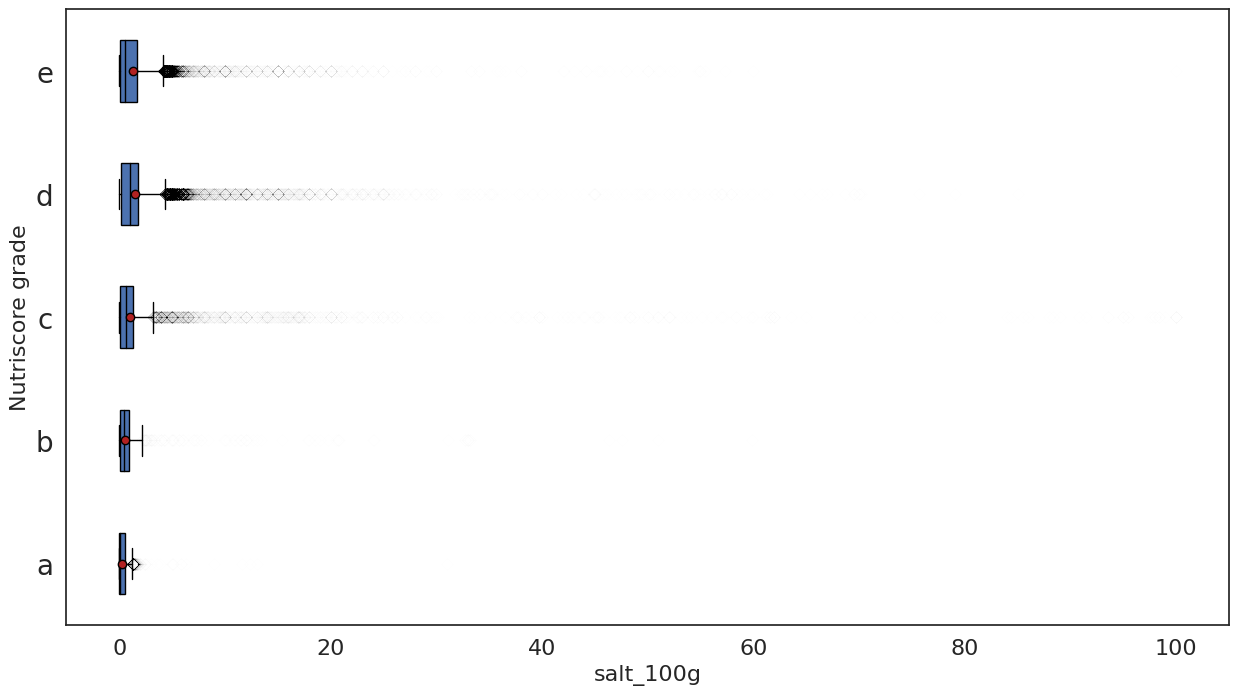

eta squared : 0.03




In [87]:
num_names = ['fat_100g',
             'saturated-fat_100g',
             'carbohydrates_100g',
             'fiber_100g',
             'proteins_100g',
             'salt_100g']

for num_name in num_names:
    print('-'*20)
    print(num_name.upper())
    cat_num_analysis('nutriscore_grade',
                     num_name,
                     data)
    print('\n')

The correlation between nutriscore and saturated fat is very high (0.28)!
It is high with fat (0.18) and somewhat important with fiber (0.06)

For the others, the link is less clear.
 

### 3.2.3.  [&#9650;](#toc0_) <a id='toc3_2_3_'></a>PNNS groups 1 and nutrients

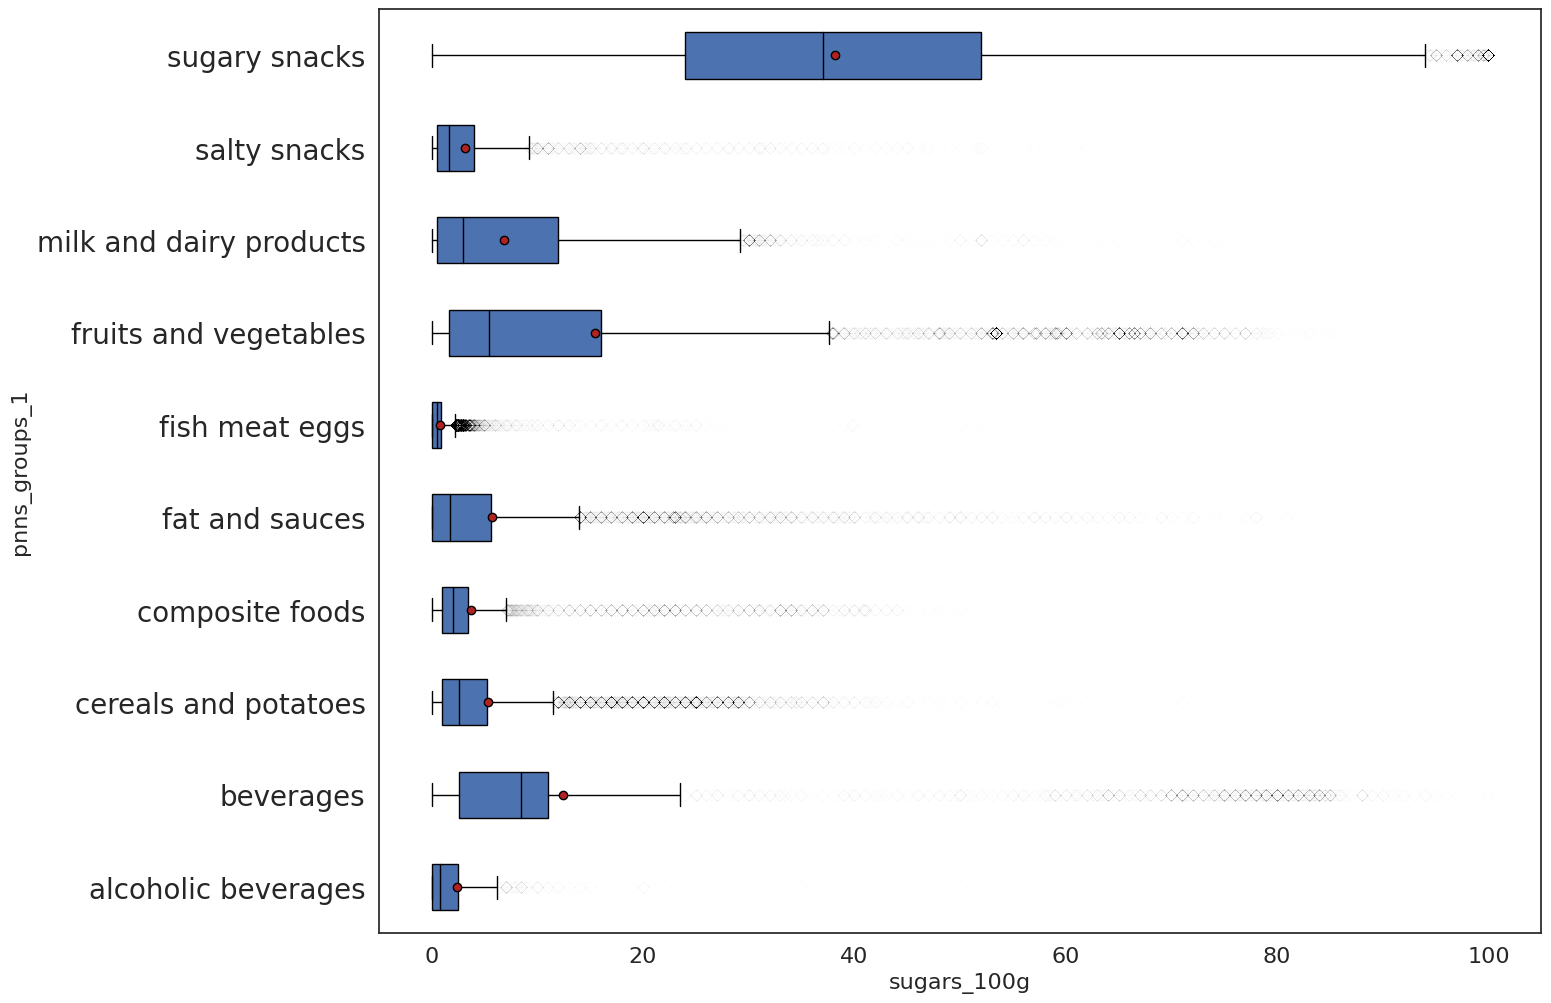

eta squared : 0.5


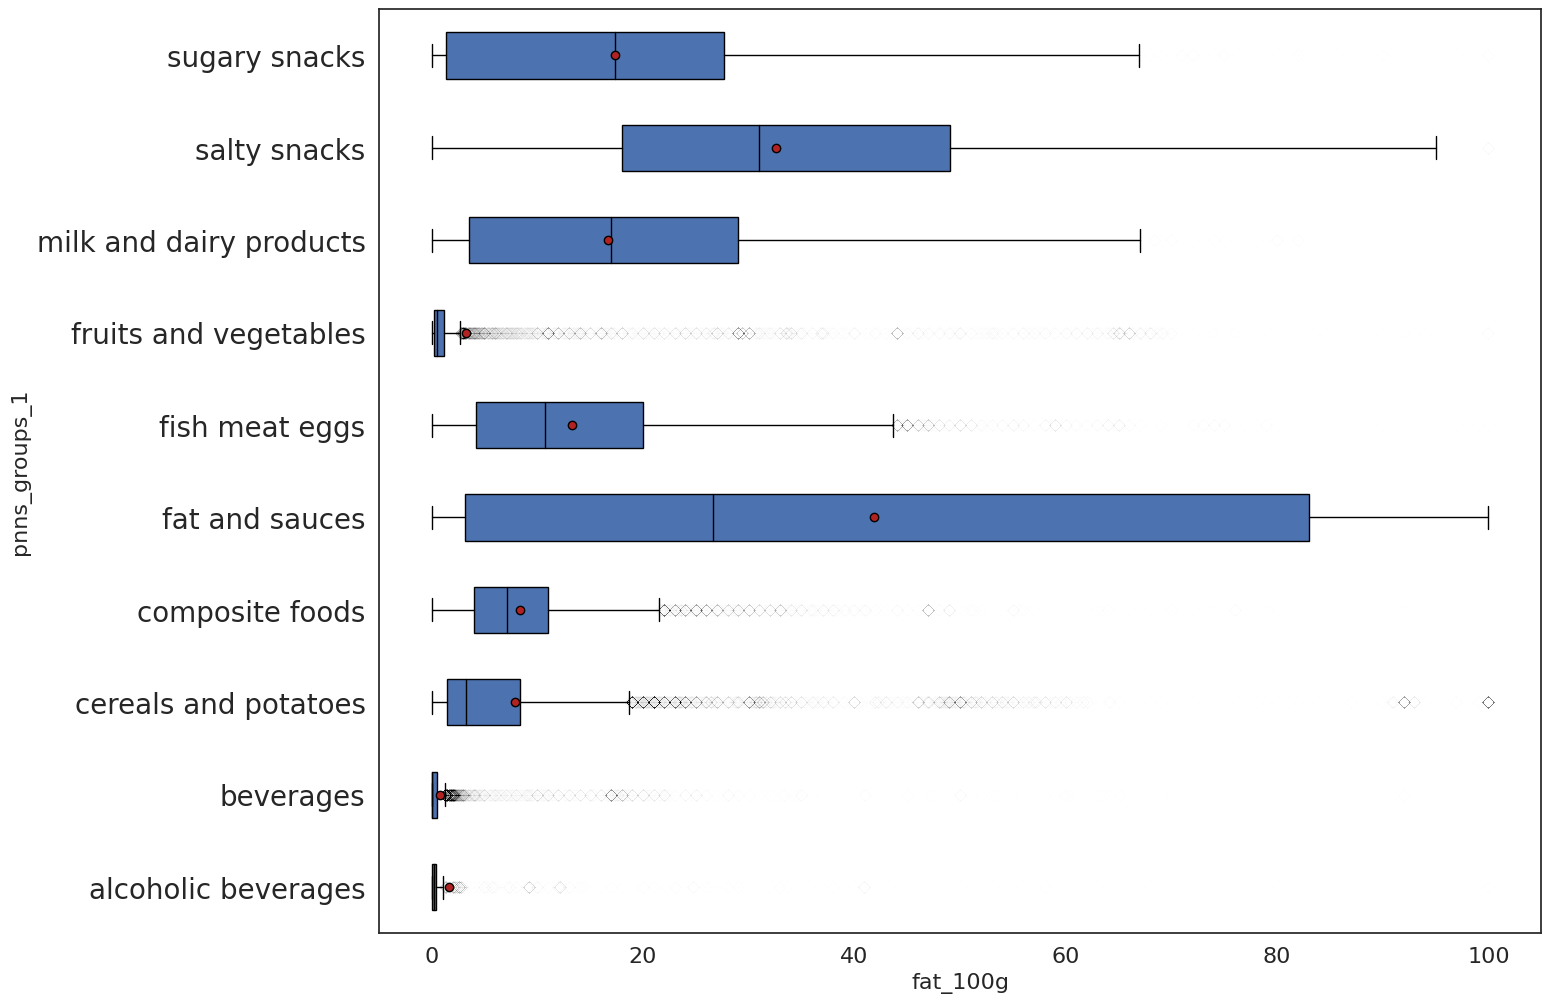

eta squared : 0.31


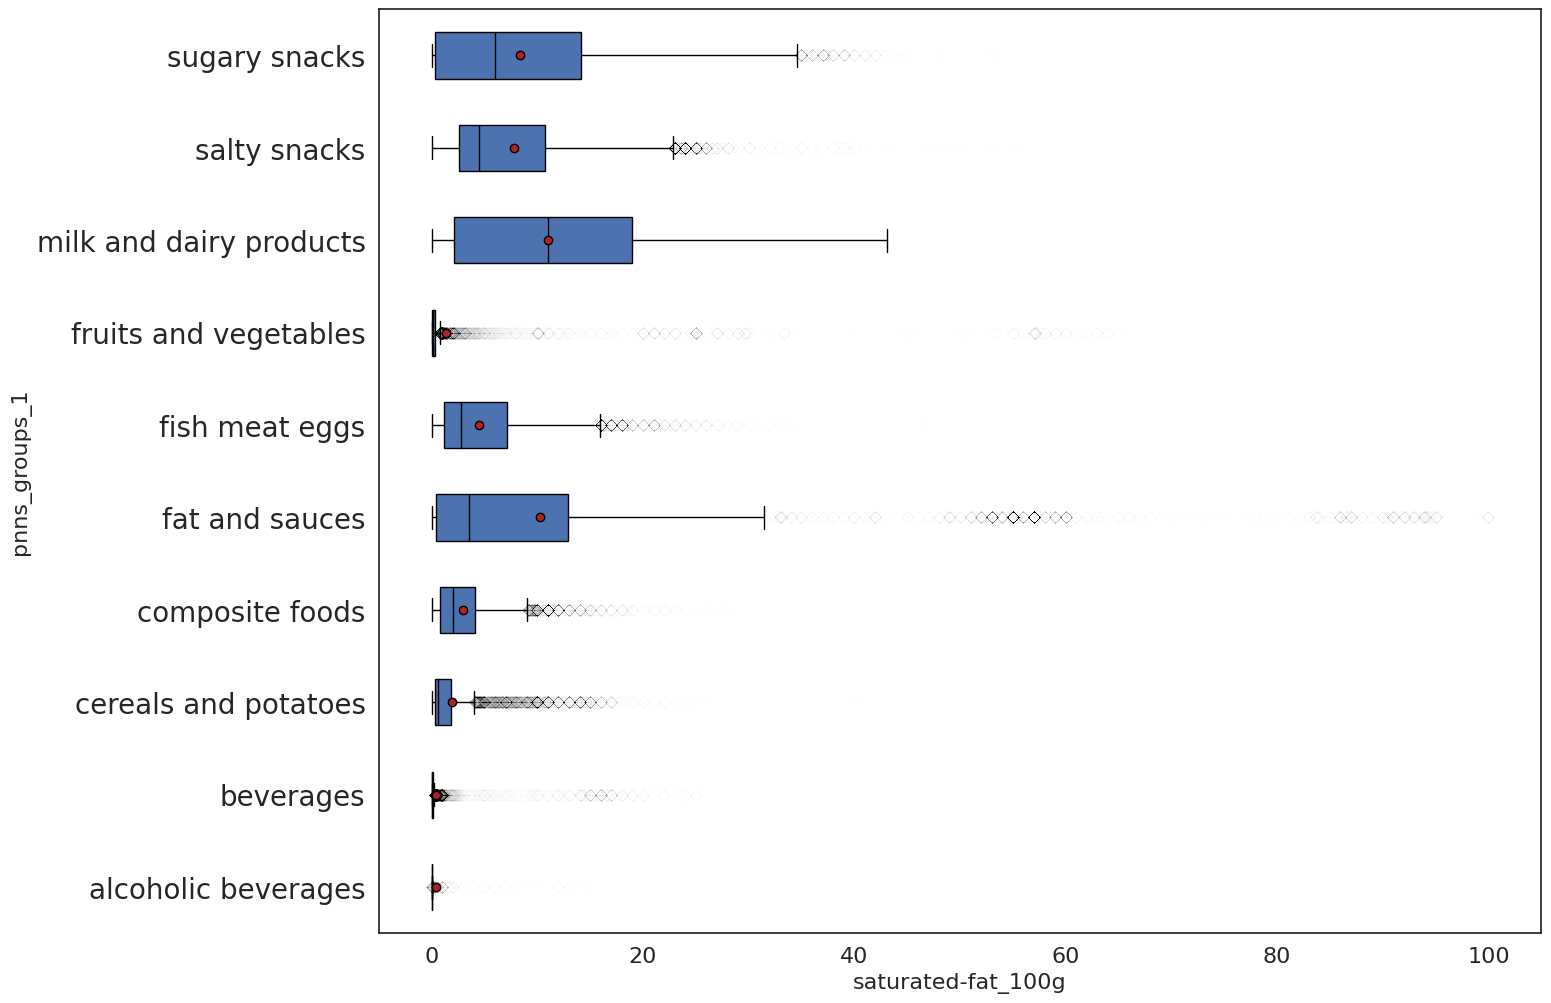

eta squared : 0.17


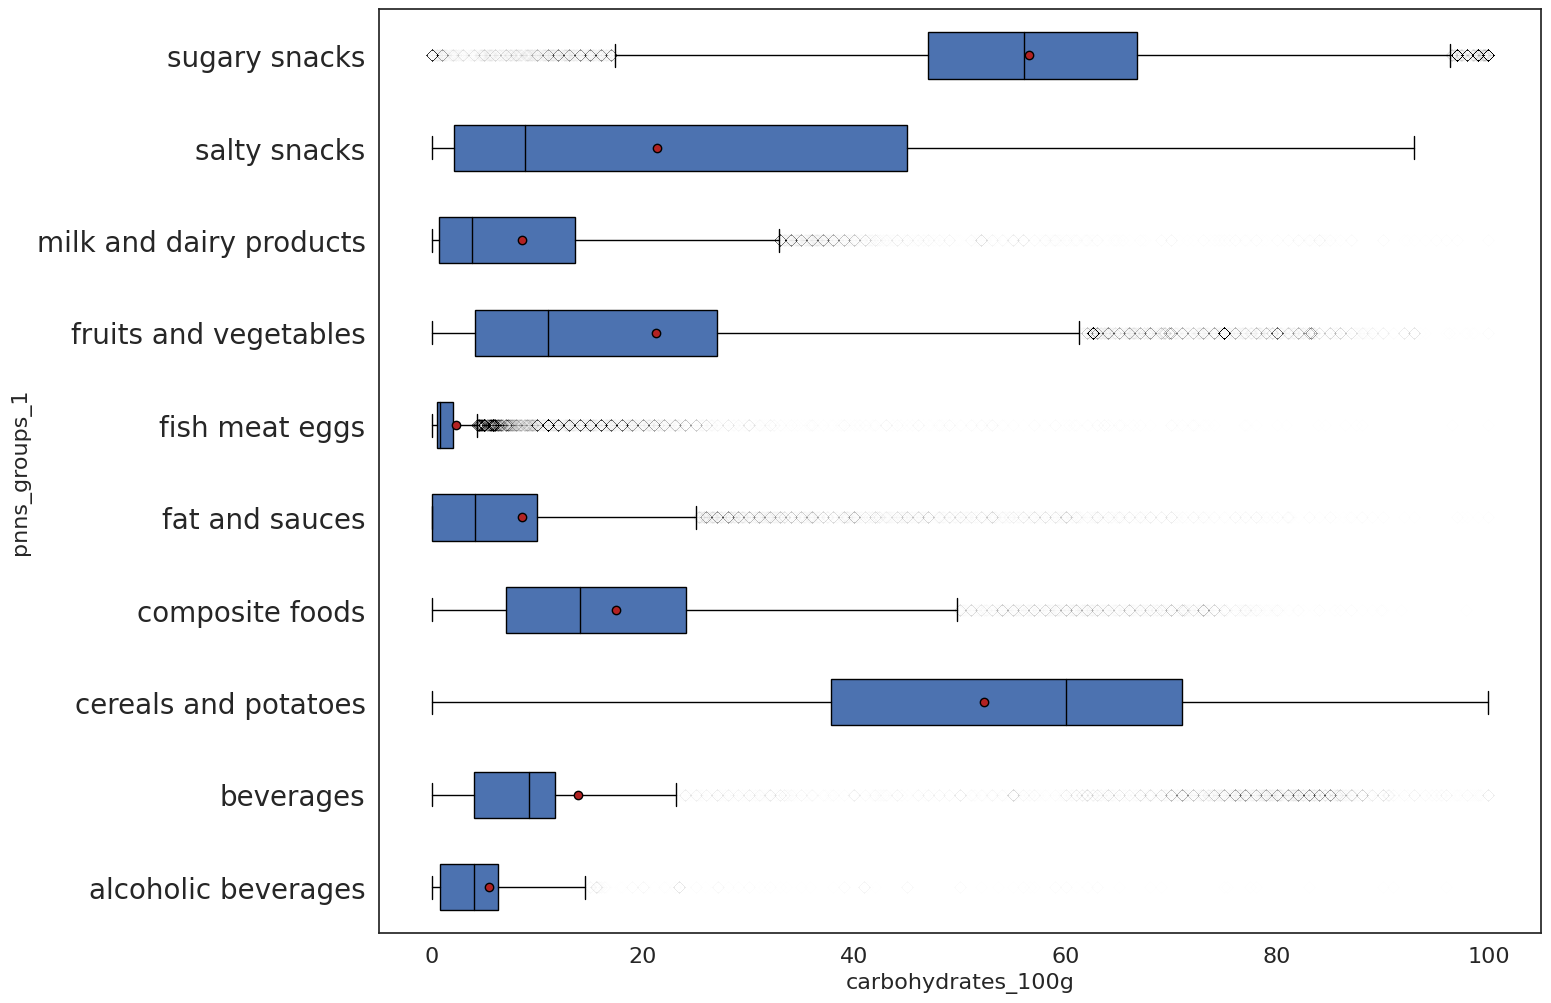

eta squared : 0.6


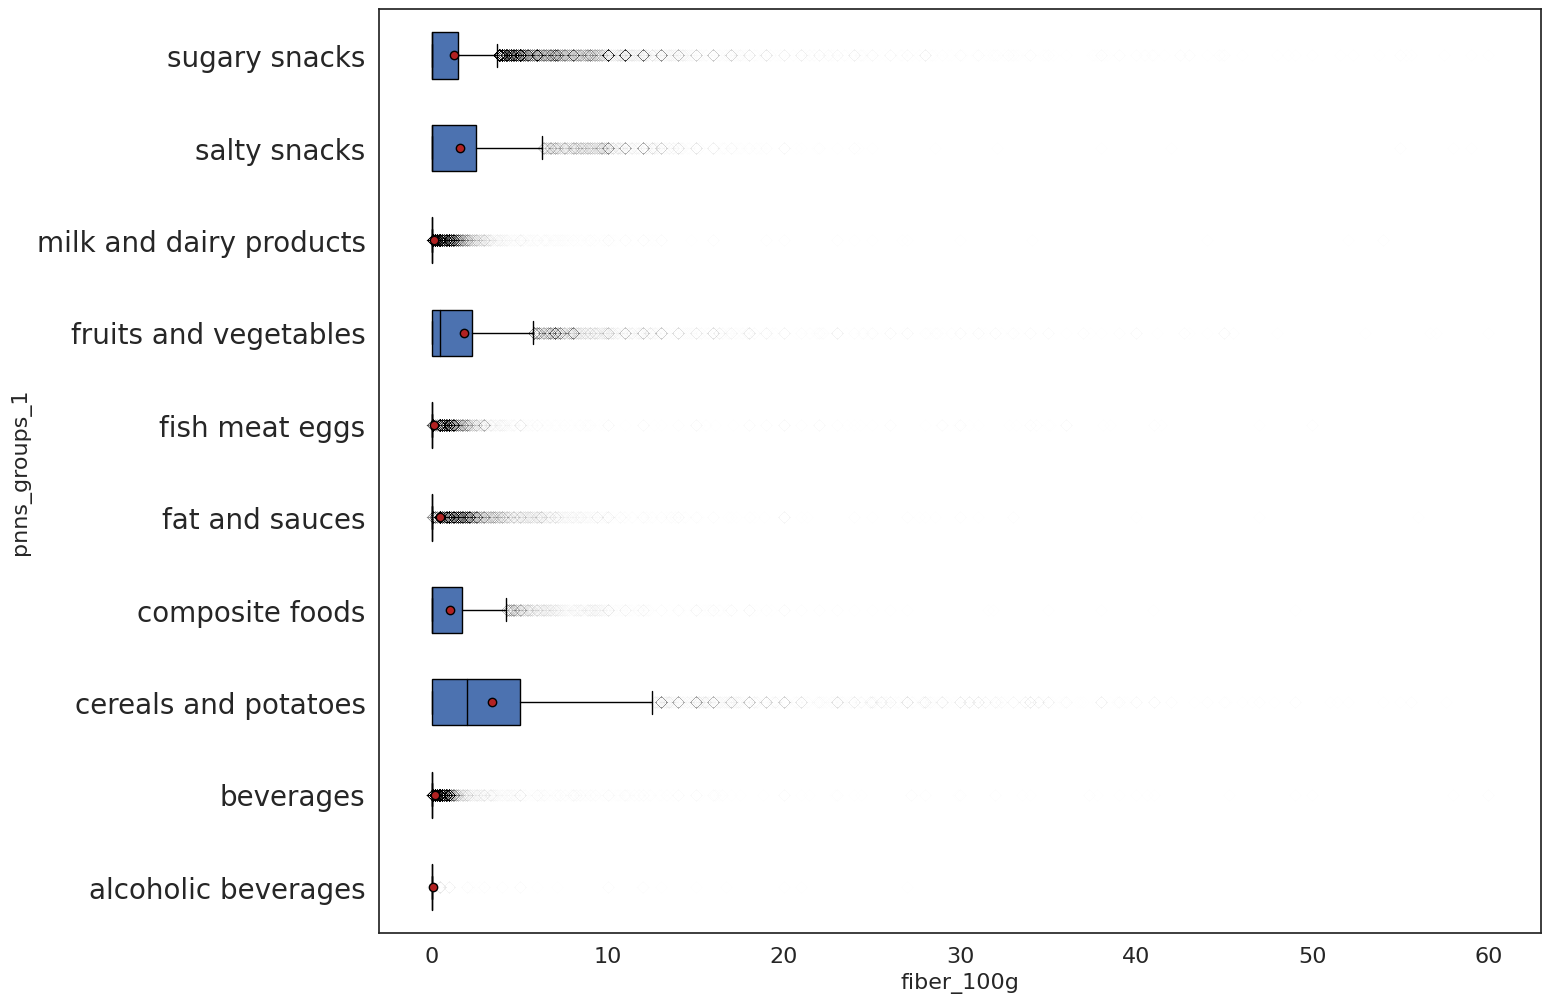

eta squared : 0.13


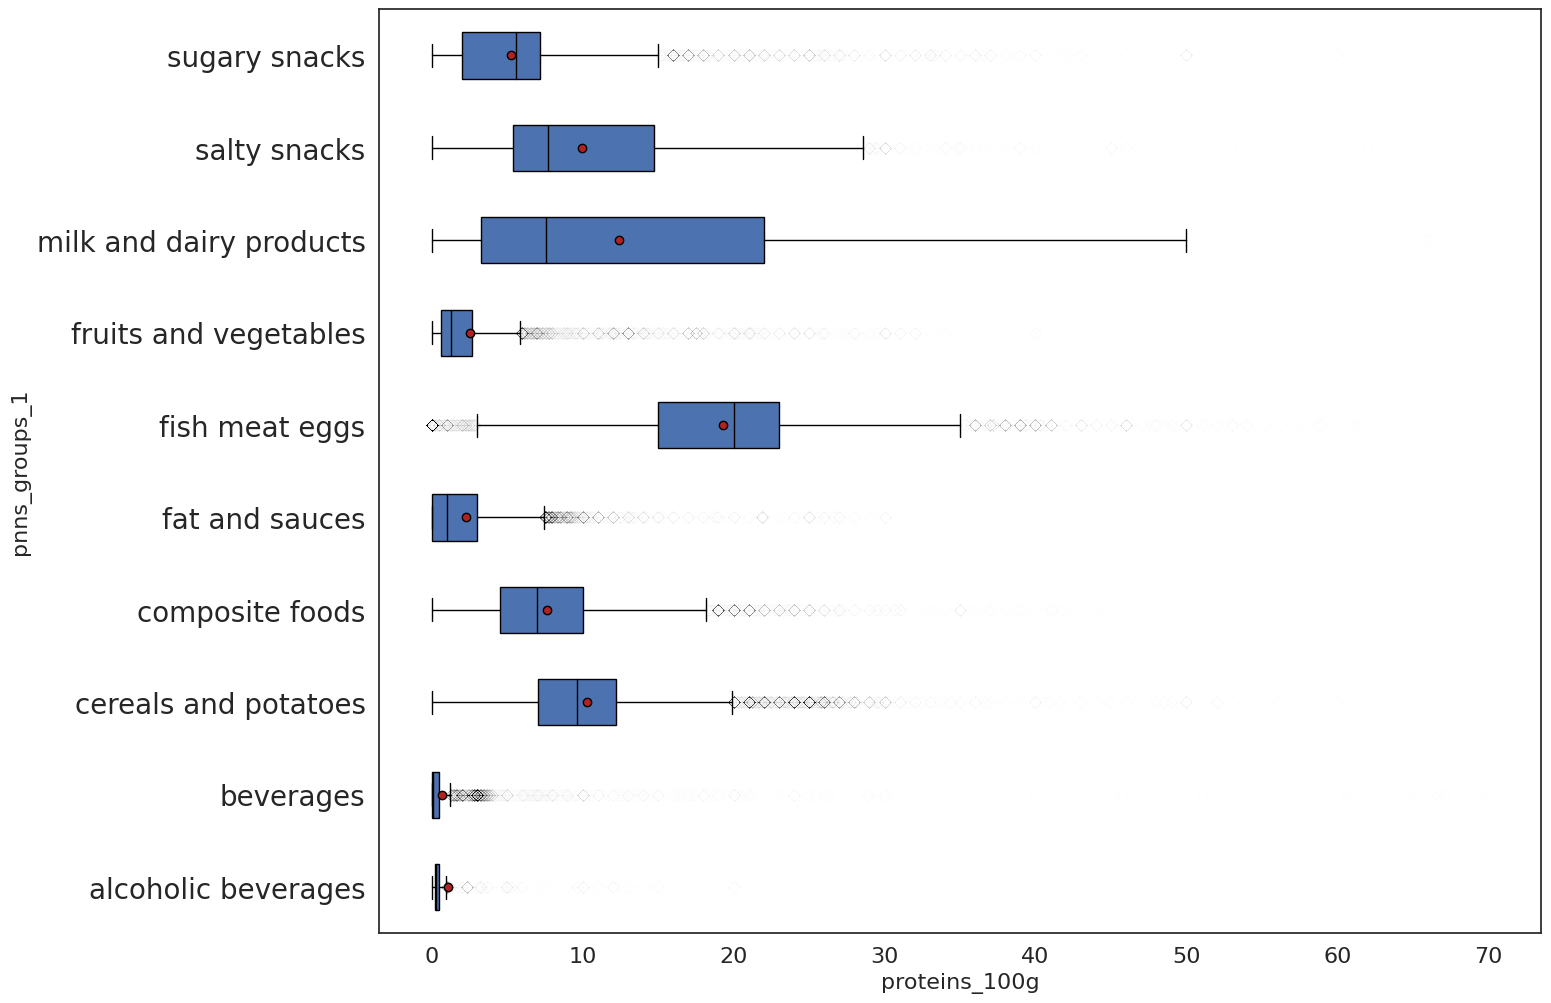

eta squared : 0.5


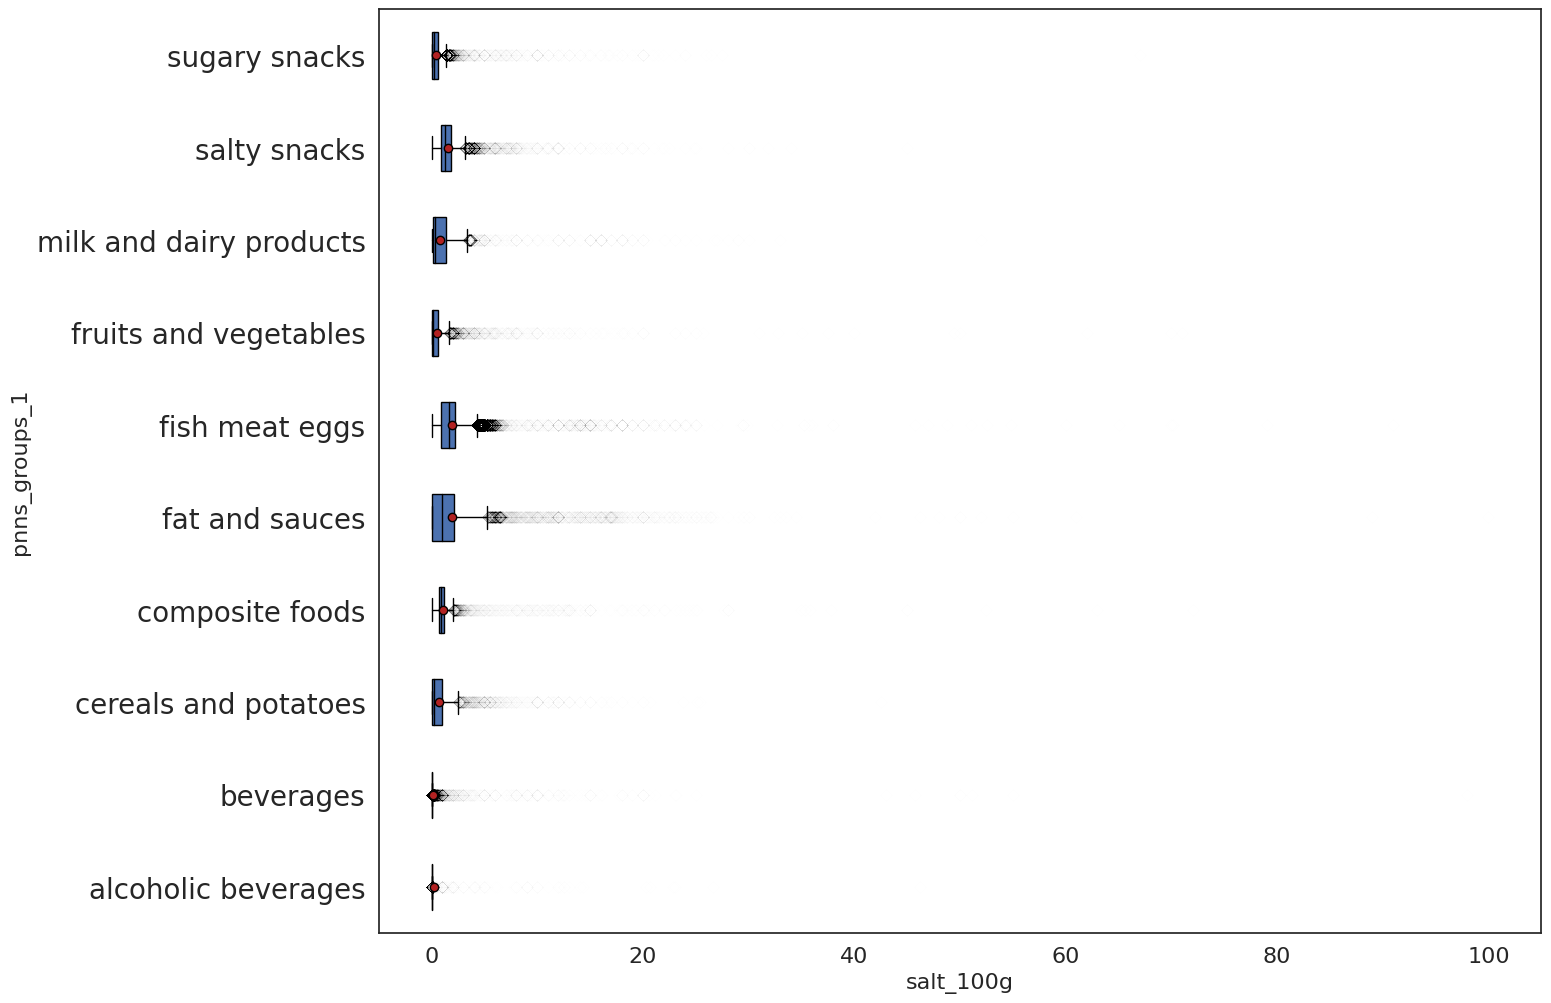

eta squared : 0.12


In [93]:
num_names = ['sugars_100g',
             'fat_100g',
             'saturated-fat_100g',
             'carbohydrates_100g',
             'fiber_100g',
             'proteins_100g',
             'salt_100g']
cat_name = 'pnns_groups_1'

for num_name in num_names:
    cat_num_analysis(cat_name, num_name,data, figsize=(15,12)) 

### 3.2.4.  [&#9650;](#toc0_) <a id='toc3_2_4_'></a>PNNS groups 2 and sugars

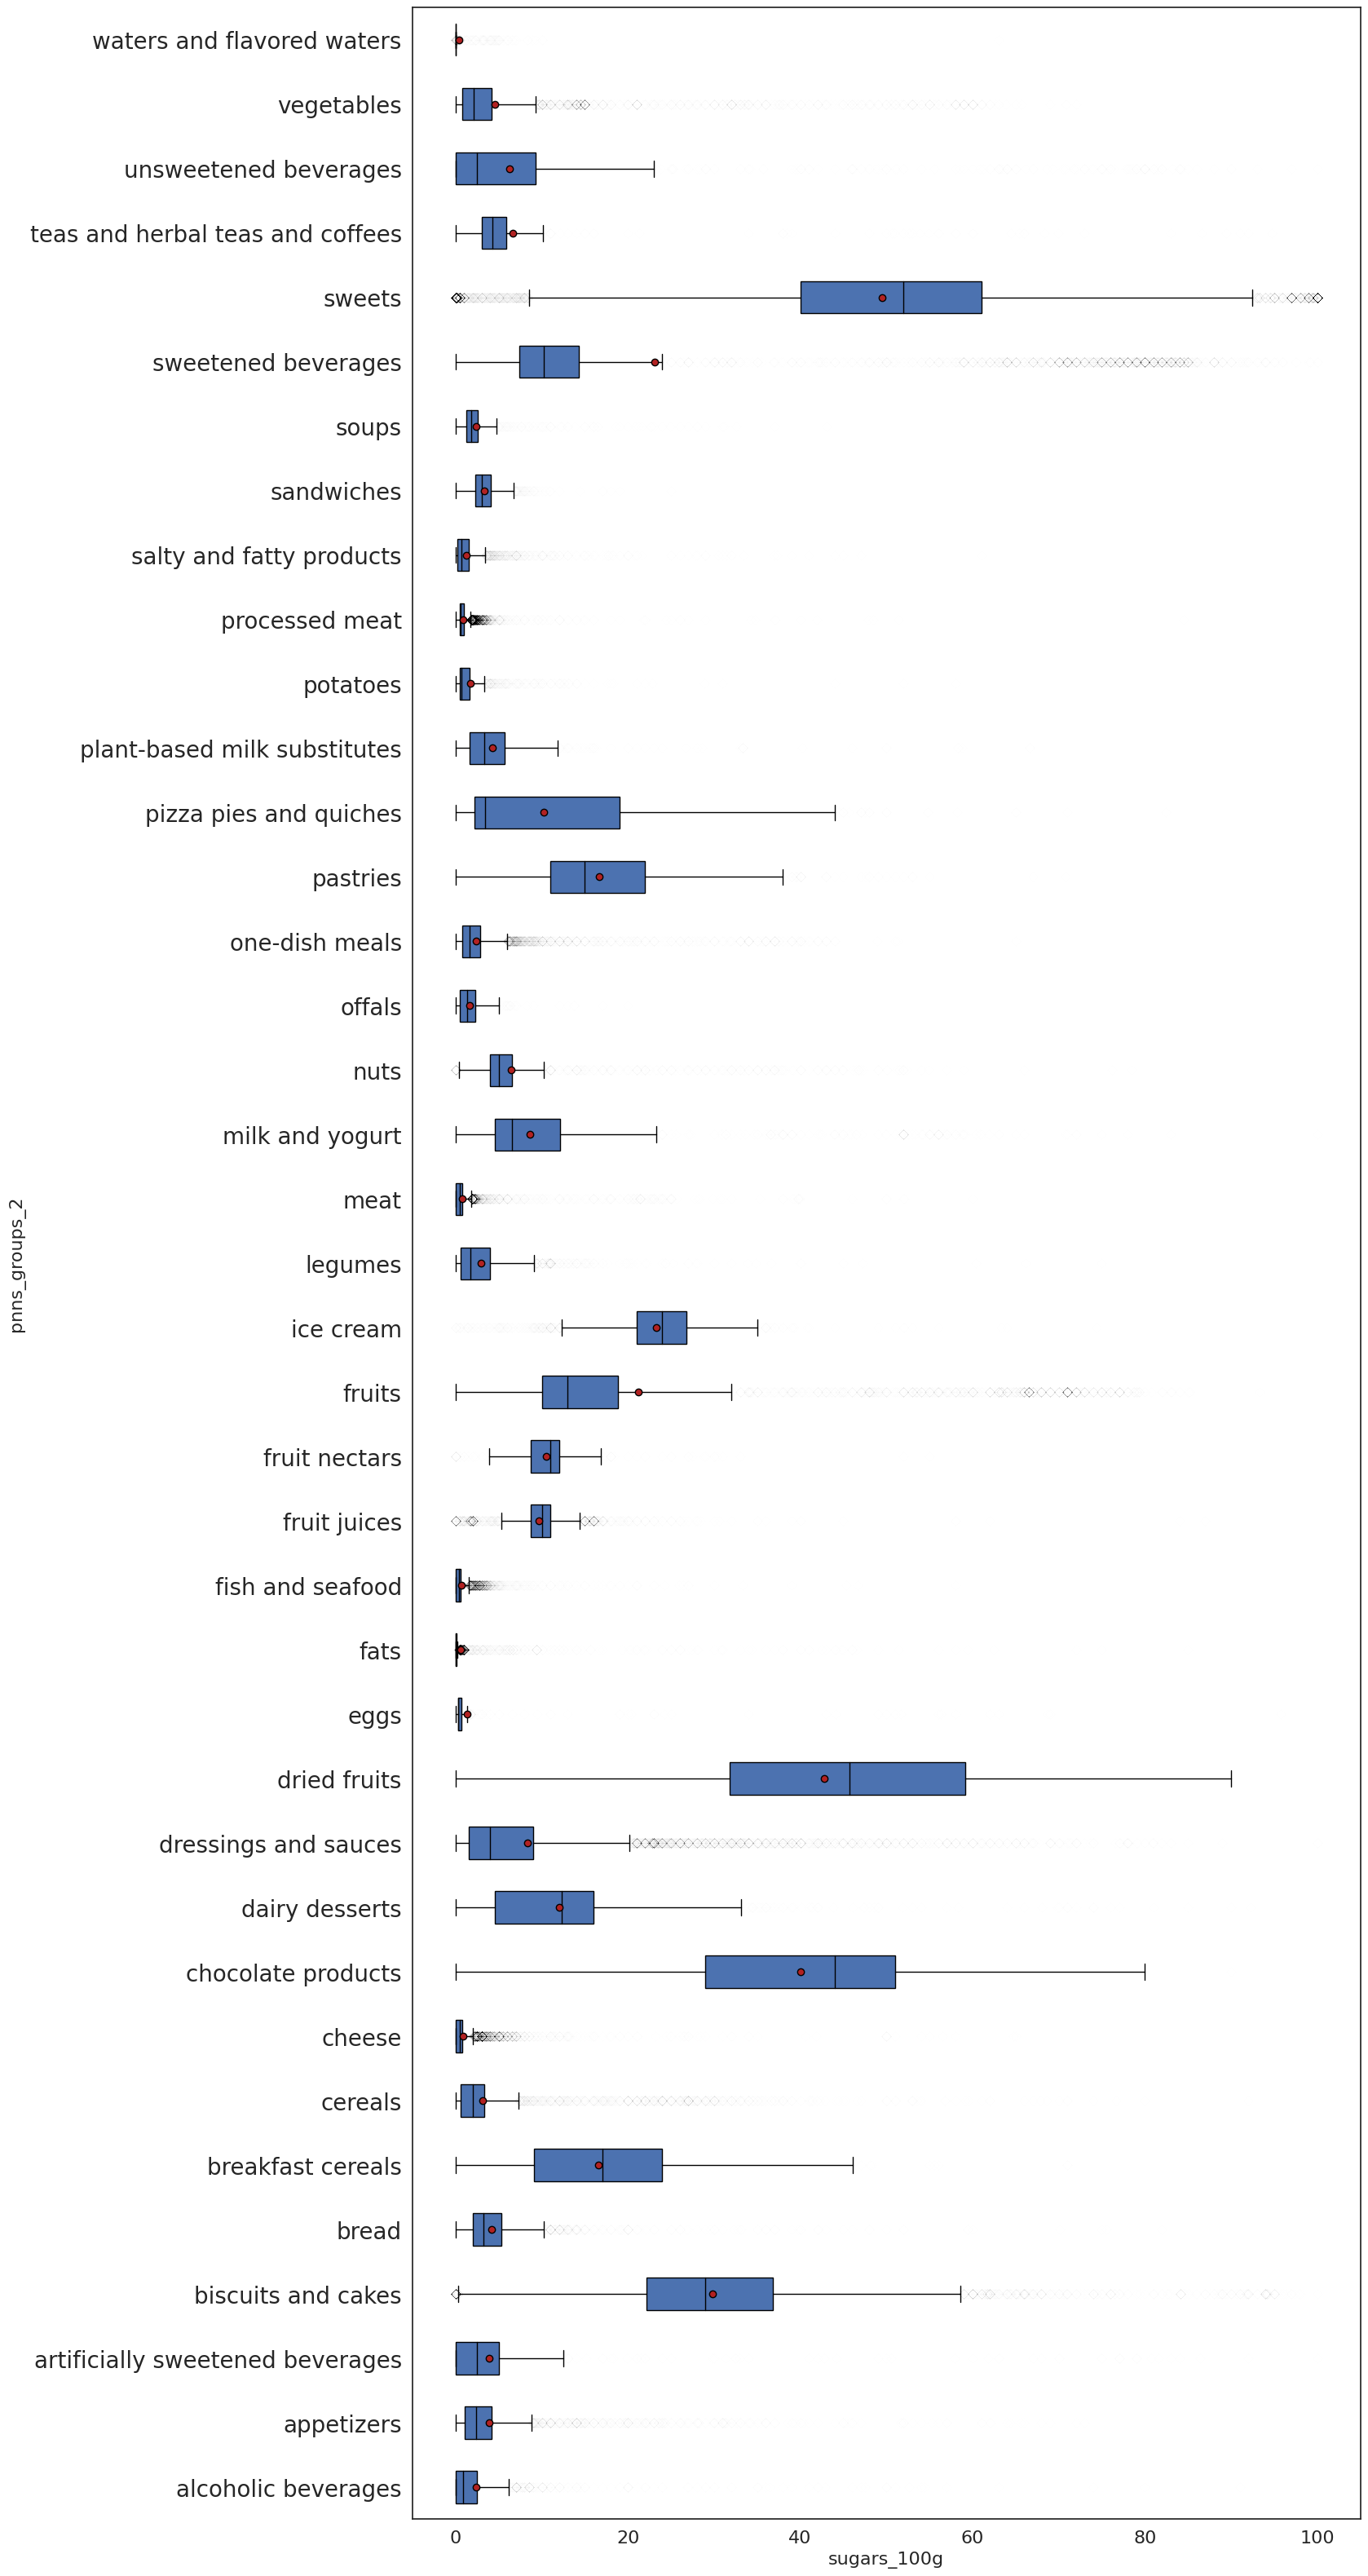

eta squared : 0.65


In [94]:
cat_num_analysis('pnns_groups_2', 'sugars_100g', data, figsize=(15,40))

Idea : order pnns groups 2 according to its amplitude range(2, 98) (too avoid outliers). Those will be the groups on which we really want to advise the app users

# 4.  [&#9650;](#toc0_) <a id='toc4_'></a>Multivariate Analysis

## 4.1.  [&#9650;](#toc0_) <a id='toc4_1_'></a>PCA and visualisations in the 2 first factorial planes

In [3]:
palette = sns.color_palette("bright", 10)

def display_circles(pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""
    pcs = pca.components_
    n_comp = pca.n_components_
    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, figsize=(10,10)):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''
    n_comp = pca.n_components_
    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=figsize)
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var)[::-1]:
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            xboundary = np.max(np.abs(X_projected[:, [d1]])) * 1.1
            yboundary = np.max(np.abs(X_projected[:, [d2]])) * 1.1
            plt.xlim([-xboundary,xboundary])
            plt.ylim([-yboundary,yboundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
   
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

sugars_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
mean -6.595682e-17 -2.608959e-16        7.621677e-17        3.737553e-17   
std   1.000002e+00  1.000002e+00        1.000002e+00        1.000002e+00   

        fiber_100g  proteins_100g     salt_100g  energy-kcal_100g  \
mean -4.910119e-17   1.377765e-16  2.066647e-16     -1.839462e-16   
std   1.000002e+00   1.000002e+00  1.000002e+00      1.000002e+00   

      nutriscore_score  
mean     -5.423116e-17  
std       1.000002e+00

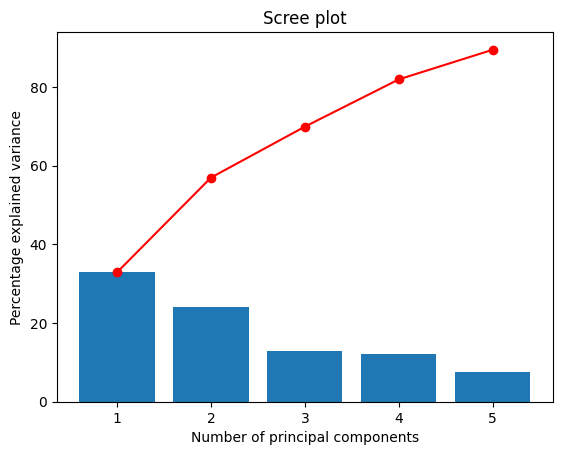

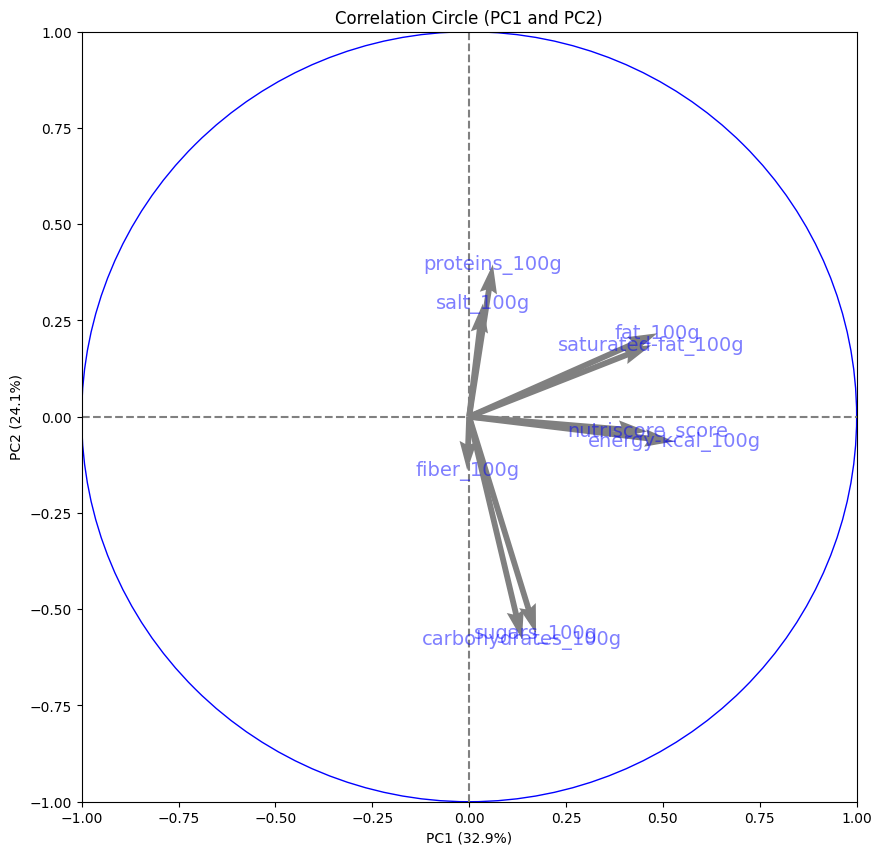

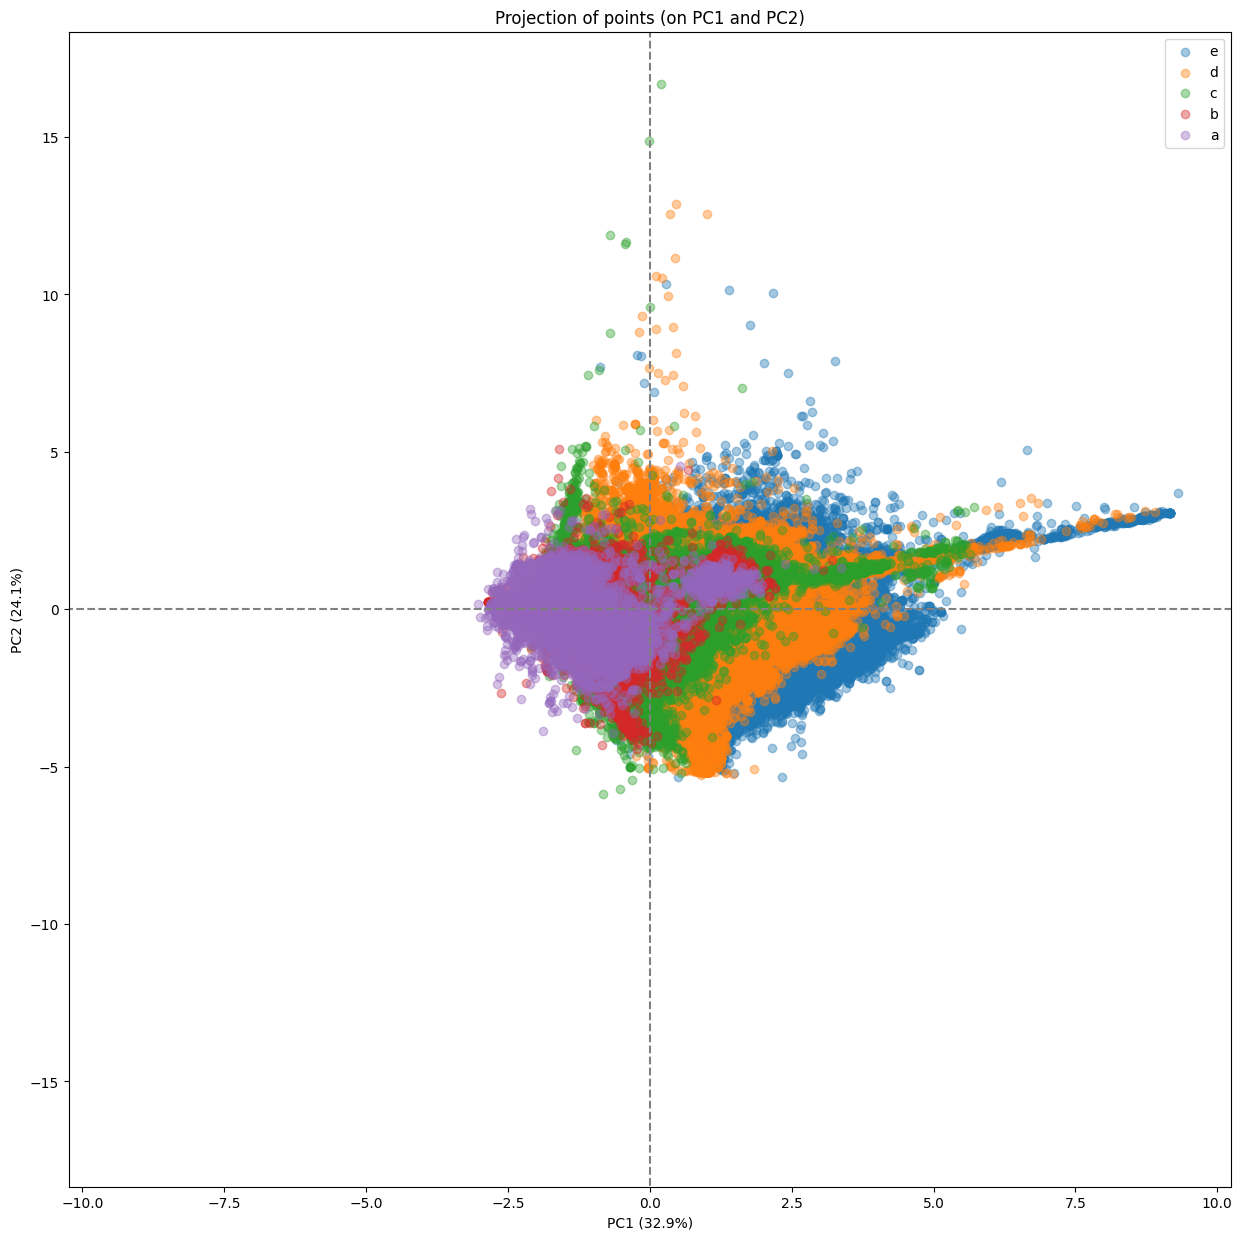

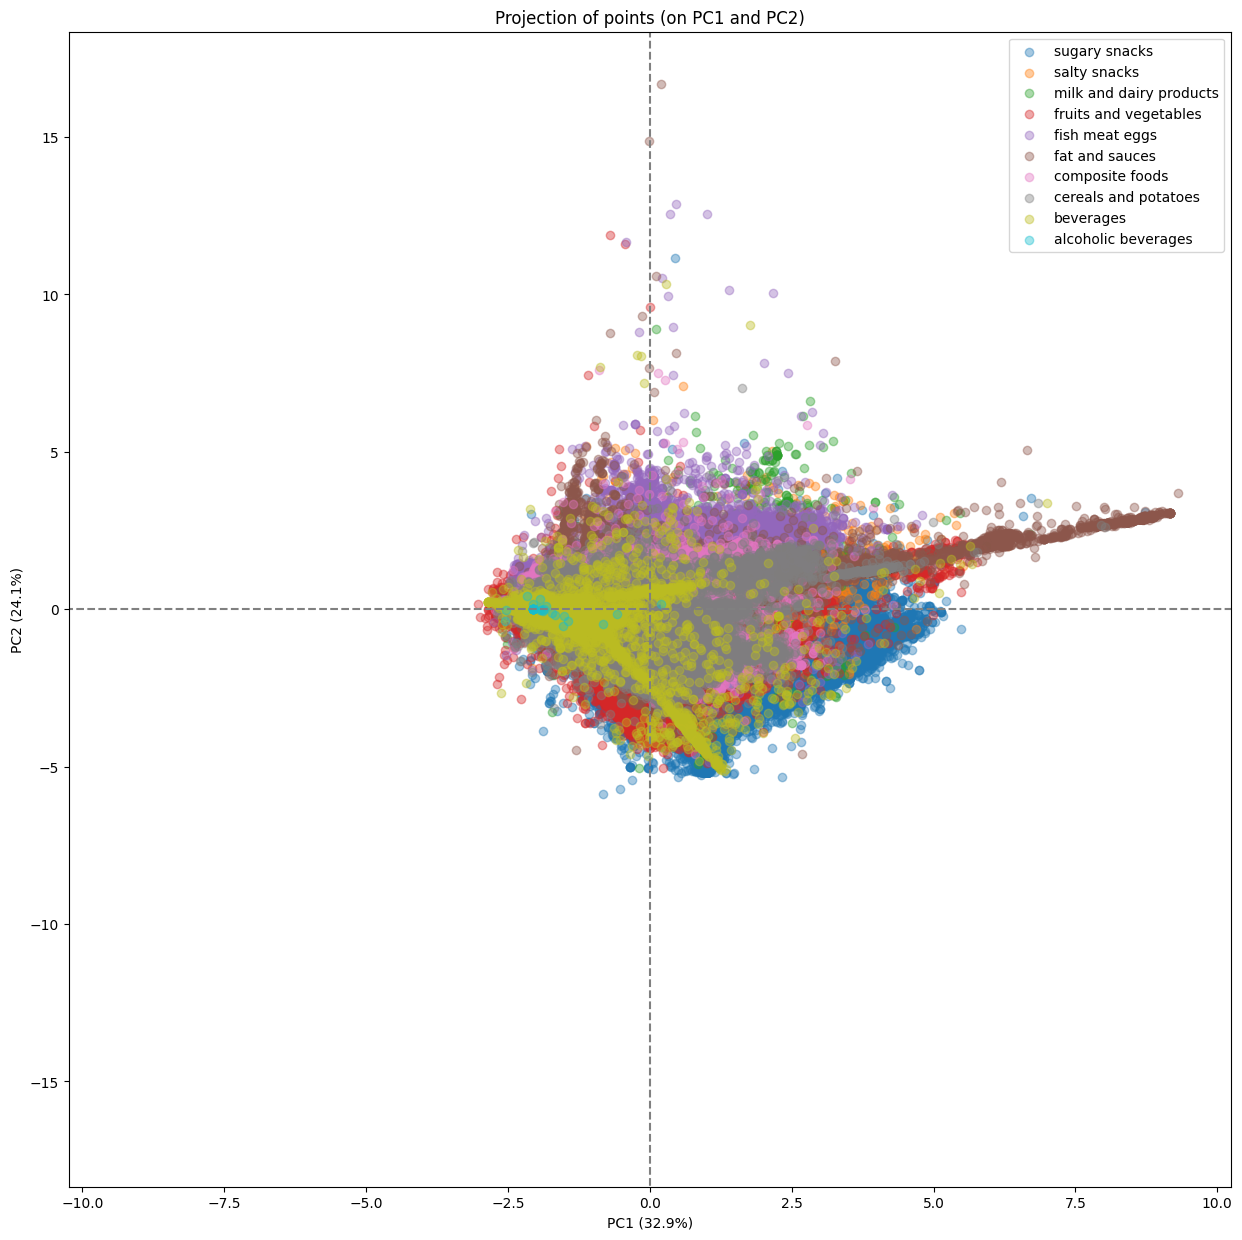

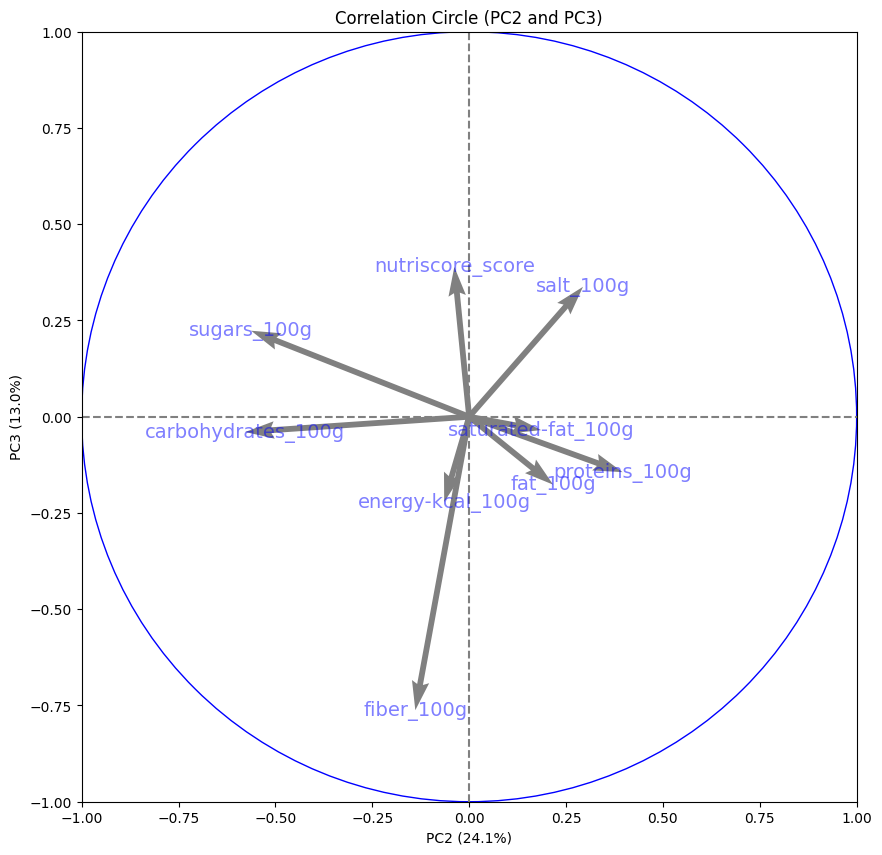

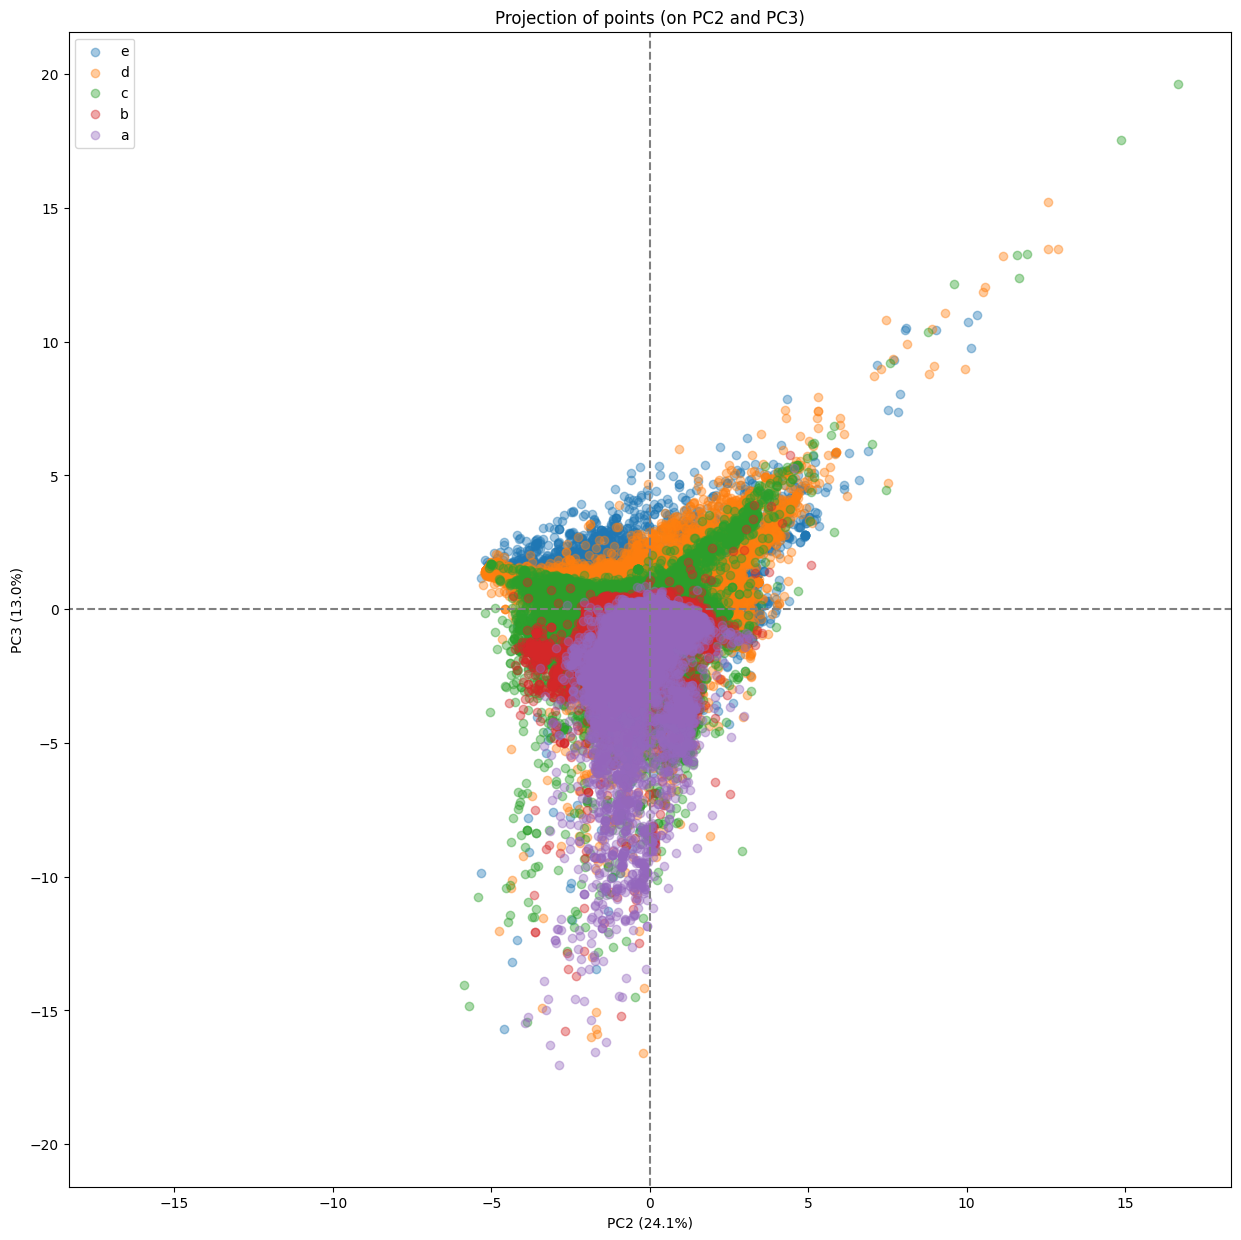

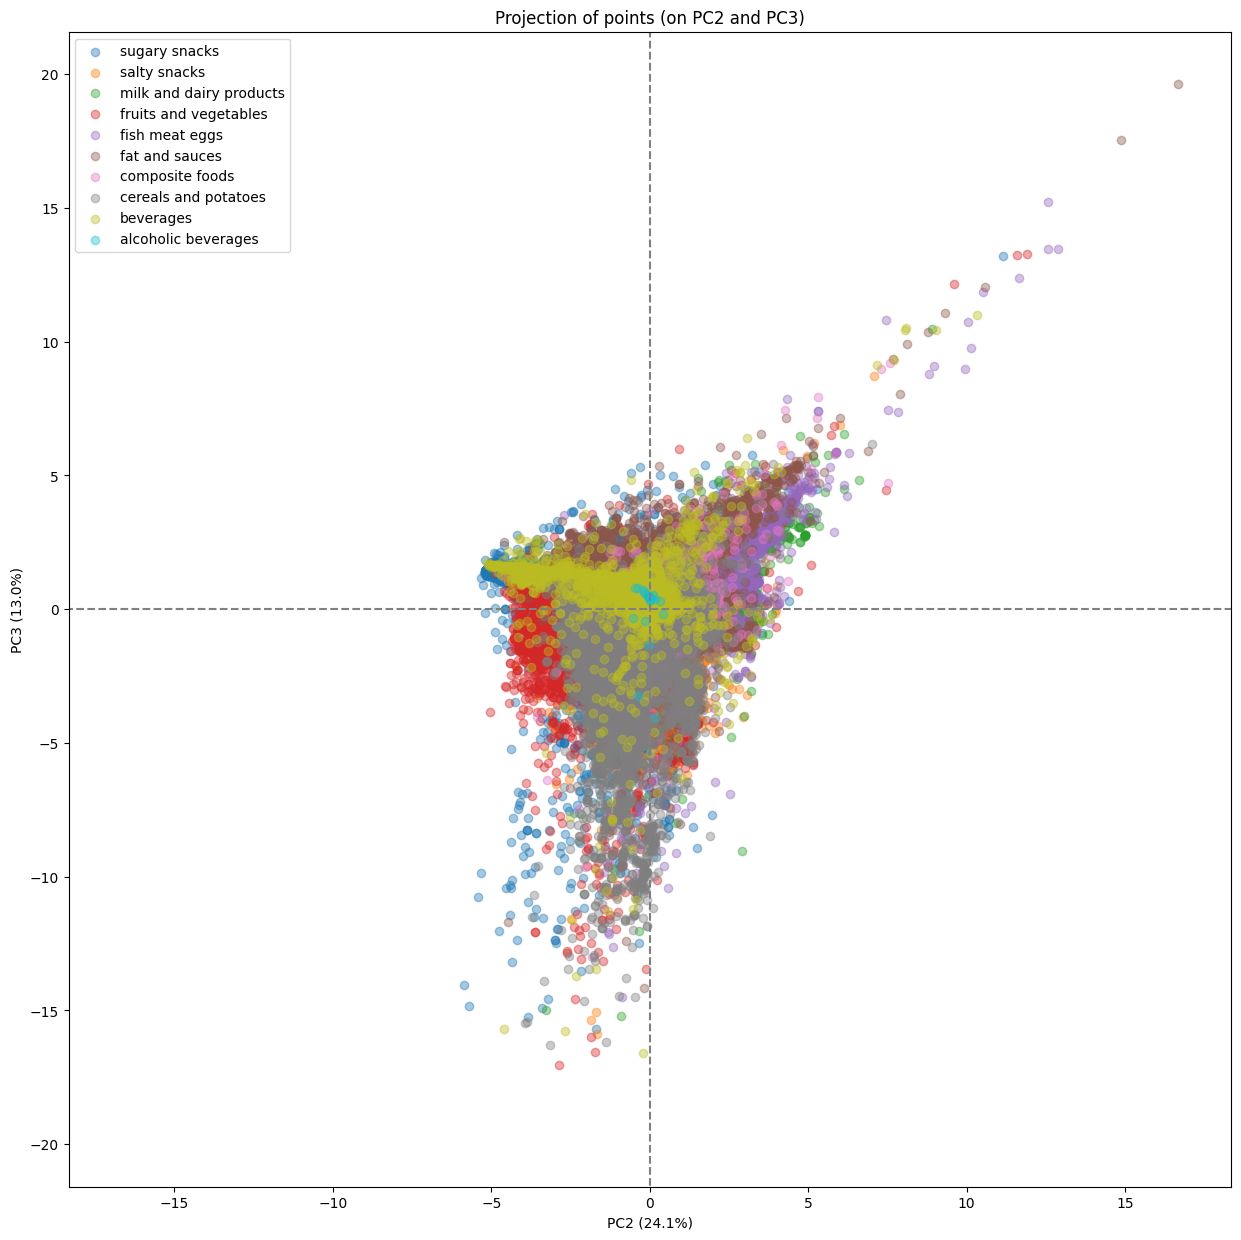

In [4]:
fts = ['sugars_100g',
       'fat_100g',
       'saturated-fat_100g',
       'carbohydrates_100g',
       'fiber_100g',
       'proteins_100g',
       'salt_100g',
       'energy-kcal_100g',
       'nutriscore_score']


# Selecting data with no nulls
X = data.loc[: , fts]
mask = (X.notnull().all(axis=1) 
        & data.loc[X.index, 'pnns_groups_1'].notnull()
        & data.loc[X.index, 'nutriscore_grade'].notnull())
X = X.loc[mask, :]
# Selecting categorical variables for plotting
nutri = data.loc[X.index, 'nutriscore_grade']
groups = data.loc[X.index, 'pnns_groups_1']

# Scaling
scaler = StandardScaler()
r = scaler.fit(X)
Xs = scaler.fit_transform(X)
Xs = pd.DataFrame(Xs, index=X.index, columns=X.columns)
display(Xs.describe().loc[['mean','std'], :])

# Computing PCA and projecting the data on the first factorial plan.
n_comp = 5
pca = PCA(n_components=n_comp)
q = pca.fit(Xs)
Xt = pca.transform(Xs)
# pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])
# Xt = pipe.fit_transform(X)
# Xt = pd.DataFrame(Xt, index=X.index, columns=['PC1', 'PC2'])
display_scree_plot(pca)
axis_ranks = [(0,1), (1,2)]
for axis_rank in axis_ranks:
        axis_rank = [axis_rank]
        display_circles(pca, axis_rank, labels=X.columns)
        display_factorial_planes(Xt, pca, axis_rank, alpha=0.4, illustrative_var=nutri, figsize=(15,15))
        display_factorial_planes(Xt, pca, axis_rank, alpha=0.4, illustrative_var=groups, figsize=(15,15))

## 4.2.  [&#9650;](#toc0_) <a id='toc4_2_'></a>Same thing, without nutriscore_score among the features provided to the pca decomposer

sugars_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
mean -6.595682e-17 -2.608959e-16        7.621677e-17        3.737553e-17   
std   1.000002e+00  1.000002e+00        1.000002e+00        1.000002e+00   

        fiber_100g  proteins_100g     salt_100g  energy-kcal_100g  
mean -4.910119e-17   1.377765e-16  2.066647e-16     -1.839462e-16  
std   1.000002e+00   1.000002e+00  1.000002e+00      1.000002e+00

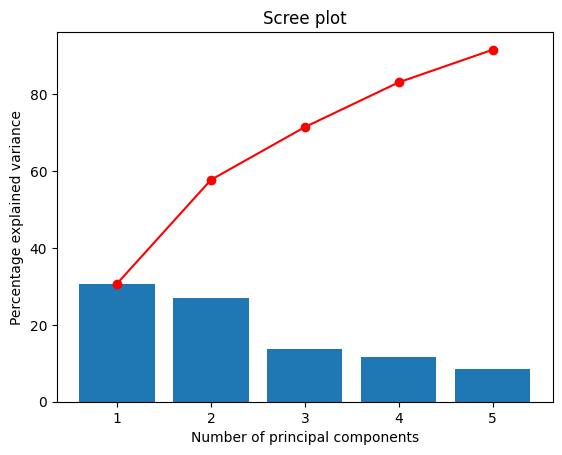

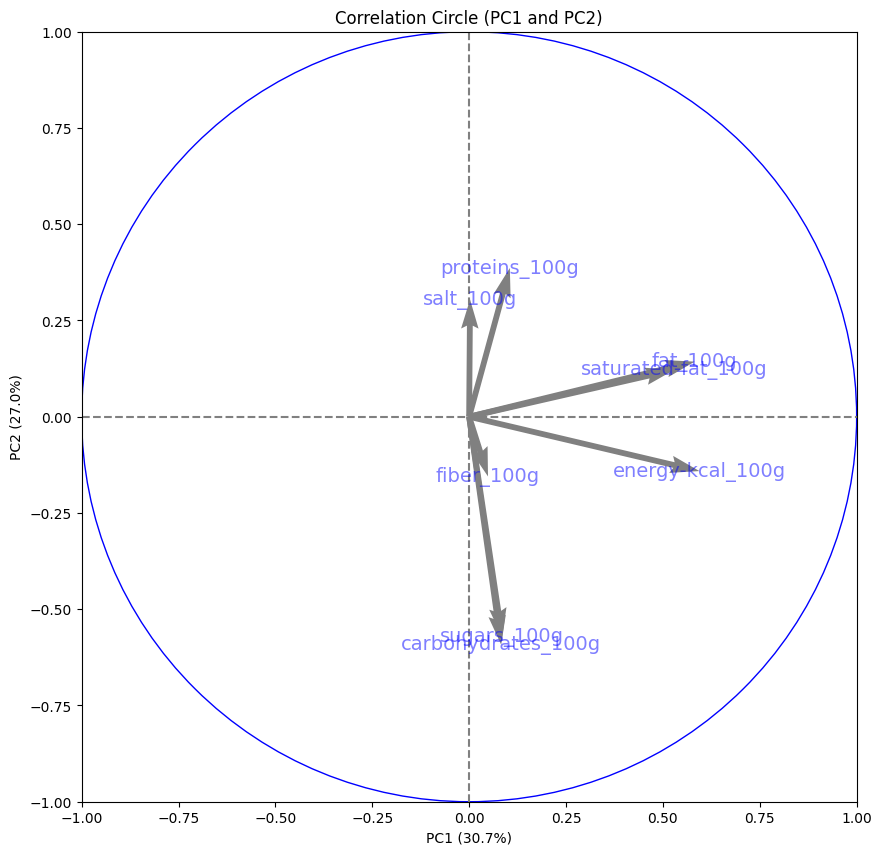

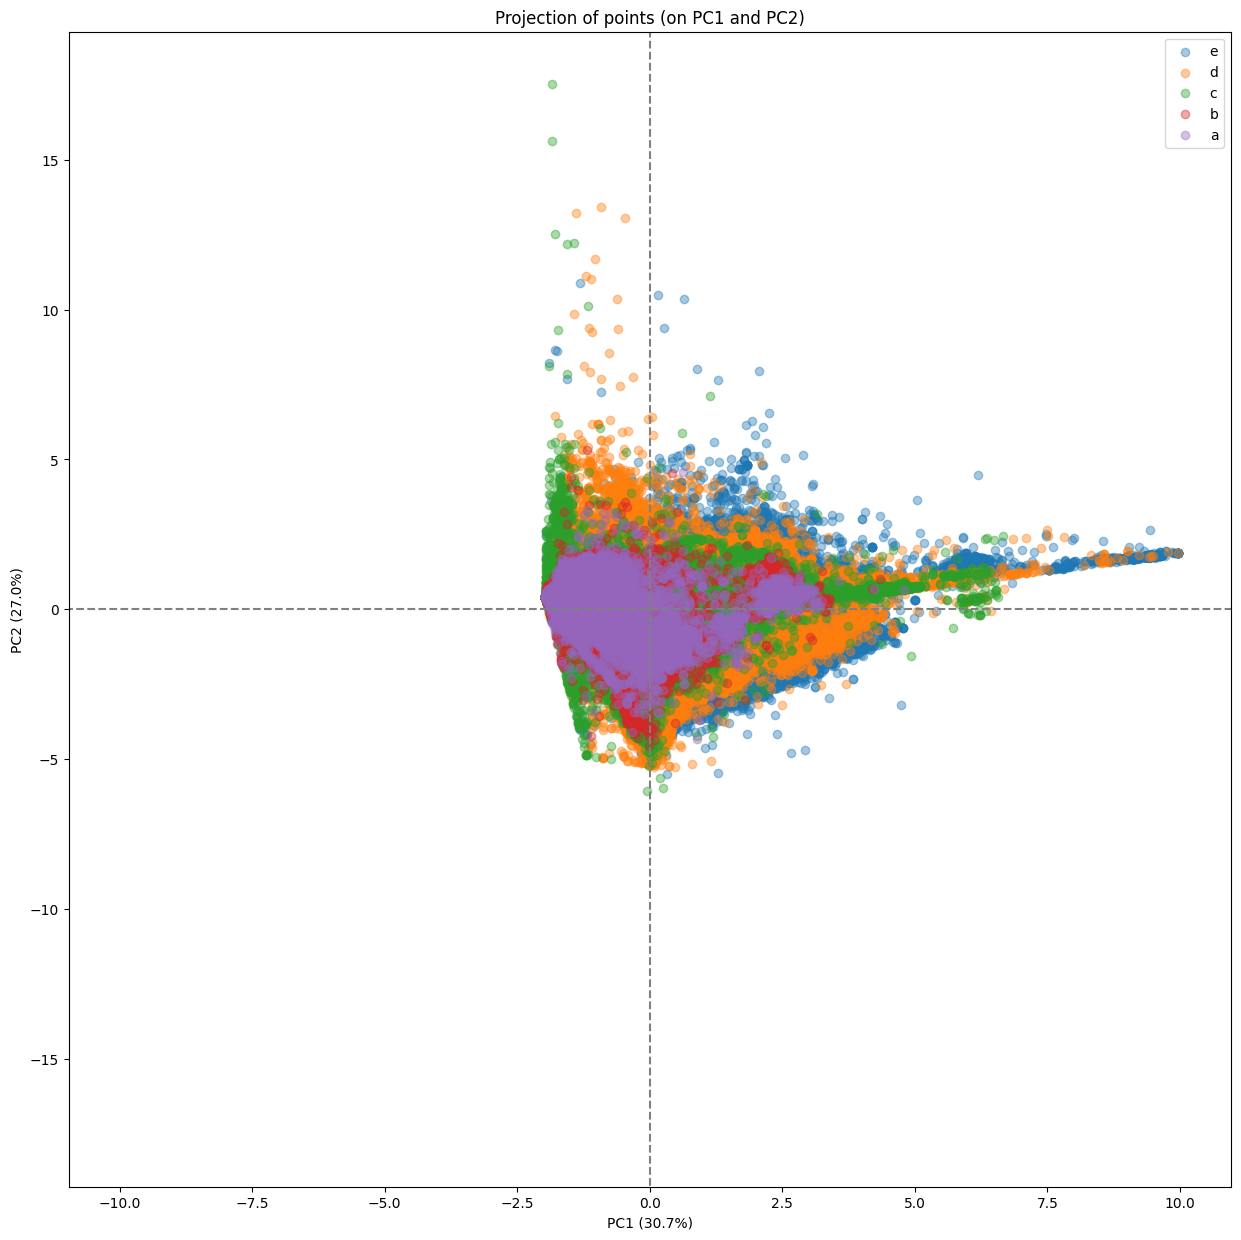

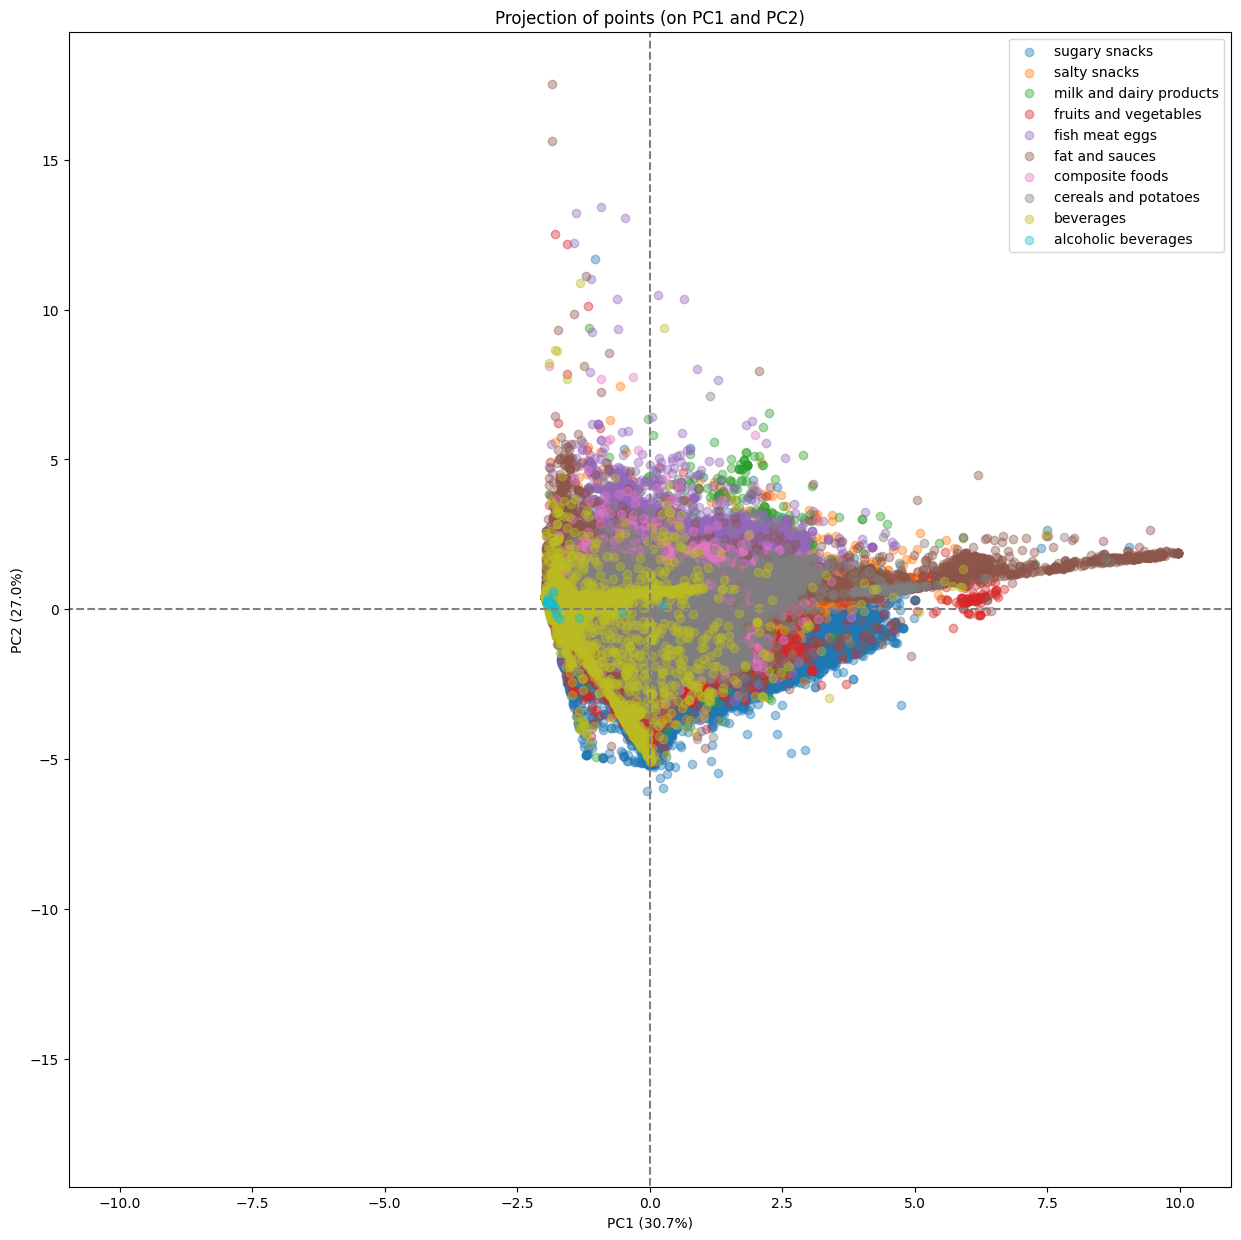

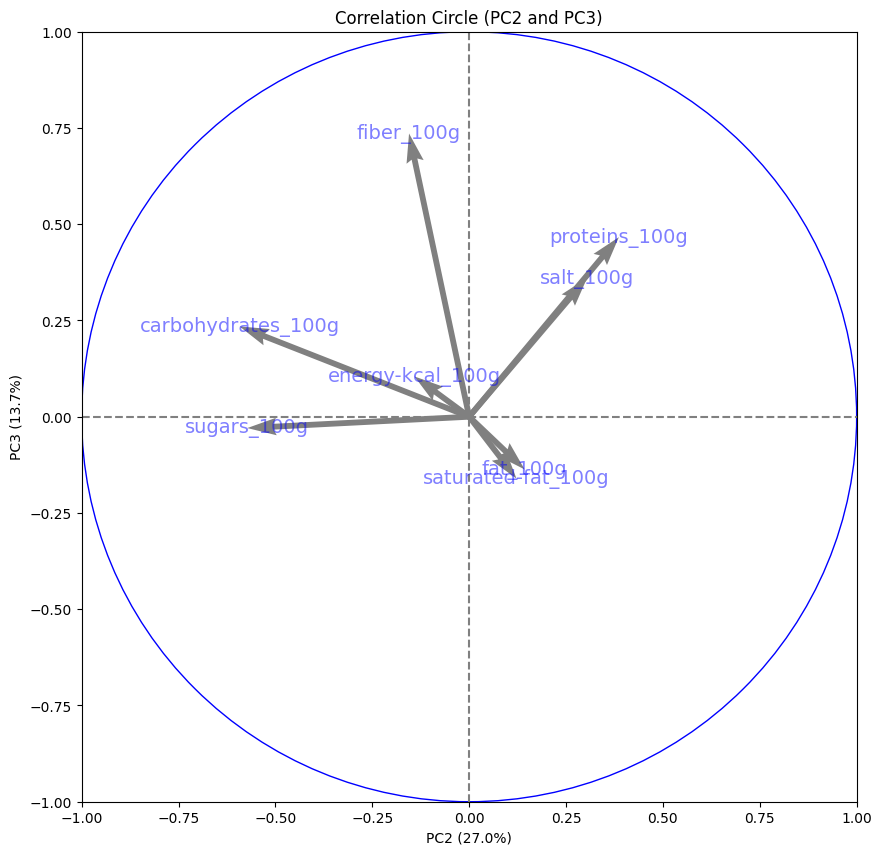

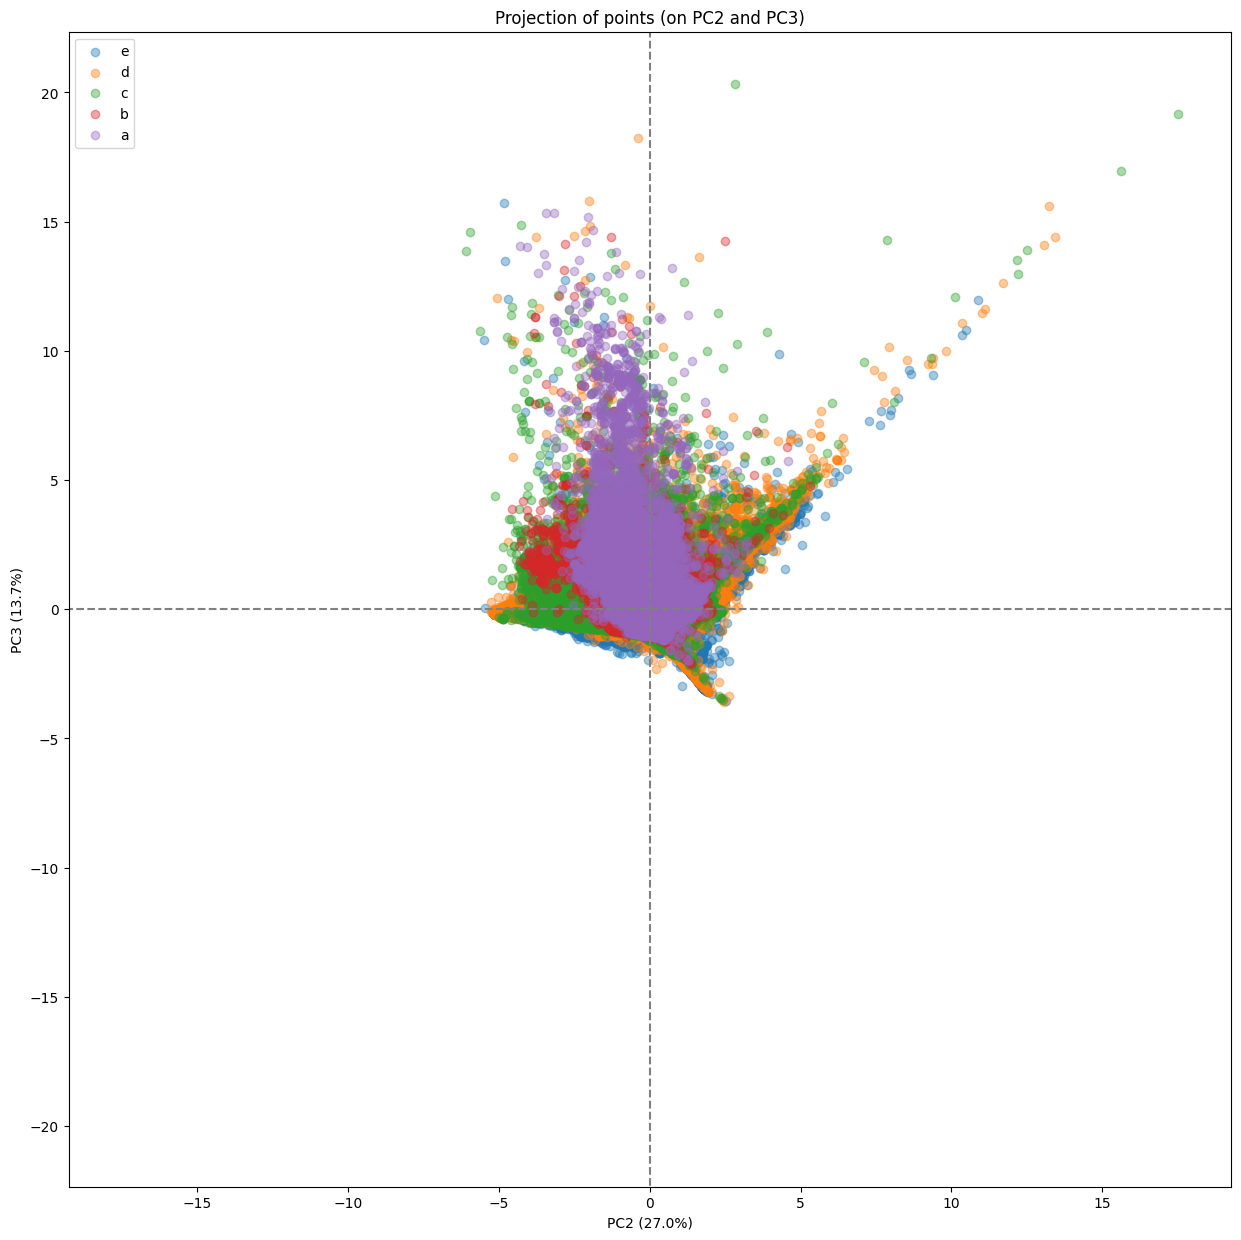

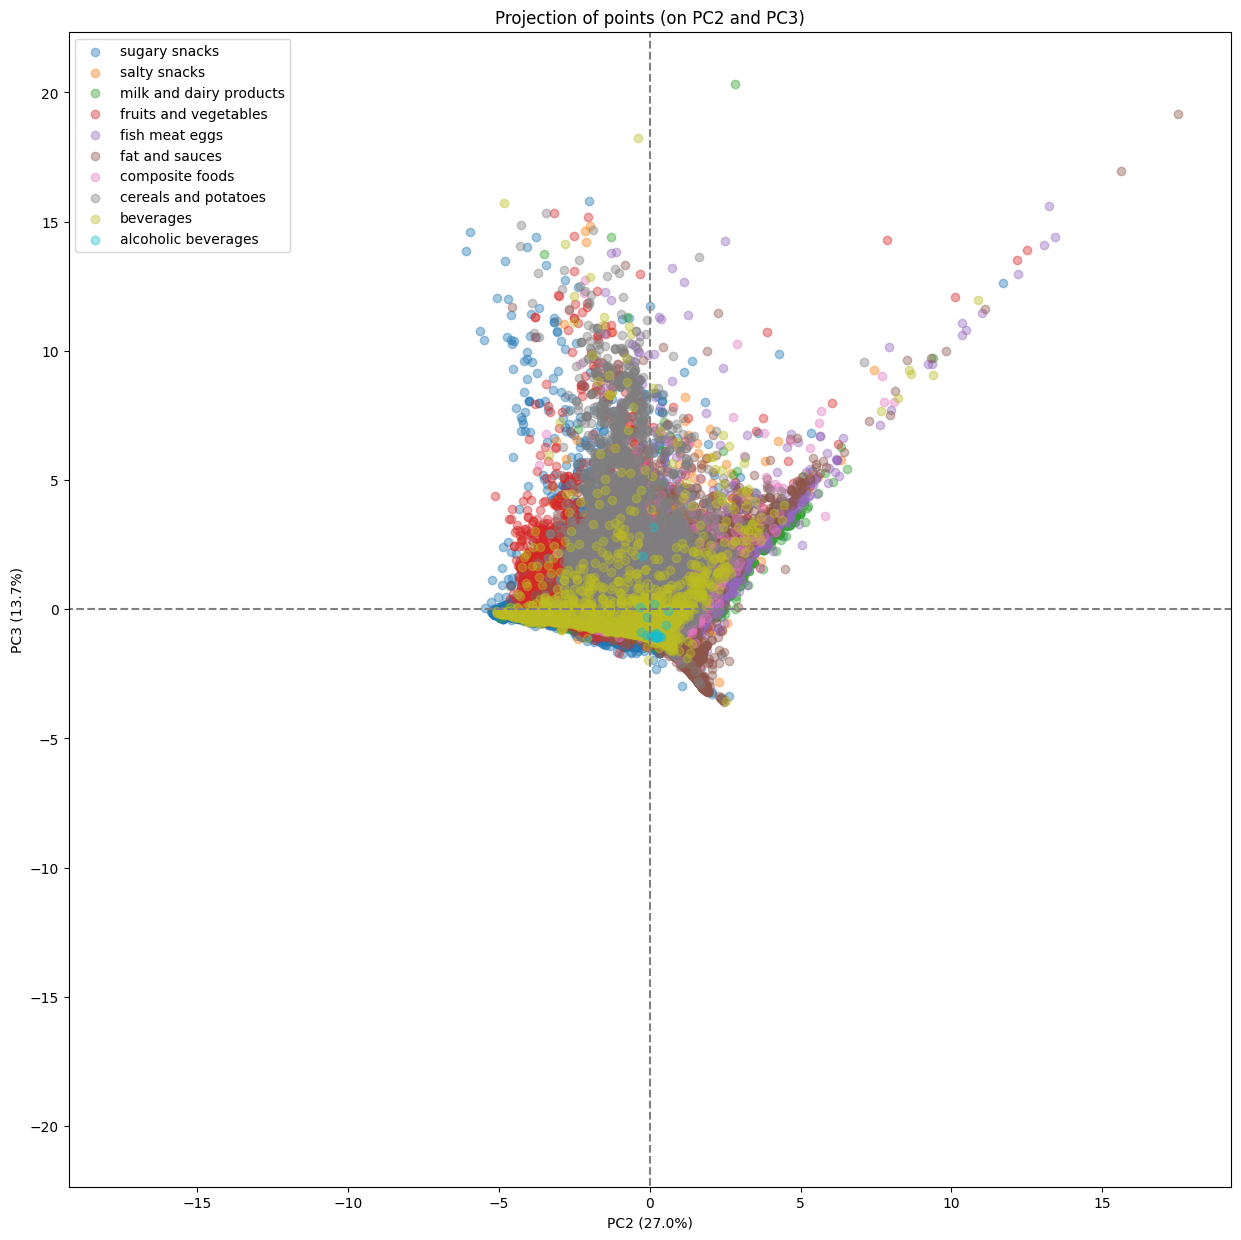

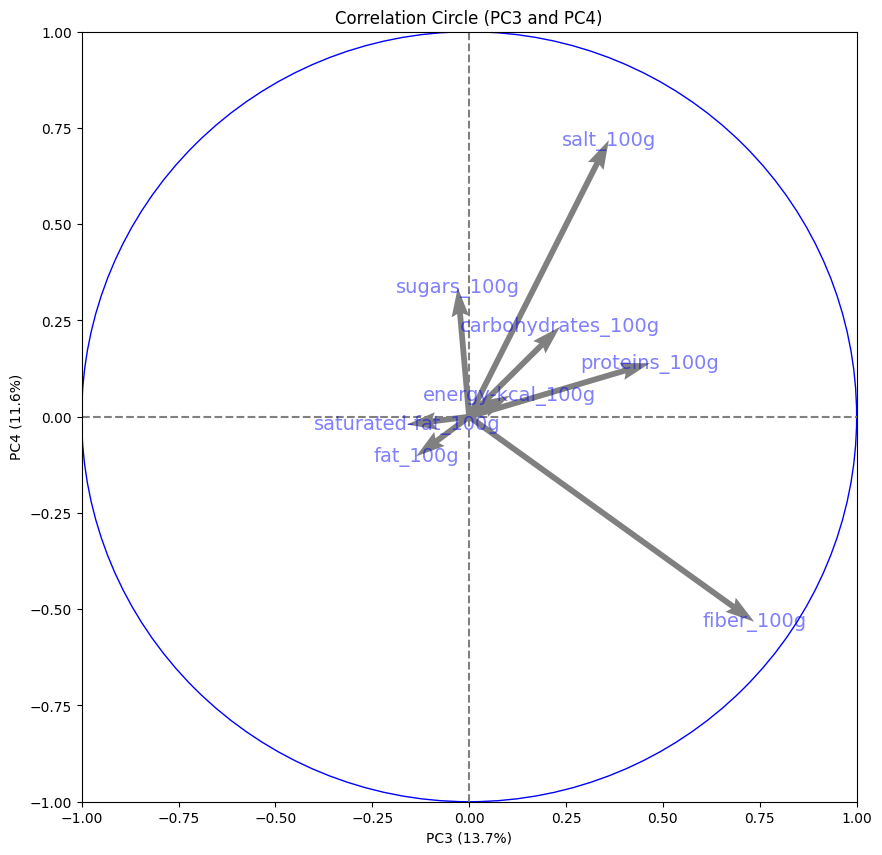

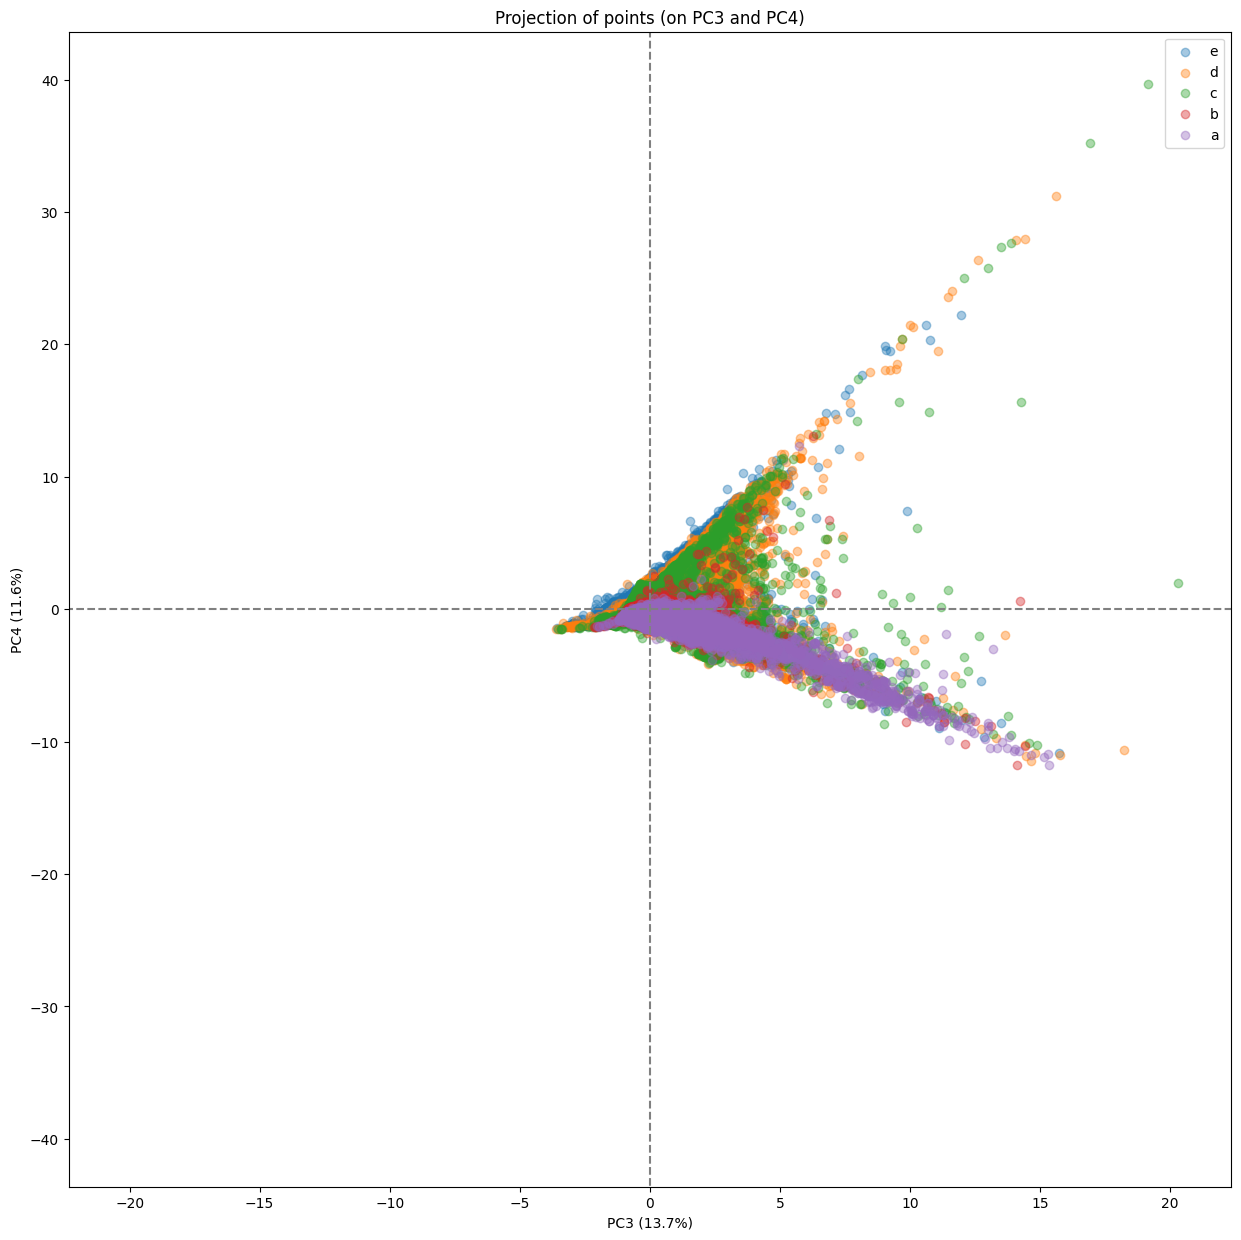

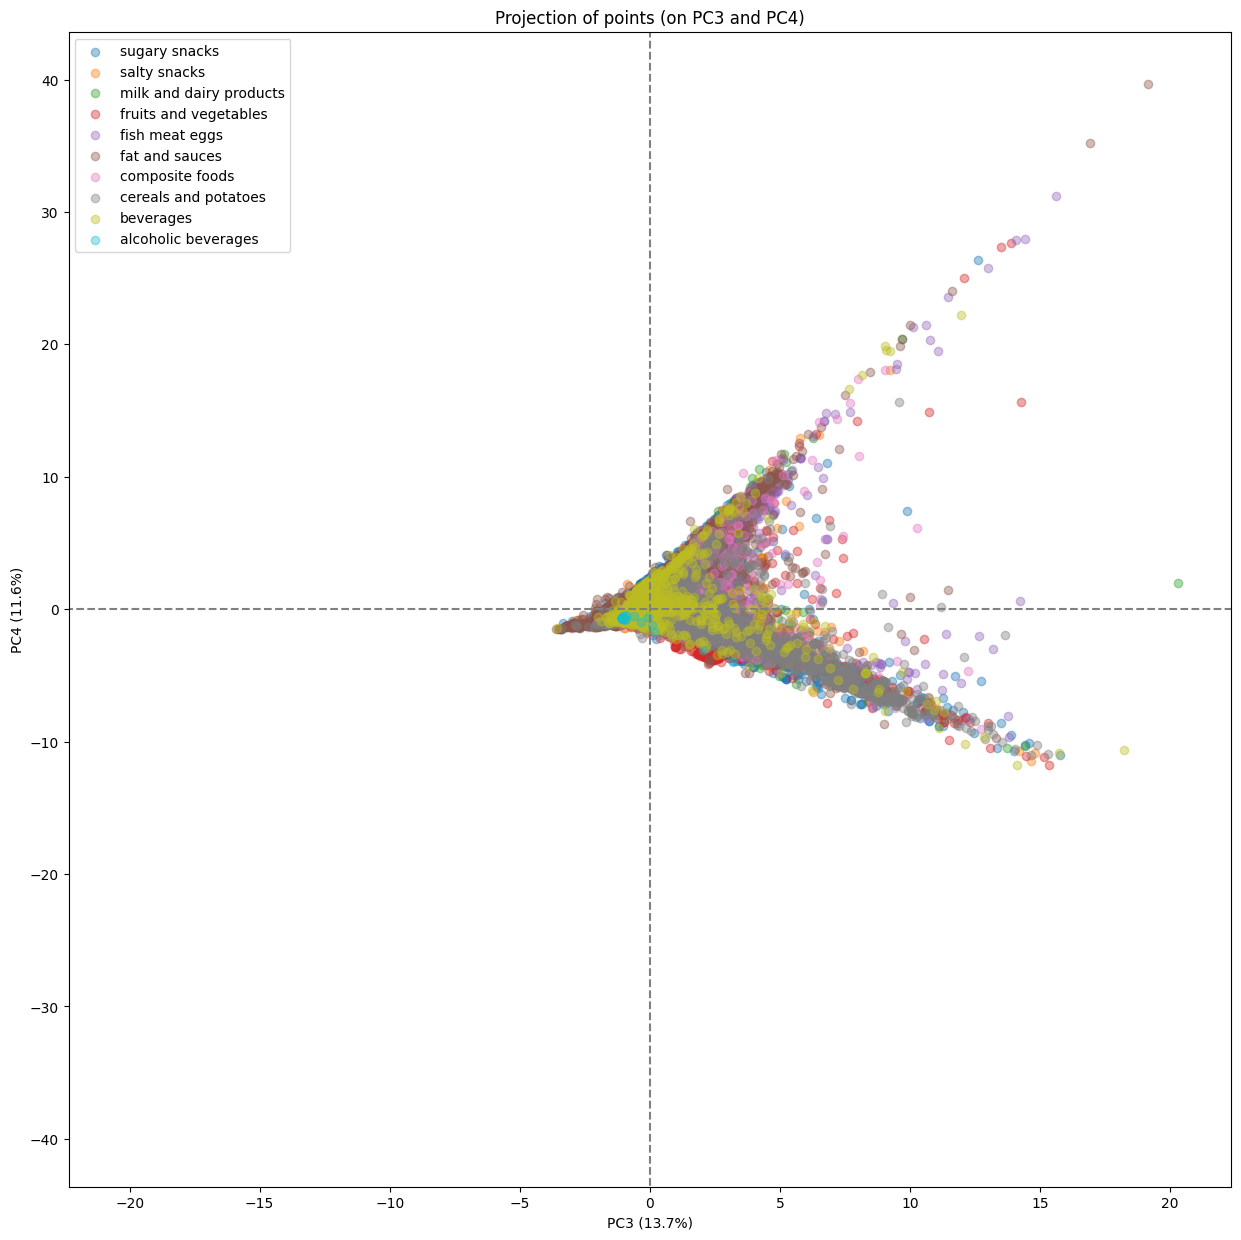

In [5]:
fts = ['sugars_100g',
       'fat_100g',
       'saturated-fat_100g',
       'carbohydrates_100g',
       'fiber_100g',
       'proteins_100g',
       'salt_100g',
       'energy-kcal_100g']


# Selecting data with no nulls
X = data.loc[: , fts]
mask = (X.notnull().all(axis=1) 
        & data.loc[X.index, 'pnns_groups_1'].notnull()
        & data.loc[X.index, 'nutriscore_grade'].notnull())
X = X.loc[mask, :]
# Selecting categorical variables for plotting
nutri = data.loc[X.index, 'nutriscore_grade']
groups = data.loc[X.index, 'pnns_groups_1']

# Scaling
scaler = StandardScaler()
r = scaler.fit(X)
Xs = scaler.fit_transform(X)
Xs = pd.DataFrame(Xs, index=X.index, columns=X.columns)
display(Xs.describe().loc[['mean','std'], :])

# Computing PCA and projecting the data on the first factorial plan.
n_comp = 5
pca = PCA(n_components=n_comp)
q = pca.fit(Xs)
Xt = pca.transform(Xs)
# pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])
# Xt = pipe.fit_transform(X)
# Xt = pd.DataFrame(Xt, index=X.index, columns=['PC1', 'PC2'])
display_scree_plot(pca)
axis_ranks = [(0,1), (1,2), (2,3)]
for axis_rank in axis_ranks:
        axis_rank = [axis_rank]
        display_circles(pca, axis_rank, labels=X.columns)
        display_factorial_planes(Xt, pca, axis_rank, alpha=0.4, illustrative_var=nutri, figsize=(15,15))
        display_factorial_planes(Xt, pca, axis_rank, alpha=0.4, illustrative_var=groups, figsize=(15,15))

## 4.3.  [&#9650;](#toc0_) <a id='toc4_3_'></a>Visualisation in the first 3D space

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


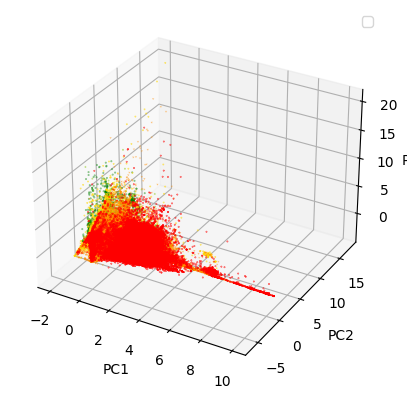

In [6]:
Xt = pd.DataFrame(Xt,
                  index=X.index,
                  columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
markers = ['o', '^', 'v', '2', '*']
nutrigrade = ['a', 'b', 'c', 'd', 'e']
colors = ['green', 'yellowgreen', 'gold', 'darkorange', 'red']

comps = ['PC1', 'PC2', 'PC3']
for m, grade, color in zip(markers, nutrigrade, colors):
    grade_index = nutri.loc[nutri == grade].index
    df = Xt.loc[grade_index, :]
    x = df[comps[0]]
    y = df[comps[1]]
    z = df[comps[2]]
    ax.scatter(x, y, z, marker=m, c=color, alpha=0.5, s=0.2)

ax.set_xlabel(comps[0])
ax.set_ylabel(comps[1])
ax.set_zlabel(comps[2])
ax.legend()
plt.show()

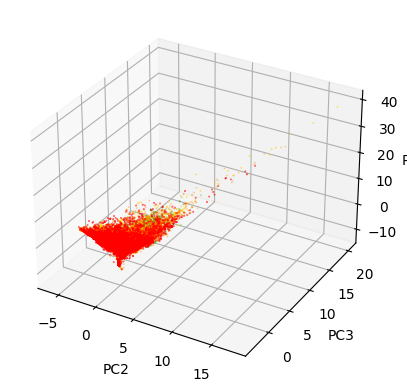

In [7]:
Xt = pd.DataFrame(Xt,
                  index=X.index,
                  columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
markers = ['o', '^', 'v', '2', '*']
nutrigrade = ['a', 'b', 'c', 'd', 'e']
colors = ['green', 'yellowgreen', 'gold', 'darkorange', 'red']

comps = ['PC2', 'PC3', 'PC4']
for m, grade, color in zip(markers, nutrigrade, colors):
    grade_index = nutri.loc[nutri == grade].index
    df = Xt.loc[grade_index, :]
    x = df[comps[0]]
    y = df[comps[1]]
    z = df[comps[2]]
    ax.scatter(x, y, z, marker=m, c=color, alpha=0.5, s=0.2)

ax.set_xlabel(comps[0])
ax.set_ylabel(comps[1])
ax.set_zlabel(comps[2])
plt.show()

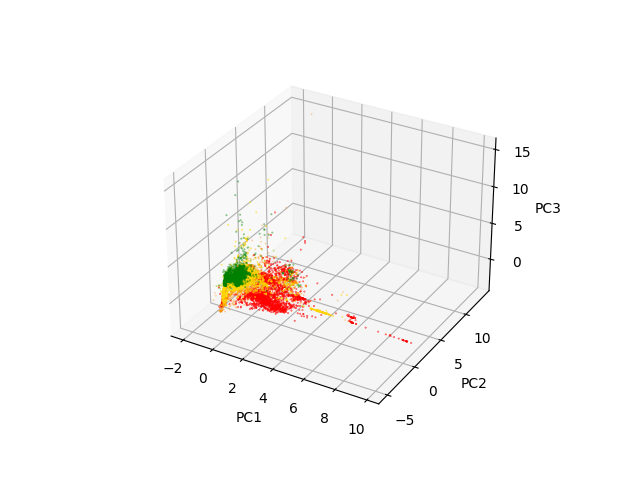

In [9]:
%matplotlib widget
## Interactive and with sampling for responsiveness!
from mpl_toolkits.mplot3d import Axes3D

Xt = pd.DataFrame(Xt,
                  index=X.index,
                  columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

markers = ['o', '^', 'v', '2', '*']
nutrigrade = ['a', 'b', 'c', 'd', 'e']
colors = ['green', 'yellowgreen', 'gold', 'darkorange', 'red']

a = ['PC1', 'PC2', 'PC3']
b = ['PC2', 'PC3', 'PC4']
comps = a
for m, grade, color in zip(markers, nutrigrade, colors):
    grade_index = nutri.loc[nutri == grade].index
    df = Xt.loc[grade_index, :].sample(2000)
    x = df[comps[0]]
    y = df[comps[1]]
    z = df[comps[2]]
    ax.scatter(x, y, z, marker=m, c=color, alpha=0.5, s=0.2)

ax.set_xlabel(comps[0])
ax.set_ylabel(comps[1])
ax.set_zlabel(comps[2])
plt.show()

## 4.4.  [&#9650;](#toc0_) <a id='toc4_4_'></a>In the second 3d space

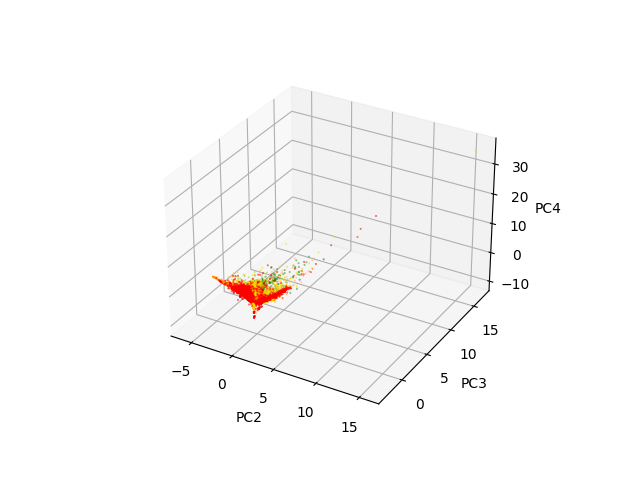

In [10]:
%matplotlib widget
## Interactive and with sampling for responsiveness!
from mpl_toolkits.mplot3d import Axes3D

Xt = pd.DataFrame(Xt,
                  index=X.index,
                  columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

markers = ['o', '^', 'v', '2', '*']
nutrigrade = ['a', 'b', 'c', 'd', 'e']
colors = ['green', 'yellowgreen', 'gold', 'darkorange', 'red']

a = ['PC1', 'PC2', 'PC3']
b = ['PC2', 'PC3', 'PC4']
comps = b
for m, grade, color in zip(markers, nutrigrade, colors):
    grade_index = nutri.loc[nutri == grade].index
    df = Xt.loc[grade_index, :].sample(2000)
    x = df[comps[0]]
    y = df[comps[1]]
    z = df[comps[2]]
    ax.scatter(x, y, z, marker=m, c=color, alpha=0.5, s=0.2)

ax.set_xlabel(comps[0])
ax.set_ylabel(comps[1])
ax.set_zlabel(comps[2])
plt.show()